#Business Case 2

<center> <b>Group D</b>
    
***


|      |     Student Name     |     Student ID     |
|---   |         ---          |           ---          |
| 1    |   Pedro Paris        |       20191217         |
| 2    |   Gonçalo Carvalho   |       20230471         |
| 3    |   Mohammad Walihullah|       20230768         |
| 4    |   Matilde Pereira    |       20230439         |
| 5    |   Ze Miguel          |       20181039         |

##Libraries

In [ ]:
!pip install category_encoders
!pip install shap
!pip install --upgrade scikit-learn
!pip install ydata-profiling
!pip install yellowbrick
!pip install xgboost
!pip install Prophet
!pip install openpyxl
!pip install imbalanced-learn==0.8.1
!pip install scikit-learn --upgrade
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 710.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=ee3c39680dfd24f42603c20da45e8b80e4a7

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
import xgboost
import shap
import math
from math import ceil
import statistics
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from prophet import Prophet
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import itertools
import re

import sys
from statsmodels.tsa.stattools import adfuller
import time
import warnings
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from pmdarima import auto_arima


##Function

In [ ]:
def hist_box(df, title, figx, figy, main_color='blue'):
    num_of_cols = len(df.columns)
    # Calculate the total number of plots (histogram + boxplot for each column)
    total_plots = num_of_cols * 2
    # Determine the number of rows needed for these plots
    num_of_rows = ceil(total_plots / 2)
    fig, axes = plt.subplots(num_of_rows, 2, figsize=(figx, figy), constrained_layout=True)

    # Flatten axes array for easy indexing
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        # Ensure we don't exceed the axes array
        hist_index = i * 2
        box_index = hist_index + 1

        # Histogram on the left
        axes[hist_index].hist(df[col], bins=50, color=main_color)
        axes[hist_index].set_title(f'Histogram of {col}', fontsize=10)

        # Boxplot on the right
        sns.boxplot(x=df[col], ax=axes[box_index], color=main_color)
        axes[box_index].set_title(f'Boxplot of {col}', fontsize=10)

    # Adjust the main title and show the plot
    plt.suptitle(title, y=1.02, fontsize=14)
    plt.show()

In [ ]:
def acf_pacf(df, column, lags='auto', main_color='blue', save_fig=False, fig_path='acf_pacf_plot.png'):
    """
    Apply ACF and PACF to a given column of a DataFrame and plot the results.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data to be analyzed.
        column (str): The name of the column to be analyzed.
        lags (int or 'auto'): Number of lags to calculate ACF and PACF or 'auto' for automatic lag selection.
        main_color (str): Color for the plots.
        save_fig (bool): Whether to save the figure to a file.
        fig_path (str): Path where the figure should be saved if save_fig is True.

    Returns:
        None
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    data = df[column]
    if lags == 'auto':
        lags = min(len(data) // 2 - 2, 40)  # Automatic lag calculation with a sensible maximum

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

    plot_acf(data, ax=axes[0], lags=lags, color=main_color, marker='o')
    plot_pacf(data, ax=axes[1], lags=lags, color=main_color, marker='o')

    axes[0].set_title('Autocorrelation Function (ACF)', fontsize=14)
    axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=14)

    plt.tight_layout(pad=3.0)
    fig.suptitle(f'ACF and PACF for {column}', fontsize=16, y=1.05)

    if save_fig:
        plt.savefig(fig_path)
    plt.show()


In [ ]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Determine a mask for rows with outliers
    outlier_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

    # Filter out outliers
    df_clean = df[~outlier_mask]

    return df_clean

In [ ]:
def sta_verif(df, product_column_name):
    # Set the size of the plot
    plt.figure(figsize=(10, 6))

    # Plot Original Series, Rolling Mean, and Rolling Std
    plt.plot(df[product_column_name], label='Original', color='black')
    plt.plot(df[product_column_name].rolling(window=5, center=False).mean(), label='Rolling Mean', color='#00d7a0')
    plt.plot(df[product_column_name].rolling(window=5, center=False).std(), label='Rolling Std', color='#00557c')

    # Enhancing plot aesthetics
    plt.title(f'Stationarity Verification for {product_column_name}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Augmented Dickey-Fuller test
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(df[product_column_name], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    # Adding critical value information
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

def stl_decomp(df, column, main_color='blue', period=12):
    """
    Apply STL (Seasonal and Trend decomposition using Loess) decomposition to a given column of a DataFrame
    and plot the results.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data to be analyzed.
        column (str): The name of the column to be analyzed.
        main_color (str): The color to use for the original data plot.
        period (int): The periodicity of the series for seasonal decomposition.

    Returns:
        None
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    data = df[column]

    # Apply STL decomposition
    stl = STL(data, period=period, seasonal=13)
    res = stl.fit()

    # Plot the decomposition results
    res.plot()
    plt.gcf().axes[0].set_title(f'STL Decomposition for {column}')
    plt.gcf().set_size_inches(10, 6)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to decompose.
# stl_decomp(df, 'column_name')

In [ ]:
def series_to_supervised(data, start_lag=1, end_lag=8, forecast_horizon=1, drop_nan=True, variable_names=None):
    """
    Convert a time series dataset to a supervised learning format with lagged features.

    Parameters:
        data (list or DataFrame): Time series data.
        start_lag (int): Start of lag interval for input features.
        end_lag (int): End of lag interval for input features.
        forecast_horizon (int): How many steps ahead to forecast.
        drop_nan (bool): Option to drop rows with NaN values.
        variable_names (list): List of variable names for the DataFrame columns.

    Returns:
        DataFrame: A DataFrame formatted for supervised learning.
    """
    df = pd.DataFrame(data)

    # If variable names are provided, assign them to the DataFrame
    if variable_names is not None and len(variable_names) == df.shape[1]:
        df.columns = variable_names
    elif variable_names is not None:
        raise ValueError("Length of 'variable_names' must match the number of variables in 'data'")

    cols, names = [], []

    # Create lagged features
    for i in range(end_lag, start_lag - 1, -1):
        cols.append(df.shift(i))
        names += [f'{col}(t-{i})' for col in df.columns]

    # Create future values (forecast sequence)
    for i in range(forecast_horizon):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{col}(t)' for col in df.columns]
        else:
            names += [f'{col}(t+{i})' for col in df.columns]

    # Aggregate and name columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # Optionally drop rows with NaN values
    if drop_nan:
        agg.dropna(inplace=True)

    return agg

In [ ]:
def xgboostModel_predict_months(xgboost,X_train,y_train,months_to_predict):
    predictions=[]
    #For each month that needs predictions, a walking forward approach is taken.
    for month in range(1,months_to_predict+1):
        new_date= X_train.index.max()+ pd.DateOffset(1)+pd.offsets.MonthEnd(1)

        row_to_input={}
        #the lag is taken from each column's name and retrieved the original value from the no lag dataframes
        for column in X_train.columns:
            column_withoutlag= column.split("(")[0]
            #extract lag
            match1 = re.search(r'(t-(\d+)\)', column)
            number_lags = int(match1.group(1))

            date_from_lag=new_date + pd.DateOffset(days=1)- pd.DateOffset(months=number_lags+1)+pd.offsets.MonthEnd(1)

            if 'GCK' not in column:
                row_to_input[column] = market_data.loc[date_from_lag,column_withoutlag]
            else:
                row_to_input[column] = y_train.loc[date_from_lag,column_withoutlag+"(t)"]


        row_to_input = pd.DataFrame(row_to_input, index=[new_date], columns=X_train.columns)

        #the model is fitted on the current X_Train and y_Train
        xgboost.fit(X_train, y_train)
        prediction=xgboost.predict(row_to_input)[0]
        predictions.append(prediction)
        # the training dataframes are updated with the predicted value and the correspoding lag features
        X_train= X_train.append(row_to_input)
        y_train.loc[new_date] =prediction
    return X_train,y_train,predictions

##Data import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Market Dataset

In [ ]:
# Load data
# Attempt to load data from different sources

try:
    # Attempt to load from the first Excel file path
    ds = pd.read_excel('/content/drive/MyDrive/Case2_Market data.xlsx', header=[0,1,2])
    print("Data loaded from '/content/drive/MyDrive/Case2_Market data.xlsx'")
except FileNotFoundError:
    try:
        # If the first attempt fails, try the second Excel file path
        ds = pd.read_excel('/content/Case2_Market data.xlsx', header=[0,1,2])
        print("Data loaded from '/content/Case2_Market data.xlsx'")
    except FileNotFoundError:
        try:
            # If the second attempt fails, try the third Excel file path
            ds = pd.read_excel('Case2_Market data.xlsx', header=[0,1,2])
            print("Data loaded")
        except FileNotFoundError:
            print("Failed to load data: file not found.")

Data loaded from '/content/Case2_Market data.xlsx'


In [ ]:
# Display top 10 rows
ds.head(10)

Unnamed: 0_level_0  \
  Index 2010=100 (if not otherwise noted)   
                                     date   
0                                  2004m2   
1                                  2004m3   
2                                  2004m4   
3                                  2004m5   
4                                  2004m6   
5                                  2004m7   
6                                  2004m8   
7                                  2004m9   
8                                 2004m10   
9                                 2004m11   

                                     China  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO156   
0                                16.940704   
1                                23.711852   
2                                24.435235   
3                                23.708115   
4                                27.009138   
5                                23.590959   
6                                24.280597   
7                                25.989192   
8                                24.895962   
9                                26.774785   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP156   
0                               16.940704   
1                               23.711852   
2                               24.435235   
3                               23.708115   
4                               27.009138   
5                               23.590959   
6                               24.280597   
7                               25.989192   
8                               24.895962   
9                               26.774785   

                                    France  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO250   
0                               112.091273   
1                               136.327976   
2                               117.791806   
3                               109.002541   
4                               133.785737   
5                               117.405904   
6                                79.137033   
7                               130.487955   
8                               119.707613   
9                               114.509588   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP250   
0                               83.458866   
1                              106.168192   
2                               92.007646   
3                               85.696486   
4                              106.641482   
5                               89.302781   
6                               71.798962   
7                               98.896817   
8                               99.603740   
9                               86.511165   

                                   Germany  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO276   
0                                82.623037   
1                               100.556582   
2                                89.653203   
3                                86.880571   
4                                99.010814   
5                                94.200318   
6                                82.804844   
7                               102.039931   
8                                93.519358   
9                                97.130763   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP276   
0                               79.452532   
1                               97.012918   
2                               84.932358   
3                               82.372794   
4                               95.108740   
5                               89.646239   
6                               80.197268   
7                 

### Sales Dataset

In [ ]:
try:
    # Attempt to load from the first CSV file path
    sales = pd.read_csv('/content/drive/My Drive/Case2_Sales data.csv', delimiter=';',decimal=',')
    print("Sales data loaded from '/content/drive/My Drive/Case2_Sales data.csv'")
except FileNotFoundError:
    try:
        # If the first attempt fails, try the second CSV file path
        sales = pd.read_csv('/content/Case2_Sales data.csv', delimiter=';')
        print("Sales data loaded from '/content/Case2_Sales data.csv'")
    except FileNotFoundError:
        try:
            # If the second attempt fails, try the third CSV file path
            sales = pd.read_csv('Case2_Sales data.csv', delimiter=';')
            print("Sales data loaded from 'C:\\Users\\gonca\\Downloads\\Case2_Sales data.csv'")
        except FileNotFoundError:
            print("Failed to load sales data: file not found.")

Sales data loaded from '/content/Case2_Sales data.csv'


##Data prepatration

### Market Data Reshaping

In [ ]:
ds.columns = ["_".join(a) for a in ds.columns.to_flat_index()]

In [ ]:
profile= ProfileReport(ds,title="Market data")

In [ ]:
#profile.to_notebook_iframe()

In [ ]:
#profile.to_widgets()

In [ ]:
#profile.to_file("mkt_data_rprt.html")

In [ ]:
# Summary statistics for all variables
ds.describe(include='all').T

count unique      top  \
Unnamed: 0_level_0_Index 2010=100 (if not other...    219    219   2004m2   
China_Production Index Machinery & Electricals_...  219.0    NaN      NaN   
China_Shipments Index Machinery & Electricals_M...  219.0    NaN      NaN   
France_Production Index Machinery & Electricals...  219.0    NaN      NaN   
France_Shipments Index Machinery & Electricals_...  219.0    NaN      NaN   
Germany_Production Index Machinery & Electrical...  219.0    NaN      NaN   
Germany_Shipments Index Machinery & Electricals...  219.0    NaN      NaN   
Italy_Production Index Machinery & Electricals_...  219.0    NaN      NaN   
Italy_Shipments Index Machinery & Electricals_M...  219.0    NaN      NaN   
Japan_Production Index Machinery & Electricals_...  219.0    NaN      NaN   
Japan_Shipments Index Machinery & Electricals_M...  219.0    NaN      NaN   
Switzerland_Production Index Machinery & Electr...  218.0    NaN      NaN   
Switzerland_Shipments Index Machinery & Electri...  218.0    NaN      NaN   
United Kingdom_Production Index Machinery & Ele...  219.0    NaN      NaN   
United Kingdom_Shipments Index Machinery & Elec...  201.0    NaN      NaN   
United States_Production Index Machinery & Elec...  219.0    NaN      NaN   
United States_Shipments Index Machinery & Elect...  218.0    NaN      NaN   
Europe_Production Index Machinery & Electricals...  219.0    NaN      NaN   
Europe_Shipments Index Machinery & Electricals_...  219.0    NaN      NaN   
Europe_World: Price of Base Metals_RohiBASEMET1...  219.0    NaN      NaN   
Europe_World: Price of Energy_RohiENERGY1000_org    219.0    NaN      NaN   
Europe_World: Price of Metals  & Minerals_RohiM...  219.0    NaN      NaN   
Europe_World: Price of Natural gas index_RohiNA...  219.0    NaN      NaN   
Europe_World: Price of Crude oil, average_RohCR...  219.0    NaN      NaN   
Europe_World: Price of Copper_RohCOPPER1000_org     219.0    NaN      NaN   
Europe_United States: EUR in LCU_WKLWEUR840_org     219.0    NaN      NaN   
Producer Prices_United States: Electrical equip...  219.0    NaN      NaN   
Producer Prices_United Kingdom: Electrical equi...  201.0    NaN      NaN   
Producer Prices_Italy: Electrical equipment_PRI...  219.0    NaN      NaN   
Producer Prices_France: Electrical equipment_PR...  184.0    NaN      NaN   
Producer Prices_Germany: Electrical equipment_P...  219.0    NaN      NaN   
Producer Prices_China: Electrical equipment_PRI...  196.0    NaN      NaN   
production index_United States: Machinery and e...  219.0    NaN      NaN   
production index_World: Machinery and equipment...  219.0    NaN      NaN   
production index_Switzerland: Machinery and equ...  218.0    NaN      NaN   
production index_United Kingdom: Machinery and ...  219.0    NaN      NaN   
production index_Italy: Machinery and equipment...  219.0    NaN      NaN   
production index_Japan: Machinery and equipment...  219.0    NaN      NaN   
production index_France: Machinery and equipmen...  219.0    NaN      NaN   
production index_Germany: Machinery and equipme...  219.0    NaN      NaN   
production index_United States: Electrical equi...  219.0    NaN      NaN   
production index_World: Electrical equipment_PR...  208.0    NaN      NaN   
production index_Switzerland: Electrical equipm...  218.0    NaN      NaN   
production index_United Kingdom: Electrical equ...  219.0    NaN      NaN   
production index_Italy: Electrical equipment_PR...  219.0    NaN      NaN   
production index_Japan: Electrical equipment_PR...  219.0    NaN      NaN   
production index_France: Electrical equipment_P...  219.0    NaN      NaN   
production index_Germany: Electrical equipment_...  219.0    NaN      NaN   

                                                   freq        mean  \
Unnamed: 0_level_0_Index 2010=100 (if not other...    1         NaN   
China_Production Index Machinery & Electricals_...  NaN  138.303637   
China_Shipments Index Machinery & Electricals_M...  NaN  138.3036

In [ ]:
#Making sure any empty spaces turn to nan
ds.replace("",np.NaN,inplace=True)

In [ ]:
# Where there are extra spaces takes values either to the left or to the right
#ds = ds.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
ds.head(3)

Unnamed: 0_level_0_Index 2010=100 (if not otherwise noted)_date  \
0                                             2004m2                
1                                             2004m3                
2                                             2004m4                

   China_Production Index Machinery & Electricals_MAB_ELE_PRO156  \
0                                          16.940704               
1                                          23.711852               
2                                          24.435235               

   China_Shipments Index Machinery & Electricals_MAB_ELE_SHP156  \
0                                          16.940704              
1                                          23.711852              
2                                          24.435235              

   France_Production Index Machinery & Electricals_MAB_ELE_PRO250  \
0                                         112.091273                
1                                         136.327976                
2                                         117.791806                

   France_Shipments Index Machinery & Electricals_MAB_ELE_SHP250  \
0                                          83.458866               
1                                         106.168192               
2                                          92.007646               

   Germany_Production Index Machinery & Electricals_MAB_ELE_PRO276  \
0                                          82.623037                 
1                                         100.556582                 
2                                          89.653203                 

   Germany_Shipments Index Machinery & Electricals_MAB_ELE_SHP276  \
0                                          79.452532                
1                                          97.012918                
2                                          84.932358                

   Italy_Production Index Machinery & Electricals_MAB_ELE_PRO380  \
0                                         124.289603               
1                                         143.411662               
2                                         129.083828               

   Italy_Shipments Index Machinery & Electricals_MAB_ELE_SHP380  \
0                                          86.560493              
1                                         106.344544              
2                                          95.579673              

   Japan_Production Index Machinery & Electricals_MAB_ELE_PRO392  ...  \
0                                         109.334010              ...   
1                                         140.884616              ...   
2                                         105.853579              ...   

   production index_France: Machinery and equipment n.e.c._PRO28250_org  \
0                                         118.274109                      
1                                         148.121841                      
2                                         125.482231                      

   production index_Germany: Machinery and equipment n.e.c._PRO28276_org  \
0                                          80.829010                       
1                                         102.130104                       
2                                          90.961426                       

   production index_United States: Electrical equipment_PRO27840_org  \
0                                         117.723991                   
1                                         119.220779                   
2                                         117.441124                   

   production index_World: Electrical equipment_PRO271000_org  \
0                                                NaN            
1                                                NaN            
2                                                NaN            

   production index_Switzerland: Electrical equipment_PRO27756_org  \
0             

### Sales Data Reshaping

####Sales dataset

In [ ]:
sales

DATE Mapped_GCK Sales_EUR
0     01.10.2018         #1         0
1     02.10.2018         #1         0
2     03.10.2018         #1         0
3     04.10.2018         #1         0
4     05.10.2018         #1         0
...          ...        ...       ...
9797  23.08.2019        #12         0
9798  23.08.2019        #36      1015
9799  12.08.2019        #12         0
9800  28.08.2019         #8  43763,91
9801  27.08.2019         #8         0

[9802 rows x 3 columns]

In [ ]:
# Convert 'Sales_EUR' to numeric, coercing errors to NaN
sales['Sales_EUR'] = pd.to_numeric(sales['Sales_EUR'], errors='coerce')

# Convert 'DATE' to datetime format
sales['DATE'] = pd.to_datetime(sales['DATE'], dayfirst=True)

# Ensure 'Mapped_GCK' values are prefixed with "GCK_" only once
sales['Mapped_GCK'] = sales['Mapped_GCK'].apply(lambda x: "GCK_" + x if not x.startswith("GCK_") else x)

# Aggregating sales data to a monthly level
monthly_sales = sales.groupby([sales['DATE'].dt.year.rename('Year'),
                               sales['DATE'].dt.month.rename('Month'),
                               'Mapped_GCK'])['Sales_EUR'].sum().reset_index()

# Pivoting aggregated data to have GCK values as columns and dates as rows
msc = sales.groupby([sales['DATE'].dt.to_period('M'), 'Mapped_GCK'])['Sales_EUR'].sum().unstack()

print(msc.head())


Mapped_GCK  GCK_#1    GCK_#11  GCK_#12  GCK_#13  GCK_#14   GCK_#16  GCK_#20  \
DATE                                                                          
2018-10        0.0   340091.0      0.0      0.0   5770.0  205995.0    348.0   
2018-11        0.0  1195336.0   1070.0  43677.0  17130.0  828478.0      0.0   
2018-12        0.0  1226122.0      0.0    550.0      0.0   38028.0    503.0   
2019-01        0.0  1113149.0  21484.0      0.0      0.0  134946.0    120.0   
2019-02        0.0   191455.0      0.0      0.0      0.0   50944.0    259.0   

Mapped_GCK   GCK_#3  GCK_#36  GCK_#4  GCK_#5    GCK_#6  GCK_#8  GCK_#9  
DATE                                                                    
2018-10     23680.0   1224.0     0.0     0.0       0.0     0.0  3016.0  
2018-11     -6580.0   6650.0     0.0     0.0   29807.0  -500.0     0.0  
2018-12         0.0   6593.0     0.0     0.0       0.0     0.0     0.0  
2019-01         0.0    182.0     0.0     0.0       0.0     0.0  1487.0  
2019-02 

In [ ]:
# Converting 'DATE' to a period ('M' for month) for grouping, then summing 'Sales_EUR'
# Finally, unstacking 'Mapped_GCK' to pivot GCK values into columns
msc = sales.groupby([sales['DATE'].dt.to_period('M'), 'Mapped_GCK'])['Sales_EUR'].sum().unstack()

msc.tail()


Mapped_GCK  GCK_#1    GCK_#11   GCK_#12  GCK_#13  GCK_#14  GCK_#16  GCK_#20  \
DATE                                                                          
2021-12        0.0  1006677.0   81445.0   3873.0   1750.0  29760.0    156.0   
2022-01        0.0  1033248.0   60208.0  12188.0   2820.0  21765.0      0.0   
2022-02        0.0   951179.0  139175.0  12384.0   4410.0      0.0    463.0   
2022-03        0.0    11320.0  340160.0   1424.0      0.0      0.0      0.0   
2022-04        0.0  1087630.0  178141.0   2738.0   2405.0  76910.0   2188.0   

Mapped_GCK     GCK_#3  GCK_#36  GCK_#4   GCK_#5    GCK_#6  GCK_#8   GCK_#9  
DATE                                                                        
2021-12        6825.0      0.0     0.0      0.0       0.0     0.0  11605.0  
2022-01           0.0   1282.0     0.0      0.0       0.0     0.0   1060.0  
2022-02       -1902.0  14439.0     0.0 -18320.0  246853.0     0.0    930.0  
2022-03       37200.0      0.0     0.0   4685.0  153038.0     0.0      0.0  
2022-04     5674979.0  16797.0     0.0  -5000.0    6350.0    41.0   3285.0

In [ ]:
# Assuming msc's index is of Period type and you want to convert it to datetime format
a = msc.reset_index()  # Reset the index to convert the PeriodIndex to a column
a = a.astype({'DATE':'string'})  # Assuming 'DATE' is the name of the column after resetting the index

# Corrected line: use 'a' instead of 'b'
a['DATE'] = pd.to_datetime(a['DATE'])

# Assuming 'DATE' is the column you want to set as the new index
a.set_index('DATE', inplace=True)  # Set 'DATE' as the index

msc = a.copy()


In [ ]:
# Generate 'desired_order' based on existing columns, ensuring they match exactly
existing_columns = msc.columns.tolist()

# Define your preferred order as a subset
preferred_order_subset = ['GCK_1', 'GCK_3', 'GCK_4', 'GCK_5', 'GCK_6', 'GCK_8', 'GCK_9',
                          'GCK_11', 'GCK_12', 'GCK_13', 'GCK_14', 'GCK_16', 'GCK_20', 'GCK_36']

# Filter the preferred order to include only columns that actually exist in 'msc'
filtered_order = [col for col in preferred_order_subset if col in existing_columns]

# Append any remaining columns in 'msc' that were not included in the preferred subset
final_order = filtered_order + [col for col in existing_columns if col not in filtered_order]

# Use the final order to reorganize the columns
msc = msc[final_order]

# Display the adjusted DataFrame
print(msc.head())



Mapped_GCK  GCK_#1    GCK_#11  GCK_#12  GCK_#13  GCK_#14   GCK_#16  GCK_#20  \
DATE                                                                          
2018-10-01     0.0   340091.0      0.0      0.0   5770.0  205995.0    348.0   
2018-11-01     0.0  1195336.0   1070.0  43677.0  17130.0  828478.0      0.0   
2018-12-01     0.0  1226122.0      0.0    550.0      0.0   38028.0    503.0   
2019-01-01     0.0  1113149.0  21484.0      0.0      0.0  134946.0    120.0   
2019-02-01     0.0   191455.0      0.0      0.0      0.0   50944.0    259.0   

Mapped_GCK   GCK_#3  GCK_#36  GCK_#4  GCK_#5    GCK_#6  GCK_#8  GCK_#9  
DATE                                                                    
2018-10-01  23680.0   1224.0     0.0     0.0       0.0     0.0  3016.0  
2018-11-01  -6580.0   6650.0     0.0     0.0   29807.0  -500.0     0.0  
2018-12-01      0.0   6593.0     0.0     0.0       0.0     0.0     0.0  
2019-01-01      0.0    182.0     0.0     0.0       0.0     0.0  1487.0  
2019-02-

In [ ]:
# Resample the DataFrame by month ('M') and sum the values for each month
msc_monthly = msc.resample('M').sum()

# Display the first few rows to verify the changes
print(msc_monthly.head())

Mapped_GCK  GCK_#1    GCK_#11  GCK_#12  GCK_#13  GCK_#14   GCK_#16  GCK_#20  \
DATE                                                                          
2018-10-31     0.0   340091.0      0.0      0.0   5770.0  205995.0    348.0   
2018-11-30     0.0  1195336.0   1070.0  43677.0  17130.0  828478.0      0.0   
2018-12-31     0.0  1226122.0      0.0    550.0      0.0   38028.0    503.0   
2019-01-31     0.0  1113149.0  21484.0      0.0      0.0  134946.0    120.0   
2019-02-28     0.0   191455.0      0.0      0.0      0.0   50944.0    259.0   

Mapped_GCK   GCK_#3  GCK_#36  GCK_#4  GCK_#5    GCK_#6  GCK_#8  GCK_#9  
DATE                                                                    
2018-10-31  23680.0   1224.0     0.0     0.0       0.0     0.0  3016.0  
2018-11-30  -6580.0   6650.0     0.0     0.0   29807.0  -500.0     0.0  
2018-12-31      0.0   6593.0     0.0     0.0       0.0     0.0     0.0  
2019-01-31      0.0    182.0     0.0     0.0       0.0     0.0  1487.0  
2019-02-

In [ ]:
msc.columns

Index(['GCK_#1', 'GCK_#11', 'GCK_#12', 'GCK_#13', 'GCK_#14', 'GCK_#16',
       'GCK_#20', 'GCK_#3', 'GCK_#36', 'GCK_#4', 'GCK_#5', 'GCK_#6', 'GCK_#8',
       'GCK_#9'],
      dtype='object', name='Mapped_GCK')

array([[<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>],
       [<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>]], dtype=object)

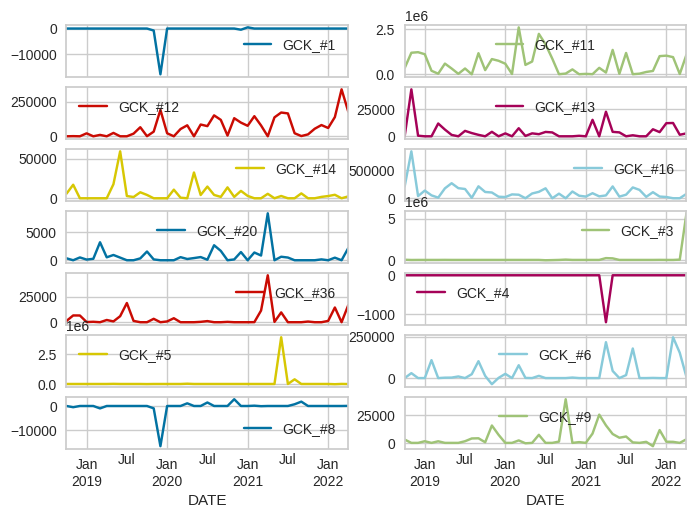

In [ ]:
msc.plot(subplots=True,layout=(7,2))

In [ ]:
# Identify columns with a high frequency of zero sales
threshold_for_zeros = 0.5  # Example: 50% of the months have zero sales
cols_with_frequent_zeros = (msc_monthly == 0).mean() > threshold_for_zeros

# Print columns that meet the criteria for further evaluation
bad_sales_candidates = cols_with_frequent_zeros[cols_with_frequent_zeros].index.tolist()
print("Columns for further evaluation (based on frequent zero sales):", bad_sales_candidates)


Columns for further evaluation (based on frequent zero sales): ['GCK_#1', 'GCK_#3', 'GCK_#4', 'GCK_#5', 'GCK_#8']


In [ ]:
# Adjusted as necessary to match your actual column names in 'msc'
bad_sales = ['GCK_#1', 'GCK_#3', 'GCK_#4', 'GCK_#5', 'GCK_#8']

# Initializing naive_sales to prevent NameError in case the condition fails
naive_sales = pd.DataFrame()

if all(col in msc.columns for col in bad_sales):
    naive_sales = msc[bad_sales].copy()  # Select 'bad_sales' columns
    #msc.drop(columns=bad_sales, inplace=True)  # Drop 'bad_sales' columns from 'msc'
else:
    print("One or more columns from 'bad_sales' do not exist in 'msc'.")

# After dropping 'bad_sales', reindexing 'msc' to a correct column order
# Ensure 'filtered_order' only contains columns that currently exist in 'msc'
filtered_order = [col for col in filtered_order if col in msc.columns]
msc1 = msc.reindex(columns=filtered_order)

# Display adjustments
print("Adjusted 'msc':")
print(msc1.head())
print("\n'Naive_sales':")
print(naive_sales.head())


Adjusted 'msc':
Empty DataFrame
Columns: []
Index: [2018-10-01 00:00:00, 2018-11-01 00:00:00, 2018-12-01 00:00:00, 2019-01-01 00:00:00, 2019-02-01 00:00:00]

'Naive_sales':
Mapped_GCK  GCK_#1   GCK_#3  GCK_#4  GCK_#5  GCK_#8
DATE                                               
2018-10-01     0.0  23680.0     0.0     0.0     0.0
2018-11-01     0.0  -6580.0     0.0     0.0  -500.0
2018-12-01     0.0      0.0     0.0     0.0     0.0
2019-01-01     0.0      0.0     0.0     0.0     0.0
2019-02-01     0.0      0.0     0.0     0.0     0.0


In [ ]:
msc.tail()

Mapped_GCK  GCK_#1    GCK_#11   GCK_#12  GCK_#13  GCK_#14  GCK_#16  GCK_#20  \
DATE                                                                          
2021-12-01     0.0  1006677.0   81445.0   3873.0   1750.0  29760.0    156.0   
2022-01-01     0.0  1033248.0   60208.0  12188.0   2820.0  21765.0      0.0   
2022-02-01     0.0   951179.0  139175.0  12384.0   4410.0      0.0    463.0   
2022-03-01     0.0    11320.0  340160.0   1424.0      0.0      0.0      0.0   
2022-04-01     0.0  1087630.0  178141.0   2738.0   2405.0  76910.0   2188.0   

Mapped_GCK     GCK_#3  GCK_#36  GCK_#4   GCK_#5    GCK_#6  GCK_#8   GCK_#9  
DATE                                                                        
2021-12-01     6825.0      0.0     0.0      0.0       0.0     0.0  11605.0  
2022-01-01        0.0   1282.0     0.0      0.0       0.0     0.0   1060.0  
2022-02-01    -1902.0  14439.0     0.0 -18320.0  246853.0     0.0    930.0  
2022-03-01    37200.0      0.0     0.0   4685.0  153038.0     0.0      0.0  
2022-04-01  5674979.0  16797.0     0.0  -5000.0    6350.0    41.0   3285.0

###Fix market data dataset

In [ ]:
#Get list of column names to treat
names=ds.columns.values.tolist()

In [ ]:
names[0]='ds'
names

['ds',
 'China_Production Index Machinery & Electricals_MAB_ELE_PRO156',
 'China_Shipments Index Machinery & Electricals_MAB_ELE_SHP156',
 'France_Production Index Machinery & Electricals_MAB_ELE_PRO250',
 'France_Shipments Index Machinery & Electricals_MAB_ELE_SHP250',
 'Germany_Production Index Machinery & Electricals_MAB_ELE_PRO276',
 'Germany_Shipments Index Machinery & Electricals_MAB_ELE_SHP276',
 'Italy_Production Index Machinery & Electricals_MAB_ELE_PRO380',
 'Italy_Shipments Index Machinery & Electricals_MAB_ELE_SHP380',
 'Japan_Production Index Machinery & Electricals_MAB_ELE_PRO392',
 'Japan_Shipments Index Machinery & Electricals_MAB_ELE_SHP392',
 'Switzerland_Production Index Machinery & Electricals_MAB_ELE_PRO756',
 'Switzerland_Shipments Index Machinery & Electricals_MAB_ELE_SHP756',
 'United Kingdom_Production Index Machinery & Electricals_MAB_ELE_PRO826',
 'United Kingdom_Shipments Index Machinery & Electricals_MAB_ELE_SHP826',
 'United States_Production Index Machine

In [ ]:
#Made by chatGPT; First one replaces first underscore from first hierarchy join, second removes the last hierarchy's string entirely
def rfl(input_list, replacement):
    new_list = []
    for input_item in input_list:
        # Ensure the item is a string before applying string methods
        if isinstance(input_item, str):
            # Find the index of the first underscore
            index = input_item.find('_')

            # If underscore exists, replace it with the specified replacement
            if index != -1:
                new_list.append(input_item[:index] + replacement + input_item[index + 1:])
            else:
                # If no underscore found, add the original string to the new list
                new_list.append(input_item)
        else:
            # If the item is not a string, you might want to handle it differently
            # For now, we'll just add it to the new list unchanged
            new_list.append(input_item)
    return new_list

In [ ]:
names = rfl(names, '-')
print(names)

['ds', 'China-Production Index Machinery & Electricals_MAB_ELE_PRO156', 'China-Shipments Index Machinery & Electricals_MAB_ELE_SHP156', 'France-Production Index Machinery & Electricals_MAB_ELE_PRO250', 'France-Shipments Index Machinery & Electricals_MAB_ELE_SHP250', 'Germany-Production Index Machinery & Electricals_MAB_ELE_PRO276', 'Germany-Shipments Index Machinery & Electricals_MAB_ELE_SHP276', 'Italy-Production Index Machinery & Electricals_MAB_ELE_PRO380', 'Italy-Shipments Index Machinery & Electricals_MAB_ELE_SHP380', 'Japan-Production Index Machinery & Electricals_MAB_ELE_PRO392', 'Japan-Shipments Index Machinery & Electricals_MAB_ELE_SHP392', 'Switzerland-Production Index Machinery & Electricals_MAB_ELE_PRO756', 'Switzerland-Shipments Index Machinery & Electricals_MAB_ELE_SHP756', 'United Kingdom-Production Index Machinery & Electricals_MAB_ELE_PRO826', 'United Kingdom-Shipments Index Machinery & Electricals_MAB_ELE_SHP826', 'United States-Production Index Machinery & Electrical

In [ ]:
#Second ChatGPT function
def rau(input_list):
    new_list = []
    for input_string in input_list:
        # Find the index of the first underscore
        index = input_string.find('_')

        # If underscore exists, replace everything after it with an empty string
        if index != -1:
            new_list.append(input_string[:index])  # Include the underscore in the replacement
        else:
            # If no underscore found, add the original string to the new list
            new_list.append(input_string)
    return new_list

In [ ]:
names=rau(names)

In [ ]:
ds.columns=names

In [ ]:
ds

ds  China-Production Index Machinery & Electricals  \
0     2004m2                                       16.940704   
1     2004m3                                       23.711852   
2     2004m4                                       24.435235   
3     2004m5                                       23.708115   
4     2004m6                                       27.009138   
..       ...                                             ...   
214  2021m12                                      310.763183   
215   2022m1                                      235.956129   
216   2022m2                                      235.956129   
217   2022m3                                      329.413367   
218   2022m4                                      267.373145   

     China-Shipments Index Machinery & Electricals  \
0                                        16.940704   
1                                        23.711852   
2                                        24.435235   
3                                        23.708115   
4                                        27.009138   
..                                             ...   
214                                     310.763183   
215                                     235.956129   
216                                     235.956129   
217                                     329.413367   
218                                     267.373145   

     France-Production Index Machinery & Electricals  \
0                                         112.091273   
1                                         136.327976   
2                                         117.791806   
3                                         109.002541   
4                                         133.785737   
..                                               ...   
214                                       100.565744   
215                                        85.743503   
216                                        90.603540   
217                                       107.843548   
218                                        87.698110   

     France-Shipments Index Machinery & Electricals  \
0                                         83.458866   
1                                        106.168192   
2                                         92.007646   
3                                         85.696486   
4                                        106.641482   
..                                              ...   
214                                      134.589504   
215                                      108.156320   
216                                      117.715770   
217                                      136.858720   
218                                      116.528738   

     Germany-Production Index Machinery & Electricals  \
0                                           82.623037   
1                                          100.556582   
2                                           89.653203   
3                                           86.880571   
4                                           99.010814   
..                                                ...   
214                                        118.103281   
215                                         94.550610   
216                                        103.987916   
217                                        121.308119   
218                                         99.522205   

     Germany-Shipments Index Machinery & Electricals  \
0                                          79.452532   
1                                          97.012918   
2                                          84.932358   
3                                          82.372794   
4                                          95.108740   
..                                               ...   
214                                       149.364286   
215                                       120.353403   
216                                       129.383676   
217          

In [ ]:
# Convert Dates column to string type
ds['ds'] = ds['ds'].astype(str)

# Fix format of Date values: turn 'm' into '-'
ds['ds'] = ds['ds'].str.replace('m', '-')

# Further fixing: remove initial space character
ds['ds'] = ds['ds'].str.strip()

# Change type of date values into datetime
ds['ds'] = pd.to_datetime(ds['ds'], format='mixed')

# Set date as index; skip for now, done later
#ds.set_index('Dates',inplace=True)


In [ ]:
#Check missing values rows
ds[ds.isna().any(axis=1)]

ds  China-Production Index Machinery & Electricals  \
0   2004-02-01                                       16.940704   
1   2004-03-01                                       23.711852   
2   2004-04-01                                       24.435235   
3   2004-05-01                                       23.708115   
4   2004-06-01                                       27.009138   
5   2004-07-01                                       23.590959   
6   2004-08-01                                       24.280597   
7   2004-09-01                                       25.989192   
8   2004-10-01                                       24.895962   
9   2004-11-01                                       26.774785   
10  2004-12-01                                       32.733756   
11  2005-01-01                                       21.928194   
12  2005-02-01                                       21.928194   
13  2005-03-01                                       29.649776   
14  2005-04-01                                       29.923805   
15  2005-05-01                                       32.739062   
16  2005-06-01                                       35.846714   
17  2005-07-01                                       31.002236   
18  2005-08-01                                       31.351821   
19  2005-09-01                                       33.137596   
20  2005-10-01                                       33.799609   
21  2005-11-01                                       37.686119   
22  2005-12-01                                       43.580971   
23  2006-01-01                                       28.044270   
24  2006-02-01                                       28.044270   
25  2006-03-01                                       38.417975   
26  2006-04-01                                       39.265153   
27  2006-05-01                                       41.435686   
28  2006-06-01                                       46.416657   
29  2006-07-01                                       39.703375   
30  2006-08-01                                       42.550550   
31  2006-09-01                                       45.720845   
32  2006-10-01                                       43.586796   
33  2006-11-01                                       45.881559   
34  2006-12-01                                       55.160576   
201 2020-11-01                                      274.401951   
202 2020-12-01                                      296.243834   
203 2021-01-01                                      214.843002   
204 2021-02-01                                      214.843002   
205 2021-03-01                                      309.574752   
206 2021-04-01                                      282.420831   
207 2021-05-01                                      291.521687   
208 2021-06-01                                      321.742425   
209 2021-07-01                                      264.032744   
210 2021-08-01                                      253.723069   
211 2021-09-01                                      259.000496   
212 2021-10-01                                      269.794432   
213 2021-11-01                                      291.520030   
214 2021-12-01                                      310.763183   
215 2022-01-01                                      235.956129   
216 2022-02-01                                      235.956129   
217 2022-03-01                                      329.413367   
218 2022-04-01                                      267.373145   

     China-Shipments Index Machinery & Electricals  \
0                                        16.940704   
1                                        23.711852   
2                                        24.435235   
3                                        23.708115   
4                                        27.009138   
5                                        23.590959   
6                                        24.280597   
7              

In [ ]:
ds.head()

ds  China-Production Index Machinery & Electricals  \
0 2004-02-01                                       16.940704   
1 2004-03-01                                       23.711852   
2 2004-04-01                                       24.435235   
3 2004-05-01                                       23.708115   
4 2004-06-01                                       27.009138   

   China-Shipments Index Machinery & Electricals  \
0                                      16.940704   
1                                      23.711852   
2                                      24.435235   
3                                      23.708115   
4                                      27.009138   

   France-Production Index Machinery & Electricals  \
0                                       112.091273   
1                                       136.327976   
2                                       117.791806   
3                                       109.002541   
4                                       133.785737   

   France-Shipments Index Machinery & Electricals  \
0                                       83.458866   
1                                      106.168192   
2                                       92.007646   
3                                       85.696486   
4                                      106.641482   

   Germany-Production Index Machinery & Electricals  \
0                                         82.623037   
1                                        100.556582   
2                                         89.653203   
3                                         86.880571   
4                                         99.010814   

   Germany-Shipments Index Machinery & Electricals  \
0                                        79.452532   
1                                        97.012918   
2                                        84.932358   
3                                        82.372794   
4                                        95.108740   

   Italy-Production Index Machinery & Electricals  \
0                                      124.289603   
1                                      143.411662   
2                                      129.083828   
3                                      135.590391   
4                                      136.424935   

   Italy-Shipments Index Machinery & Electricals  \
0                                      86.560493   
1                                     106.344544   
2                                      95.579673   
3                                     100.087039   
4                                     110.889719   

   Japan-Production Index Machinery & Electricals  ...  \
0                                      109.334010  ...   
1                                      140.884616  ...   
2                                      105.853579  ...   
3                                      101.864777  ...   
4                                      120.332920  ...   

   production index-France: Machinery and equipment n.e.c.  \
0                                         118.274109         
1                                         148.121841         
2                                         125.482231         
3                                         116.649750         
4                                         143.248734         

   production index-Germany: Machinery and equipment n.e.c.  \
0                                          80.829010          
1                                         102.130104          
2                                          90.961426          
3                                          88.082901          
4                                         100.978699          

   production index-United States: Electrical equipment  \
0                                         117.723991      
1                                         119.220779      
2                                         117.441124      
3                                         1

### Missing Values


In [ ]:
print(ds.isnull().sum())

ds                                                                  0
China-Production Index Machinery & Electricals                      0
China-Shipments Index Machinery & Electricals                       0
France-Production Index Machinery & Electricals                     0
France-Shipments Index Machinery & Electricals                      0
Germany-Production Index Machinery & Electricals                    0
Germany-Shipments Index Machinery & Electricals                     0
Italy-Production Index Machinery & Electricals                      0
Italy-Shipments Index Machinery & Electricals                       0
Japan-Production Index Machinery & Electricals                      0
Japan-Shipments Index Machinery & Electricals                       0
Switzerland-Production Index Machinery & Electricals                1
Switzerland-Shipments Index Machinery & Electricals                 1
United Kingdom-Production Index Machinery & Electricals             0
United Kingdom-Shipm

In [ ]:
#Turning "?" into nan which is what python identifies missing values
Oddmissingvalues = ["?","$","%","!","*","+","_","@","€"," ","{"]
ds.replace(Oddmissingvalues, np.nan, inplace = True)

In [ ]:
#Create data dummies for function
temp1=ds.copy()
temp2=ds.copy()

#Create dataframe to feed prophet
init = {'ds': [], 'y': []}
model = pd.DataFrame(data=init)
model

#Fill feeder with dates
model['ds']=temp1['ds']
model

#Remove date column from origin dummy for convenience
temp1.drop('ds',axis=1,inplace=True)

#Set index for destination dummy for accuracy and preserve missings
temp2.set_index('ds',inplace=True)

#In each loop, take column from temp1, put it in model, fit prophet to it, take results and put them in temp2
for col in temp1.columns:
  model['y']=temp1[col]
  m = Prophet()
  m.fit(model)
  future=m.make_future_dataframe(periods=60,freq='MS')
  fit=m.predict(future).set_index('ds')
  temp2[col]=fit['yhat']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstimg130/4q6jb75n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstimg130/uuush67e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17084', 'data', 'file=/tmp/tmpstimg130/4q6jb75n.json', 'init=/tmp/tmpstimg130/uuush67e.json', 'output', 'file=/tmp/tmpstimg130/prophet_modelhtfb33sl/prophet_model-20240410155401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

In [ ]:
ds=temp2.copy()

In [ ]:
# Drop columns with more than one missing value
# Note: axis=1 for columns, thresh=N requires at least N non-NA values to keep the column

#ds = ds.dropna(axis=1, thresh=len(ds) - 1)

# Step 2: Fill columns with exactly one missing value with the previous value
#for column in ds.columns:
 #   if ds[column].isna().sum() == 1:
  #      ds[column].fillna(method='ffill', inplace=True)

# Show the resulting DataFrame
#ds.head()

In [ ]:
print(ds.isnull().sum())

China-Production Index Machinery & Electricals                      0
China-Shipments Index Machinery & Electricals                       0
France-Production Index Machinery & Electricals                     0
France-Shipments Index Machinery & Electricals                      0
Germany-Production Index Machinery & Electricals                    0
Germany-Shipments Index Machinery & Electricals                     0
Italy-Production Index Machinery & Electricals                      0
Italy-Shipments Index Machinery & Electricals                       0
Japan-Production Index Machinery & Electricals                      0
Japan-Shipments Index Machinery & Electricals                       0
Switzerland-Production Index Machinery & Electricals                0
Switzerland-Shipments Index Machinery & Electricals                 0
United Kingdom-Production Index Machinery & Electricals             0
United Kingdom-Shipments Index Machinery & Electricals              0
United States-Produc

In [ ]:
print(sales.isnull().sum())

DATE             0
Mapped_GCK       0
Sales_EUR     2057
dtype: int64


In [ ]:
#Turning "?" into nan which is what python identifies missing values
Oddmissingvalues = ["?","$","%","!","*","+","_","@","€"," ","{"]
sales.replace(Oddmissingvalues, np.nan, inplace = True)

In [ ]:
print(sales.isnull().sum())

DATE             0
Mapped_GCK       0
Sales_EUR     2057
dtype: int64


##Data Exploration

###Market data

####Box Plots and Outliers

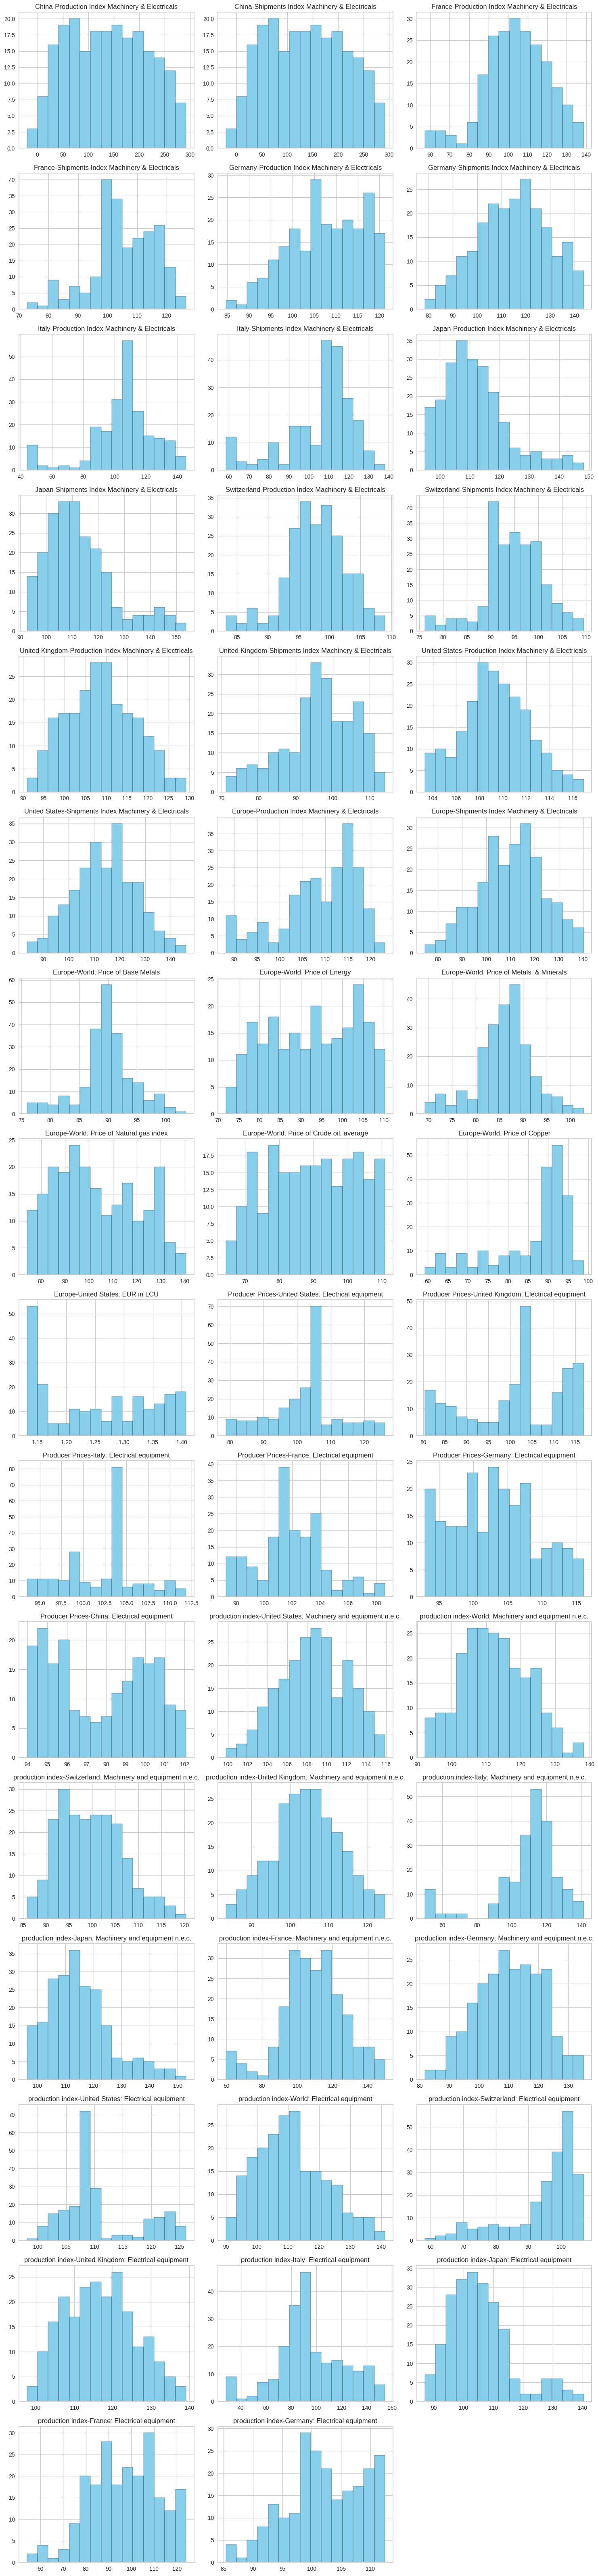

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Assume ds_encoded is your DataFrame after encoding categorical variables into numerical
# numerical_cols should contain the names of all numerical columns in your DataFrame
numerical_cols = ds.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns for subplots
num_rows = max((len(numerical_cols) - 1) // num_cols + 1, 1)  # Ensure num_rows is at least 1

# Adjust figure size based on the number of subplots
fig_width = 5 * num_cols
fig_height = 4 * num_rows

# Check if there are numerical columns to plot
if numerical_cols:
    # Create subplots only if there are numerical columns
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

    # Flatten the axes if num_rows is 1 to handle one-dimensional case
    if num_rows == 1:
        axes = axes.reshape(1, -1)

    # Plot histograms for each numerical column
    for i, ax in enumerate(axes.flatten()):
        if i < len(numerical_cols):
            ds[numerical_cols[i]].hist(ax=ax, bins=15, color='skyblue', edgecolor='black')
            ax.set_title(numerical_cols[i])
        else:
            ax.axis('off')  # Hide empty subplot if there are fewer numerical columns than subplots

    # Adjust layout to improve visualization and prevent overlapping
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the DataFrame.")


Poor distribution in some producer prices

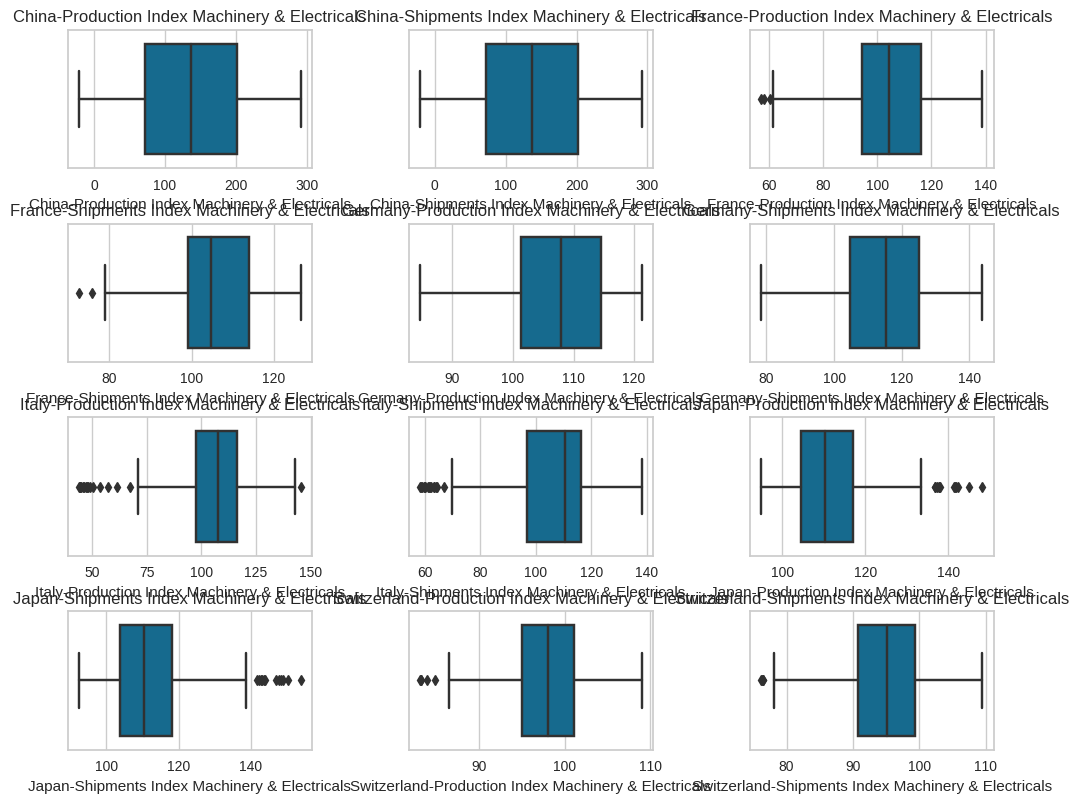

In [ ]:
# Convert non-numeric columns to numeric
ds_numeric = ds.apply(pd.to_numeric, errors='coerce')

# Filter out columns with all NaN values
ds_numeric = ds_numeric.dropna(axis=1, how='all')

# Filter out rows with all NaN values
ds_numeric = ds_numeric.dropna(axis=0, how='all')

# Replace NaN values with 0
ds_numeric = ds_numeric.fillna(0)

# Assume ds_numeric is your DataFrame after conversion
numerical_cols = ds_numeric.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots
fig, ax = plt.subplots(4, 3, figsize=(10, 9))

# Ensure tight_layout to avoid overlapping
plt.tight_layout()

for var, subplot in zip(ds_numeric[numerical_cols], ax.flatten()):
    sns.boxplot(x=ds_numeric[var], ax=subplot)
    subplot.set_title(var)  # Set the title of each subplot to the variable name

# Adjust layout to make room for titles and ensure no overlap
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)

plt.show()


Note: value 0 outliers correspond to missing values

####Correlations

In [ ]:
test=((ds[1:].corr()>0.8).sum())>1
test

China-Production Index Machinery & Electricals                      True
China-Shipments Index Machinery & Electricals                       True
France-Production Index Machinery & Electricals                     True
France-Shipments Index Machinery & Electricals                      True
Germany-Production Index Machinery & Electricals                    True
Germany-Shipments Index Machinery & Electricals                     True
Italy-Production Index Machinery & Electricals                      True
Italy-Shipments Index Machinery & Electricals                       True
Japan-Production Index Machinery & Electricals                      True
Japan-Shipments Index Machinery & Electricals                       True
Switzerland-Production Index Machinery & Electricals                True
Switzerland-Shipments Index Machinery & Electricals                 True
United Kingdom-Production Index Machinery & Electricals             True
United Kingdom-Shipments Index Machinery & Electric

Most columns exhibit very high correlation, need to be treated.

In [ ]:
b=ds[1:].corr()
a=b.loc[test,test]
a.head()

China-Production Index Machinery & Electricals  \
China-Production Index Machinery & Electricals                                          1.000000   
China-Shipments Index Machinery & Electricals                                           1.000000   
France-Production Index Machinery & Electricals                                        -0.581480   
France-Shipments Index Machinery & Electricals                                          0.425040   
Germany-Production Index Machinery & Electricals                                        0.562664   

                                                  China-Shipments Index Machinery & Electricals  \
China-Production Index Machinery & Electricals                                         1.000000   
China-Shipments Index Machinery & Electricals                                          1.000000   
France-Production Index Machinery & Electricals                                       -0.581480   
France-Shipments Index Machinery & Electricals                                         0.425040   
Germany-Production Index Machinery & Electricals                                       0.562664   

                                                  France-Production Index Machinery & Electricals  \
China-Production Index Machinery & Electricals                                          -0.581480   
China-Shipments Index Machinery & Electricals                                           -0.581480   
France-Production Index Machinery & Electricals                                          1.000000   
France-Shipments Index Machinery & Electricals                                           0.432848   
Germany-Production Index Machinery & Electricals                                         0.139087   

                                                  France-Shipments Index Machinery & Electricals  \
China-Production Index Machinery & Electricals                                          0.425040   
China-Shipments Index Machinery & Electricals                                           0.425040   
France-Production Index Machinery & Electricals                                         0.432848   
France-Shipments Index Machinery & Electricals                                          1.000000   
Germany-Production Index Machinery & Electricals                                        0.754047   

                                                  Germany-Production Index Machinery & Electricals  \
China-Production Index Machinery & Electricals                                            0.562664   
China-Shipments Index Machinery & Electricals                                             0.562664   
France-Production Index Machinery & Electricals                                           0.139087   
France-Shipments Index Machinery & Electricals                                            0.754047   
Germany-Production Index Machinery & Electricals                                          1.000000   

                                                  Germany-Shipments Index Machinery & Electricals  \
China-Production Index Machinery & Electricals                                           0.864370   
China-Shipments Index Machinery & Electricals                                            0.864370   
France-Production Index Machinery & Electricals                                         -0.216696   
France-Shipments Index Machinery & Electricals                                           0.689424   
Germany-Production Index Machinery & Electricals                                         0.890197   

                                                  Italy-Production Index Machinery & Electricals  \
China-Production Index Machinery & Electricals                                         -0.385001   
China-Shipments Index Machinery & Electricals                                          -0.385001   
France-Production Index Machinery & Electricals                                         0.840843   
France-Shipments Index Mac

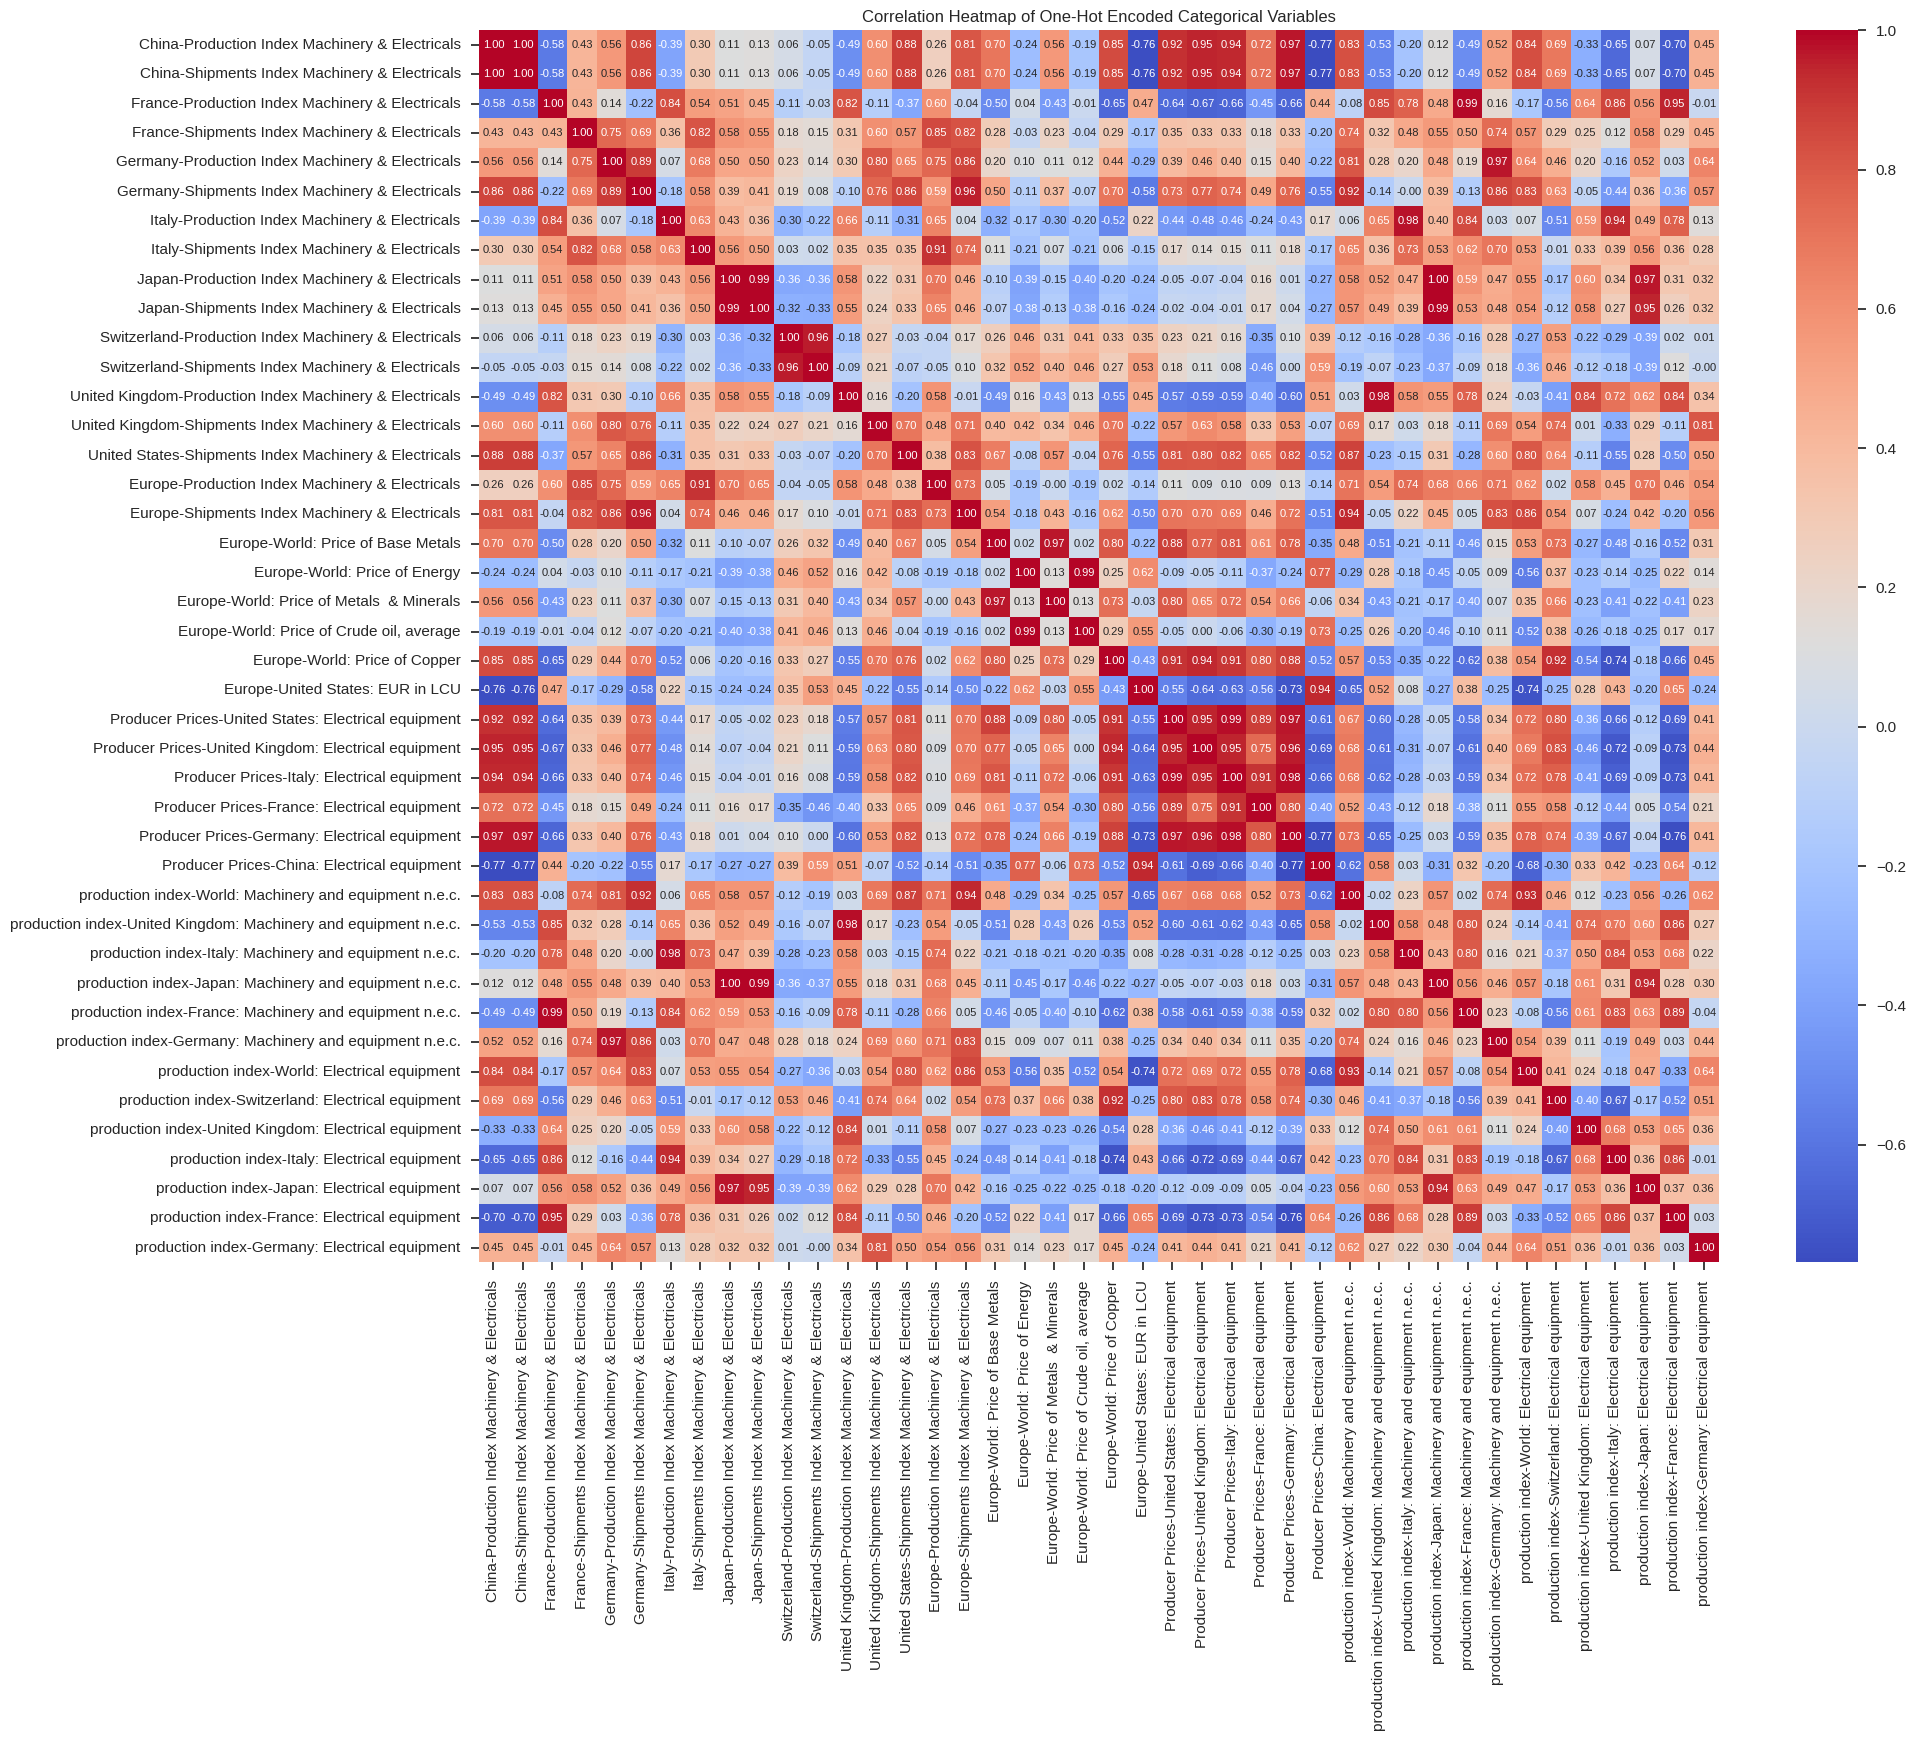

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.set_context("notebook")
# Plot
plt.figure(figsize=(20, 16))
sns.heatmap(a, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.title("Correlation Heatmap of One-Hot Encoded Categorical Variables")
plt.show()

In [ ]:
#Preserve original dataset
df=ds.copy()

In [ ]:
#Removal of higly correlated columns in market dataset
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)

In [ ]:
correlation(ds,0.8)

China-Production Index Machinery & Electricals  \
ds                                                           
2004-02-01                                      -20.685537   
2004-03-01                                       22.949974   
2004-04-01                                       14.486522   
2004-05-01                                       23.520894   
2004-06-01                                       38.020992   
...                                                    ...   
2021-12-01                                      290.548981   
2022-01-01                                      241.819159   
2022-02-01                                      243.327239   
2022-03-01                                      291.610413   
2022-04-01                                      276.887612   

            France-Production Index Machinery & Electricals  \
ds                                                            
2004-02-01                                       121.448813   
2004-03-01                                       138.809039   
2004-04-01                                       122.588490   
2004-05-01                                       117.974622   
2004-06-01                                       137.943513   
...                                                     ...   
2021-12-01                                        95.165288   
2022-01-01                                        80.382613   
2022-02-01                                        85.011232   
2022-03-01                                       102.637193   
2022-04-01                                        86.547516   

            France-Shipments Index Machinery & Electricals  \
ds                                                           
2004-02-01                                       88.004112   
2004-03-01                                      105.663317   
2004-04-01                                       90.621936   
2004-05-01                                       87.017884   
2004-06-01                                      111.106580   
...                                                    ...   
2021-12-01                                      121.295986   
2022-01-01                                      104.838134   
2022-02-01                                      107.544890   
2022-03-01                                      124.431935   
2022-04-01                                      109.594042   

            Germany-Production Index Machinery & Electricals  \
ds                                                             
2004-02-01                                         90.579179   
2004-03-01                                        105.906410   
2004-04-01                                         93.622705   
2004-05-01                                         90.921693   
2004-06-01                                        104.265319   
...                                                      ...   
2021-12-01                                        116.245895   
2022-01-01                                         94.758157   
2022-02-01                                        100.937292   
2022-03-01                                        116.518524   
2022-04-01                                        102.779571   

            Japan-Production Index Machinery & Electricals  \
ds                                                           
2004-02-01                                      120.649699   
2004-03-01                                      148.232267   
2004-04-01                                      114.999767   
2004-05-01                                      110.821320   
2004-06-01                                      126.896079   
...                                                    ...   
2021-12-01                                      120.914594   
2022-01-01                                      107.584425   
2022-02-01                                      115.125052   
2022-03-01                                      142.283902   
2

Removed hihgly correlated variables. Ultimately which ones are chosen is not very relevant, as they posses almost totally the same information. In total, 28 variables were removed.

####Exploration

<Axes: xlabel='ds'>

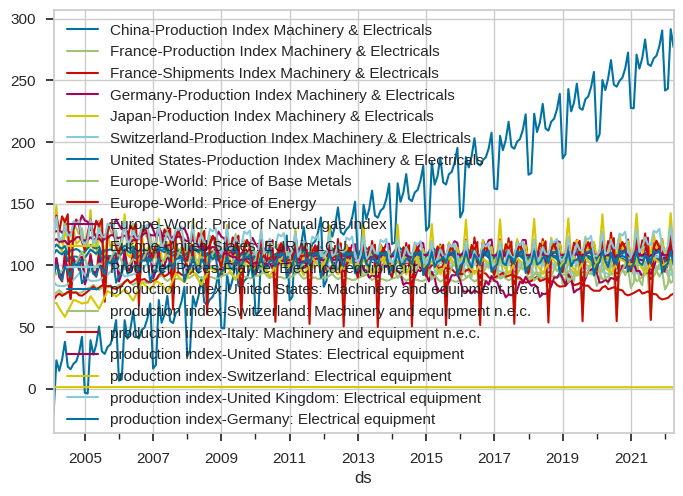

In [ ]:
ds.plot()

Series' show evidence of seasonality and china index has trend, as opposed to others. EUR in LCU variable has low values comparatively, normalization is recomended.

In [ ]:
ds.head().T

ds                                                  2004-02-01  2004-03-01  \
China-Production Index Machinery & Electricals      -20.685537   22.949974   
France-Production Index Machinery & Electricals     121.448813  138.809039   
France-Shipments Index Machinery & Electricals       88.004112  105.663317   
Germany-Production Index Machinery & Electricals     90.579179  105.906410   
Japan-Production Index Machinery & Electricals      120.649699  148.232267   
Switzerland-Production Index Machinery & Electr...   86.943066   83.939971   
United States-Production Index Machinery & Elec...  113.888893  116.945218   
Europe-World: Price of Base Metals                   75.963440   77.936576   
Europe-World: Price of Energy                        71.884259   75.295082   
Europe-World: Price of Natural gas index            127.725104  127.581569   
Europe-United States: EUR in LCU                      1.216132    1.215596   
Producer Prices-France: Electrical equipment               NaN         NaN   
production index-United States: Machinery and e...  108.654781  112.551994   
production index-Switzerland: Machinery and equ...   97.702768   92.664046   
production index-Italy: Machinery and equipment...  129.671249  140.393009   
production index-United States: Electrical equi...  119.953483  121.362700   
production index-Switzerland: Electrical equipment   69.313682   69.511859   
production index-United Kingdom: Electrical equ...  123.296951  139.123987   
production index-Germany: Electrical equipment       91.680016  100.512275   

ds                                                  2004-04-01  2004-05-01  \
China-Production Index Machinery & Electricals       14.486522   23.520894   
France-Production Index Machinery & Electricals     122.588490  117.974622   
France-Shipments Index Machinery & Electricals       90.621936   87.017884   
Germany-Production Index Machinery & Electricals     93.622705   90.921693   
Japan-Production Index Machinery & Electricals      114.999767  110.821320   
Switzerland-Production Index Machinery & Electr...   83.344276   83.195451   
United States-Production Index Machinery & Elec...  114.659019  113.663293   
Europe-World: Price of Base Metals                   79.912585   77.565056   
Europe-World: Price of Energy                        77.151348   75.221133   
Europe-World: Price of Natural gas index            128.896396  126.390708   
Europe-United States: EUR in LCU                      1.216471    1.216776   
Producer Prices-France: Electrical equipment               NaN         NaN   
production index-United States: Machinery and e...  110.362195  108.883999   
production index-Switzerland: Machinery and equ...   93.973977   95.843482   
production index-Italy: Machinery and equipment...  127.569177  139.735365   
production index-United States: Electrical equi...  119.209696  119.240796   
production index-Switzerland: Electrical equipment   65.364468   61.616959   
production index-United Kingdom: Electrical equ...  120.587925  122.320590   
production index-Germany: Electrical equipment       92.834382   88.081628   

ds                                                  2004-06-01  
China-Production Index Machinery & Electricals       38.020992  
France-Production Index Machinery & Electricals     137.943513  
France-Shipments Index Machinery & Electricals      111.106580  
Germany-Production Index Machinery & Electricals    104.265319  
Japan-Production Index Machinery & Electricals      126.896079  
Switzerland-Production Index Machinery & Electr...   83.318941  
United States-Production Index Machinery & Elec...  115.677760  
Europe-World: Price of Base Metals                   76.261199  
Europe-World: Price of Energy                        76.739124  
Europe-World: Price of Natural gas index            129.031387  
Europe-United States: EUR in LCU                      1.222949  
Producer Prices-France: Electrical equipment               NaN  
production index-United States: M

In [ ]:
msc

Mapped_GCK   GCK_#1    GCK_#11   GCK_#12  GCK_#13  GCK_#14   GCK_#16  GCK_#20  \
DATE                                                                            
2018-10-01      0.0   340091.0       0.0      0.0   5770.0  205995.0    348.0   
2018-11-01      0.0  1195336.0    1070.0  43677.0  17130.0  828478.0      0.0   
2018-12-01      0.0  1226122.0       0.0    550.0      0.0   38028.0    503.0   
2019-01-01      0.0  1113149.0   21484.0      0.0      0.0  134946.0    120.0   
2019-02-01      0.0   191455.0       0.0      0.0      0.0   50944.0    259.0   
2019-03-01      0.0    27540.0   10118.0  11890.0      0.0   10436.0   3222.0   
2019-04-01      0.0   590865.0       0.0   6258.0      0.0  174606.0    527.0   
2019-05-01      0.0   317323.0   24468.0   1292.0  17820.0  265209.0    944.0   
2019-06-01      0.0    21084.0       0.0      0.0  59454.0  177801.0    471.0   
2019-07-01      0.0   318192.0       0.0   5040.0   2820.0  163198.0      0.0   
2019-08-01      0.0    -6455.0   19217.0   3000.0   1602.0    7539.0      0.0   
2019-09-01      0.0  1169441.0   65735.0   1350.0   7590.0  210365.0    334.0   
2019-10-01      0.0   228130.0     750.0      0.0   4230.0  110606.0   1566.0   
2019-11-01   -769.0   842776.0   33611.0   4172.0      0.0  101220.0    149.0   
2019-12-01 -17800.0   747063.0  191423.0      0.0      0.0   26967.0      0.0   
2020-01-01      0.0   584370.0   21961.0   2713.0      0.0   20955.0      0.0   
2020-02-01      0.0    10380.0       0.0      0.0  10900.0   67789.0      0.0   
2020-03-01      0.0  2608890.0   52648.0   7524.0    748.0   62150.0    555.0   
2020-04-01      0.0   517942.0   79632.0    330.0      0.0     200.0    224.0   
2020-05-01      0.0   705407.0       0.0   2737.0  32670.0   83960.0    390.0   
2020-06-01      0.0  2246948.0   85249.0   1970.0   4125.0  113049.0    570.0   
2020-07-01      0.0  1662930.0   73704.0   4050.0  14793.0  175241.0     98.0   
2020-08-01      0.0   867830.0  151620.0   3600.0   4232.0    -581.0   2688.0   
2020-09-01      0.0      800.0  118975.0      0.0   1750.0   80643.0   1676.0   
2020-10-01      0.0    35345.0    5395.0      0.0  13799.0       0.0      0.0   
2020-11-01      0.0   267680.0  131074.0      0.0   1750.0  118861.0    146.0   
2020-12-01   -455.0        0.0   99178.0    460.0   9344.0   44371.0   1469.0   
2021-01-01    455.0    18200.0   76125.0      0.0   3028.0   29448.0      0.0   
2021-02-01      0.0     1780.0  145705.0  15321.0      0.0   88755.0   1387.0   
2021-03-01      0.0   354201.0   78444.0      0.0      0.0   33374.0    847.0   
2021-04-01      0.0    92479.0       0.0  22864.0   5629.0   49936.0   8414.0   
2021-05-01      0.0  1353649.0  137245.0   4130.0      0.0  208659.0      0.0   
2021-06-01      0.0    23520.0  172246.0   3635.0   2900.0   28476.0    629.0   
2021-07-01      0.0  1183662.0  165761.0      0.0      0.0   62588.0    484.0   
2021-08-01      0.0        0.0   22080.0    955.0      0.0  190783.0      0.0   
2021-09-01      0.0    29790.0    1780.0      0.0   6182.0  147525.0      0.0   
2021-10-01      0.0   124600.0   13838.0      0.0      0.0   24452.0      0.0   
2021-11-01      0.0   180274.0   54755.0   6538.0      0.0  106720.0      0.0   
2021-12-01      0.0  1006677.0   81445.0   3873.0   1750.0   29760.0    156.0   
2022-01-01      0.0  1033248.0   60208.0  12188.0   2820.0   21765.0      0.0   
2022-02-01      0.0   951179.0  139175.0  12384.0   4410.0       0.0    463.0   
2022-03-01      0.0    11320.0  340160.0   1424.0      0.0       0.0      0.0   
2022-04-01      0.0  1087630.0  178141.0   2738.0   2405.0   76910.0   2188.0   

Mapped_GCK     GCK_#3  GCK_#36  GCK_#4     GCK_#5    GCK_#6   GCK_#8   GCK_#9  
DATE                                                                           
2018-10-01    23680.0   1224.0     0.0        0.0       0.0      0.0   3016.0  
2018-11-01    -6580.0   6650.0     0.0        0.0   29807.0   -500.0      0.0  
2018-12-01        0.0   6593.0    

<Axes: xlabel='DATE'>

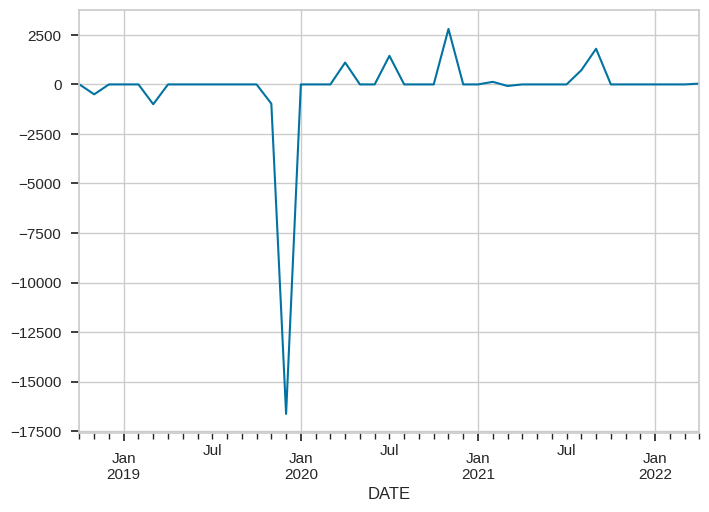

In [ ]:
 msc['GCK_#8'].plot()
#naive_sales['GCK_#3'][:].plot()

###Sales data

####Sales Outliers

In [ ]:
msc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-01 to 2022-04-01
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GCK_#1   43 non-null     float64
 1   GCK_#11  43 non-null     float64
 2   GCK_#12  43 non-null     float64
 3   GCK_#13  43 non-null     float64
 4   GCK_#14  43 non-null     float64
 5   GCK_#16  43 non-null     float64
 6   GCK_#20  43 non-null     float64
 7   GCK_#3   43 non-null     float64
 8   GCK_#36  43 non-null     float64
 9   GCK_#4   43 non-null     float64
 10  GCK_#5   43 non-null     float64
 11  GCK_#6   43 non-null     float64
 12  GCK_#8   43 non-null     float64
 13  GCK_#9   43 non-null     float64
dtypes: float64(14)
memory usage: 5.0 KB


In [ ]:
msc.head()

Mapped_GCK  GCK_#1    GCK_#11  GCK_#12  GCK_#13  GCK_#14   GCK_#16  GCK_#20  \
DATE                                                                          
2018-10-01     0.0   340091.0      0.0      0.0   5770.0  205995.0    348.0   
2018-11-01     0.0  1195336.0   1070.0  43677.0  17130.0  828478.0      0.0   
2018-12-01     0.0  1226122.0      0.0    550.0      0.0   38028.0    503.0   
2019-01-01     0.0  1113149.0  21484.0      0.0      0.0  134946.0    120.0   
2019-02-01     0.0   191455.0      0.0      0.0      0.0   50944.0    259.0   

Mapped_GCK   GCK_#3  GCK_#36  GCK_#4  GCK_#5    GCK_#6  GCK_#8  GCK_#9  
DATE                                                                    
2018-10-01  23680.0   1224.0     0.0     0.0       0.0     0.0  3016.0  
2018-11-01  -6580.0   6650.0     0.0     0.0   29807.0  -500.0     0.0  
2018-12-01      0.0   6593.0     0.0     0.0       0.0     0.0     0.0  
2019-01-01      0.0    182.0     0.0     0.0       0.0     0.0  1487.0  
2019-02-01      0.0    435.0     0.0     0.0  108440.0     0.0     0.0

In [ ]:
# Checking for duplicates
describe_df=msc.describe().T
describe_df[describe_df.duplicated(keep=False)]


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

In [ ]:
msc.duplicated(keep=False).sum()

0

In [ ]:
msc[msc.duplicated(keep=False)]


Empty DataFrame
Columns: [GCK_#1, GCK_#11, GCK_#12, GCK_#13, GCK_#14, GCK_#16, GCK_#20, GCK_#3, GCK_#36, GCK_#4, GCK_#5, GCK_#6, GCK_#8, GCK_#9]
Index: []

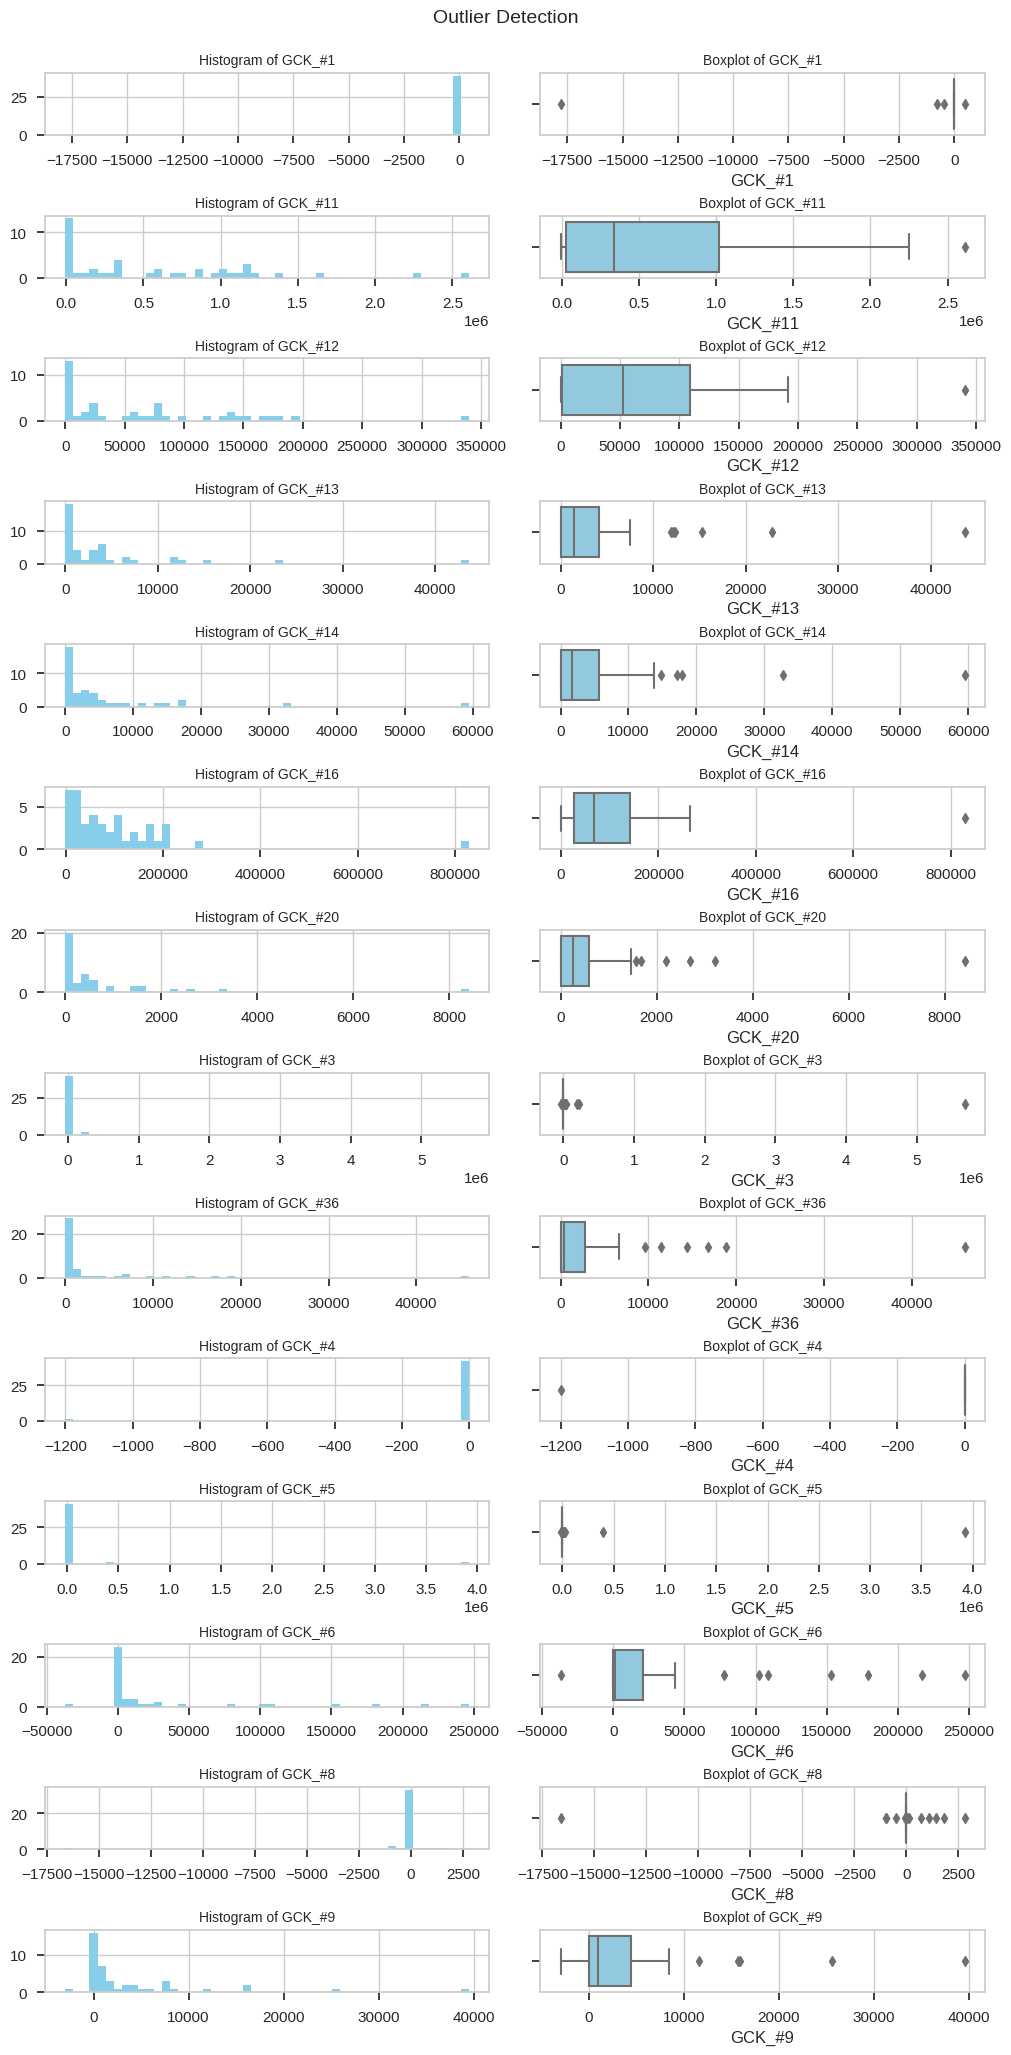

In [ ]:
hist_box(msc, "Outlier Detection", 10, 20, 'skyblue')

In [ ]:
msc_clean = remove_outliers(msc)

print("Original shape:", msc.shape)
print("Cleaned shape:", msc_clean.shape)

Original shape: (43, 14)
Cleaned shape: (8, 14)


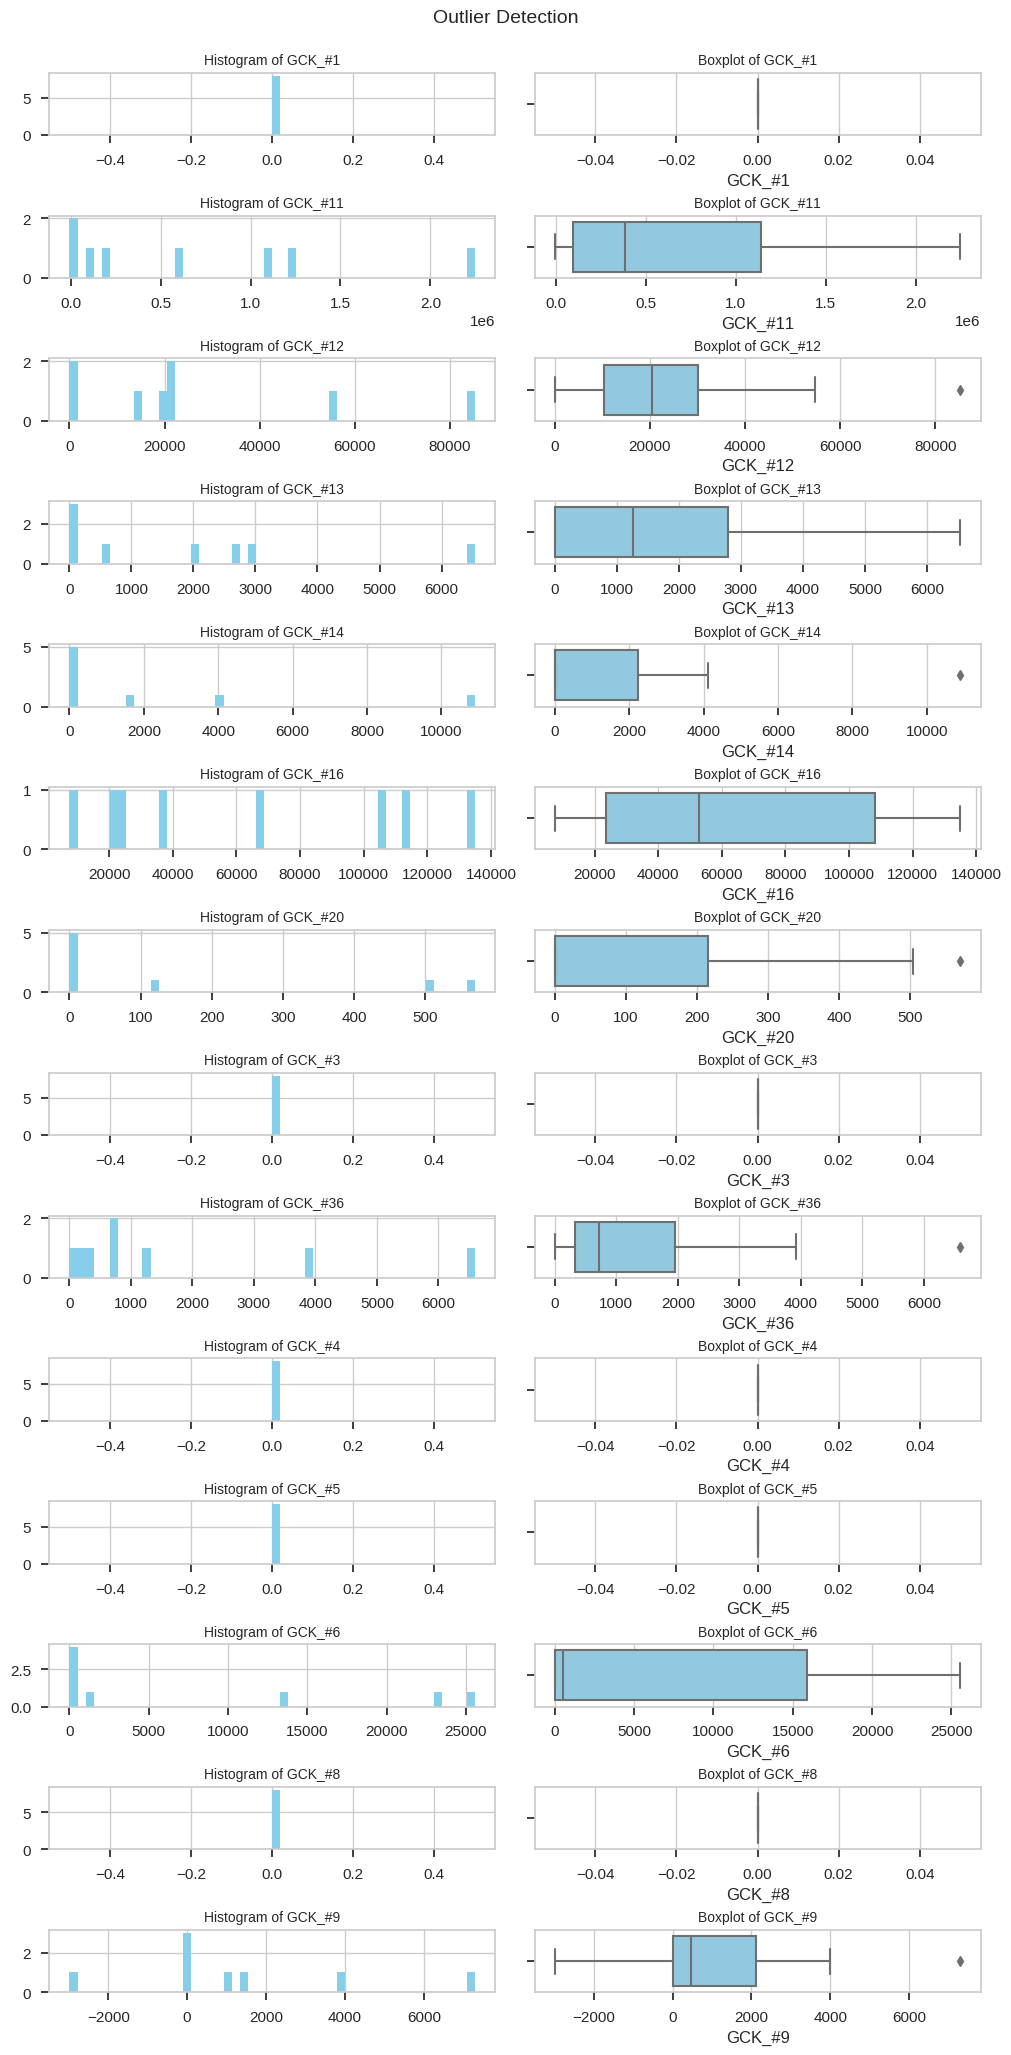

In [ ]:
hist_box(msc_clean, "Outlier Detection", 10, 20, 'skyblue')

In [ ]:
#msc = msc_clean
msc.describe(include='all').T

count           mean            std      min      25%       50%  \
Mapped_GCK                                                                    
GCK_#1       43.0    -431.837209    2716.031006 -17800.0      0.0       0.0   
GCK_#11      43.0  587973.093023  633175.185936  -6455.0  28665.0  340091.0   
GCK_#12      43.0   66381.860465   74088.308731      0.0   1425.0   52648.0   
GCK_#13      43.0    4341.000000    7862.504224      0.0      0.0    1424.0   
GCK_#14      43.0    5573.279070   10665.332391      0.0      0.0    1750.0   
GCK_#16      43.0  101677.372093  133923.308239   -581.0  27721.5   67789.0   
GCK_#20      43.0     716.906977    1421.472473      0.0      0.0     259.0   
GCK_#3       43.0  142498.837209  864968.179520 -38877.0      0.0       0.0   
GCK_#36      43.0    3597.255814    8156.139467      0.0      0.0     360.0   
GCK_#4       43.0     -27.906977     182.998284  -1200.0      0.0       0.0   
GCK_#5       43.0  100450.046512  599478.875967 -18320.0      0.0       0.0   
GCK_#6       43.0   28869.906977   62094.263637 -36995.0      0.0     985.0   
GCK_#8       43.0    -259.162791    2631.204277 -16630.0      0.0       0.0   
GCK_#9       43.0    4032.790698    7761.144057  -2983.0      0.0     950.0   

                  75%        max  
Mapped_GCK                        
GCK_#1            0.0      455.0  
GCK_#11     1019962.5  2608890.0  
GCK_#12      109076.5   340160.0  
GCK_#13        4151.0    43677.0  
GCK_#14        5699.5    59454.0  
GCK_#16      141235.5   828478.0  
GCK_#20         599.5     8414.0  
GCK_#3            0.0  5674979.0  
GCK_#36        2766.0    46034.0  
GCK_#4            0.0        0.0  
GCK_#5            0.0  3920907.0  
GCK_#6        20650.0   246853.0  
GCK_#8            0.0     2800.0  
GCK_#9         4422.0    39546.0

In [ ]:
#msc.plot(subplots=True,layout=(7,2))

#### Sales stationarity (significance level 1%) and Sales ACF and PACF

In [ ]:
print(msc.columns.tolist())

['GCK_#1', 'GCK_#11', 'GCK_#12', 'GCK_#13', 'GCK_#14', 'GCK_#16', 'GCK_#20', 'GCK_#3', 'GCK_#36', 'GCK_#4', 'GCK_#5', 'GCK_#6', 'GCK_#8', 'GCK_#9']


##### 'GCK_#1'

In [ ]:
df_reset = msc.reset_index()
#sta_verif(df_reset, 'GCK_#1')

In [ ]:
#acf_pacf(df_reset, 'GCK_#1')

##### 'GCK_#11'

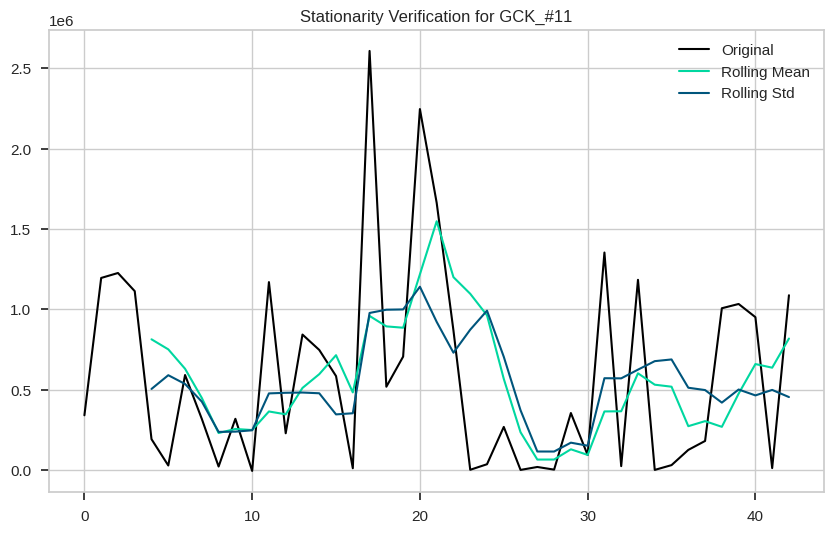

Results of Dickey Fuller Test:
Test Statistic                 -5.633052
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#11')

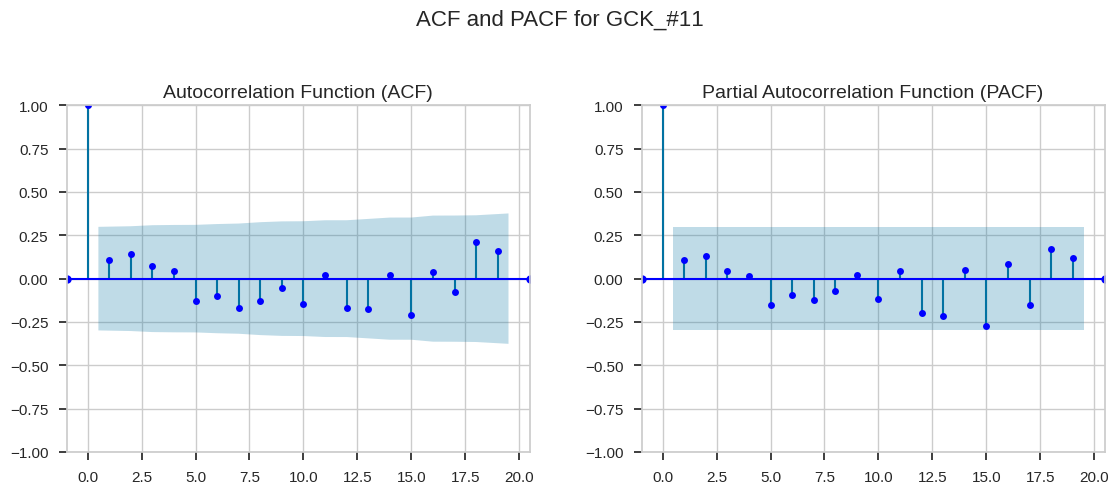

In [ ]:
acf_pacf(df_reset, 'GCK_#11')

##### 'GCK_#12'

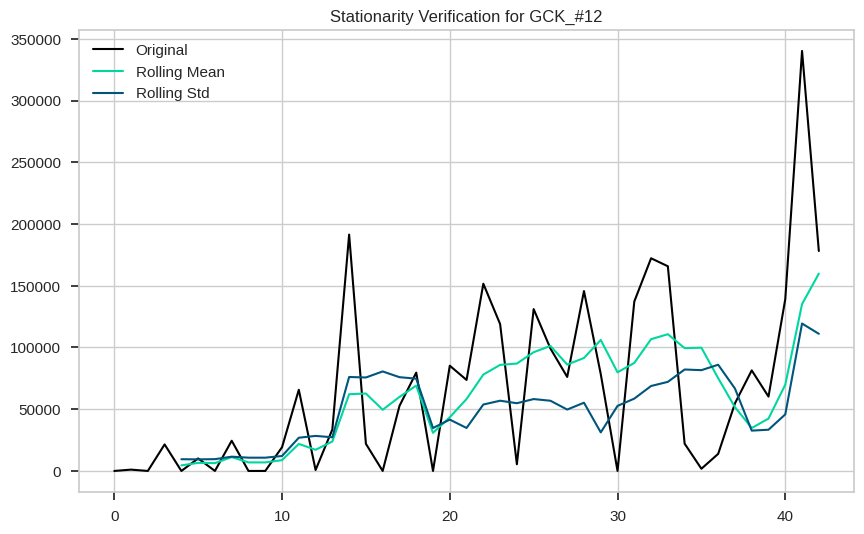

Results of Dickey Fuller Test:
Test Statistic                 -3.837681
p-value                         0.002544
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#12')

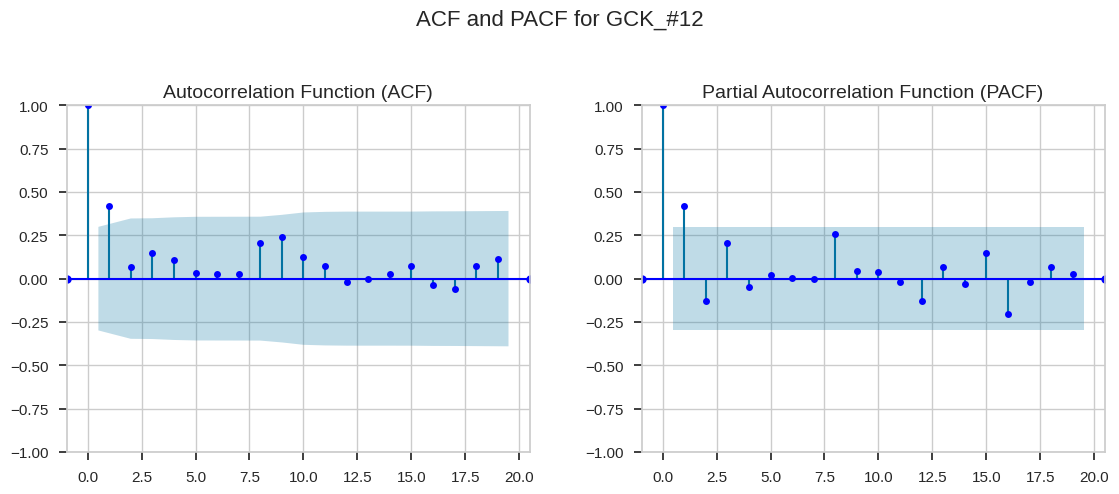

In [ ]:
acf_pacf(df_reset, 'GCK_#12')

##### 'GCK_#13'

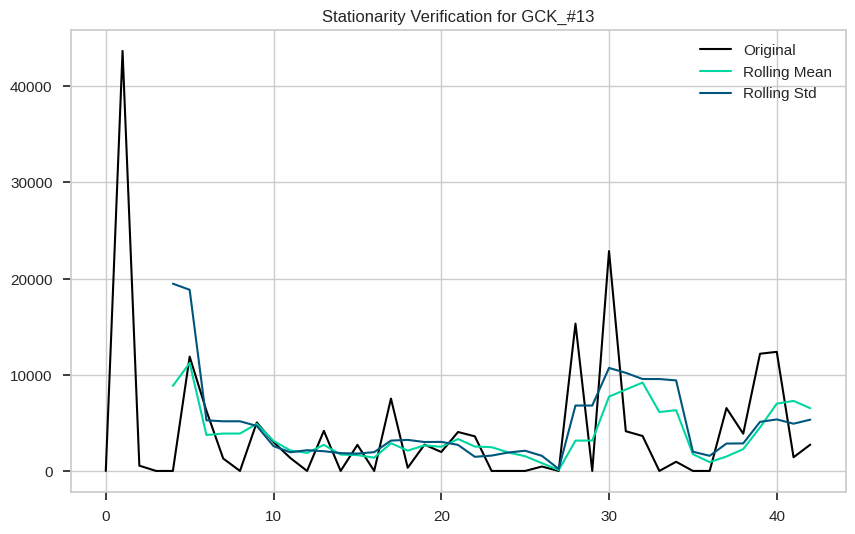

Results of Dickey Fuller Test:
Test Statistic                 -2.756138
p-value                         0.064817
#Lags Used                      4.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#13')

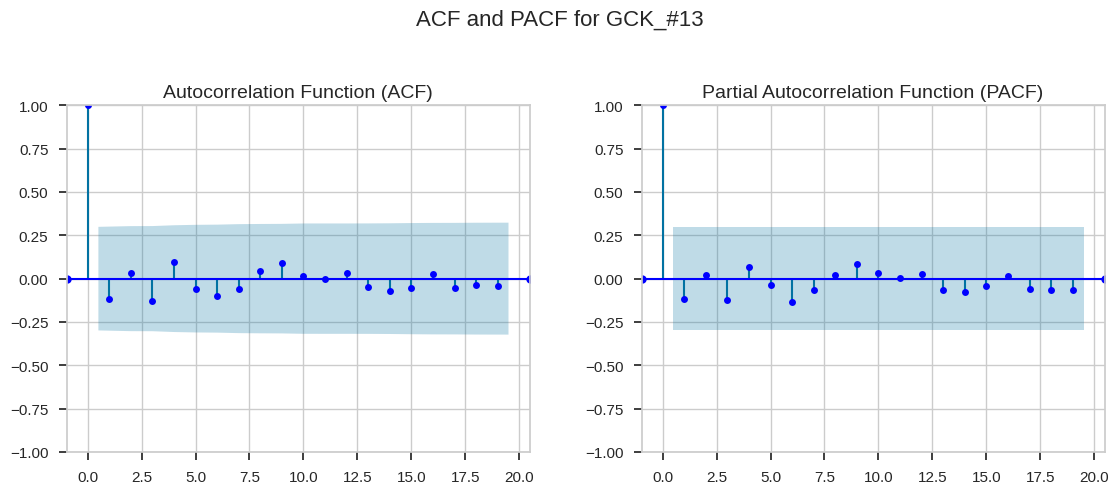

In [ ]:
acf_pacf(df_reset, 'GCK_#13')

##### 'GCK_#14'

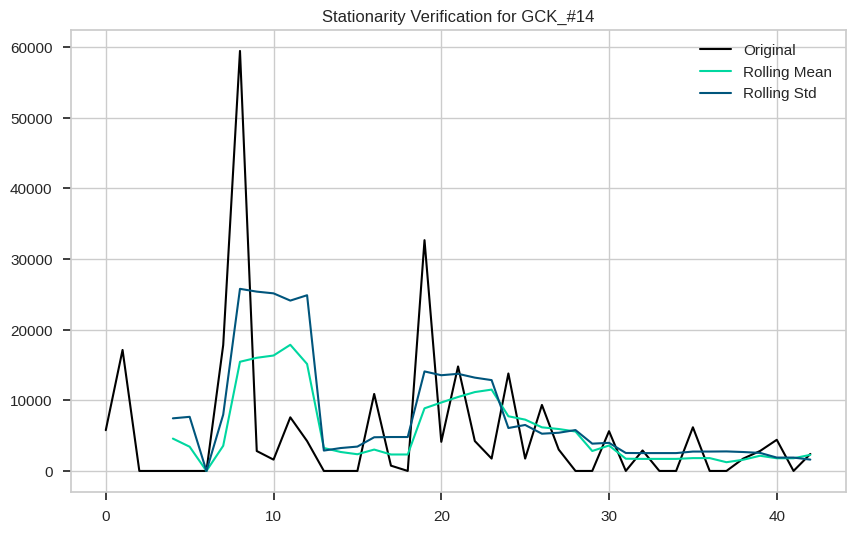

Results of Dickey Fuller Test:
Test Statistic                 -0.504597
p-value                         0.891116
#Lags Used                     10.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#14')

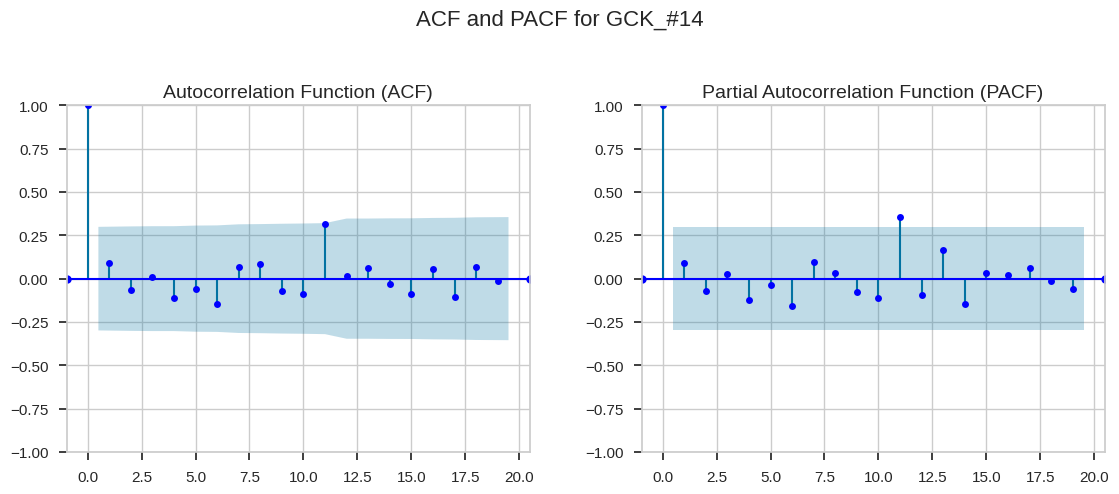

In [ ]:
acf_pacf(df_reset, 'GCK_#14')

##### 'GCK_#16'

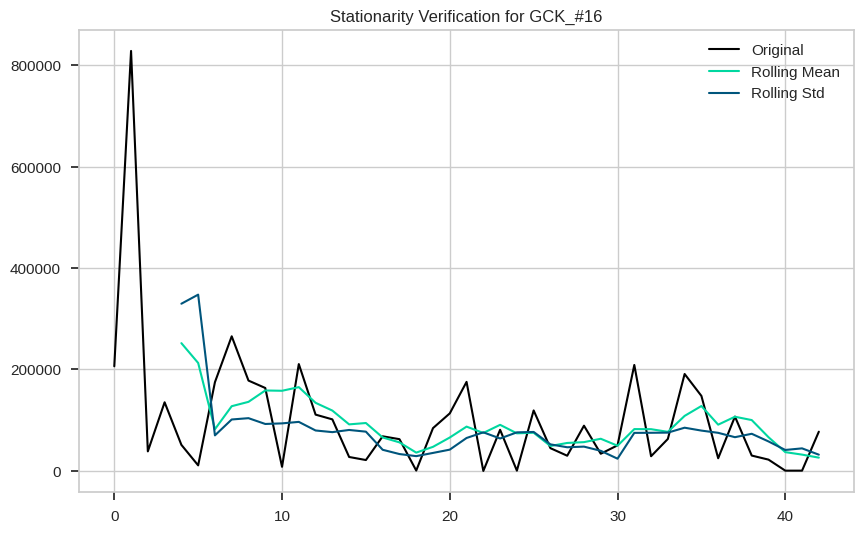

Results of Dickey Fuller Test:
Test Statistic                -5.798990e+00
p-value                        4.678898e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#16')

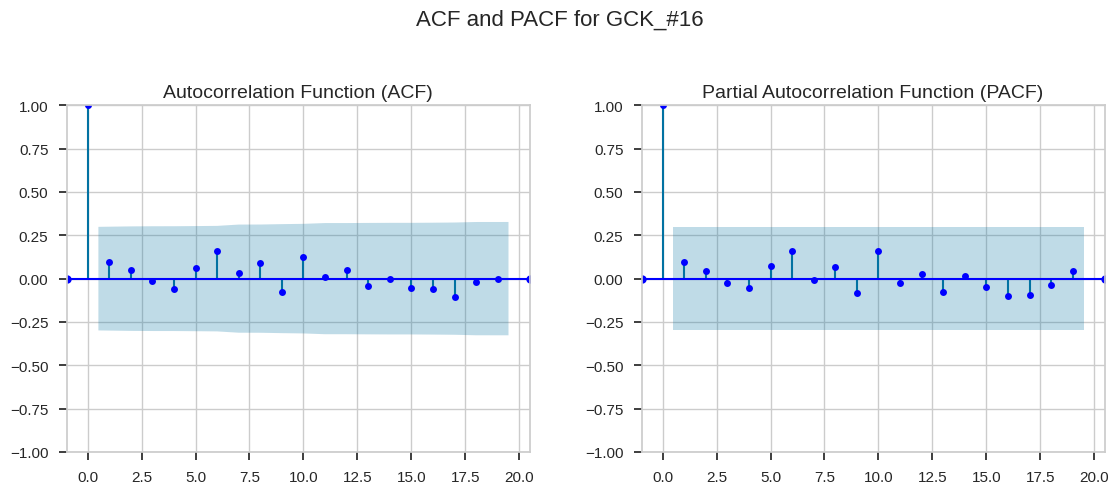

In [ ]:
acf_pacf(df_reset, 'GCK_#16')

##### 'GCK_#20'

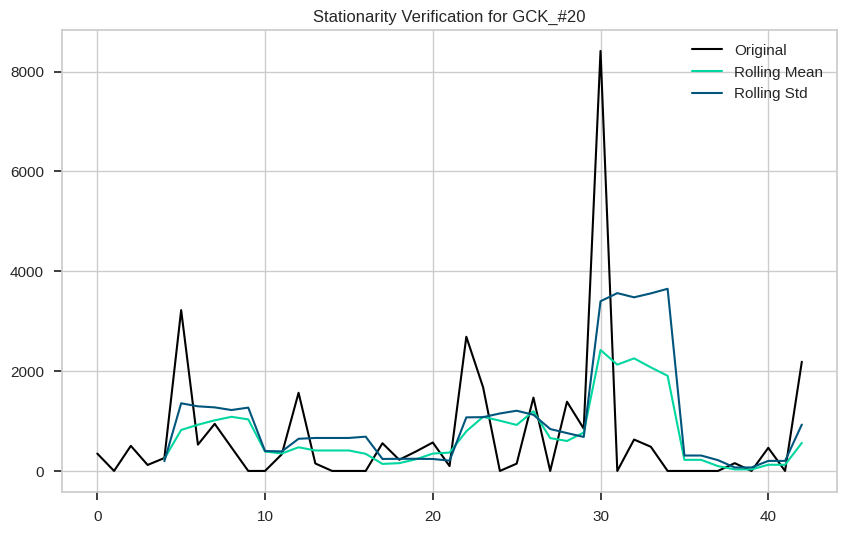

Results of Dickey Fuller Test:
Test Statistic                -6.429208e+00
p-value                        1.714039e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#20')

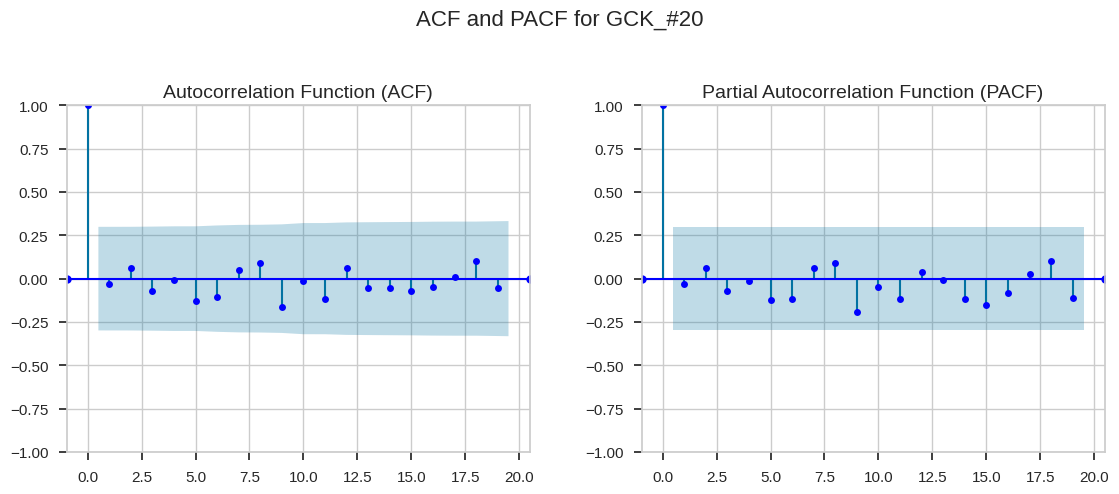

In [ ]:
acf_pacf(df_reset, 'GCK_#20')

##### 'GCK_#3'

In [ ]:
#sta_verif(df_reset, 'GCK_#3')

In [ ]:
#acf_pacf(df_reset, 'GCK_#3')

##### 'GCK_#36'

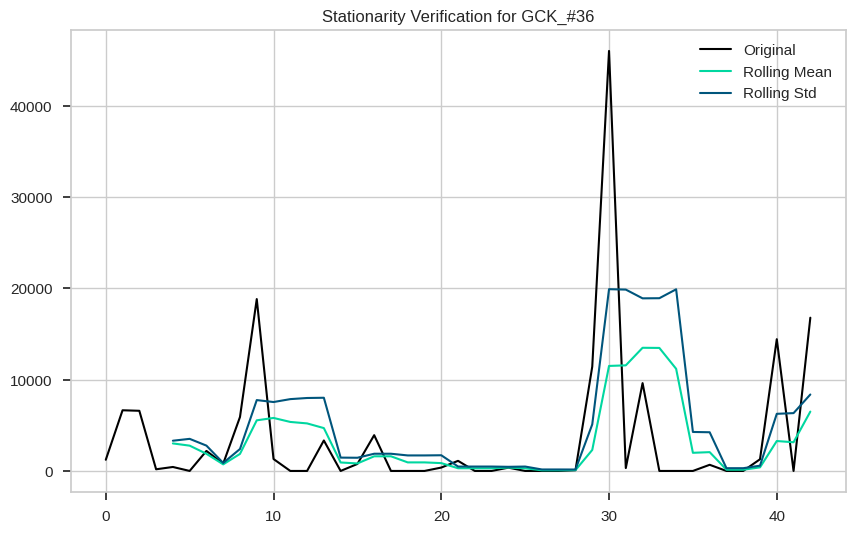

Results of Dickey Fuller Test:
Test Statistic                 -5.545019
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#36')

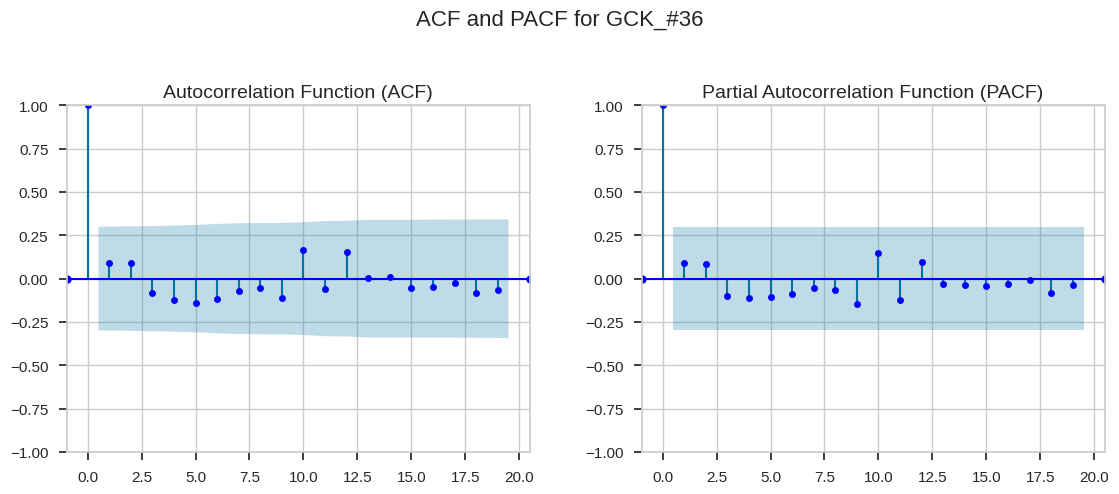

In [ ]:
acf_pacf(df_reset, 'GCK_#36')

##### 'GCK_#4'

In [ ]:
#sta_verif(df_reset, 'GCK_#4')

In [ ]:
#acf_pacf(df_reset, 'GCK_#4')

##### 'GCK_#5'

In [ ]:
#sta_verif(df_reset, 'GCK_#5')

In [ ]:
#acf_pacf(df_reset, 'GCK_#5')

##### 'GCK_#6'

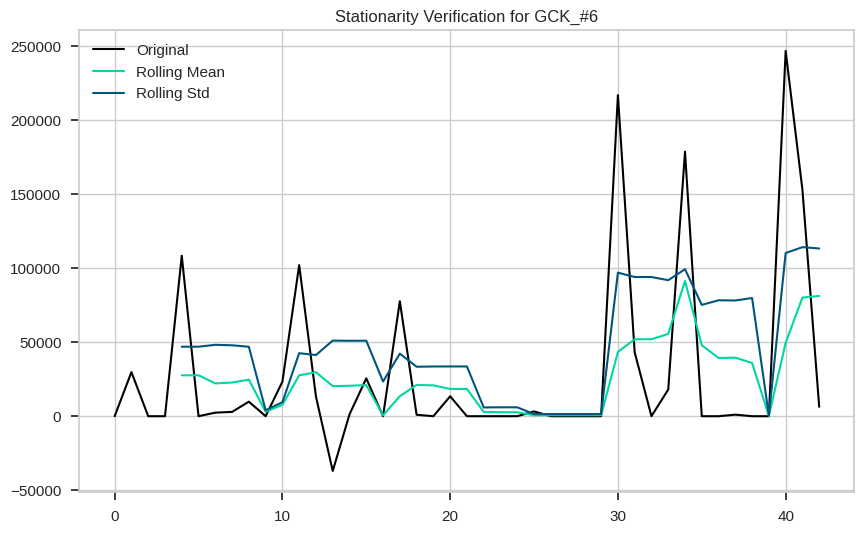

Results of Dickey Fuller Test:
Test Statistic                 -1.345028
p-value                         0.608329
#Lags Used                      5.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#6')

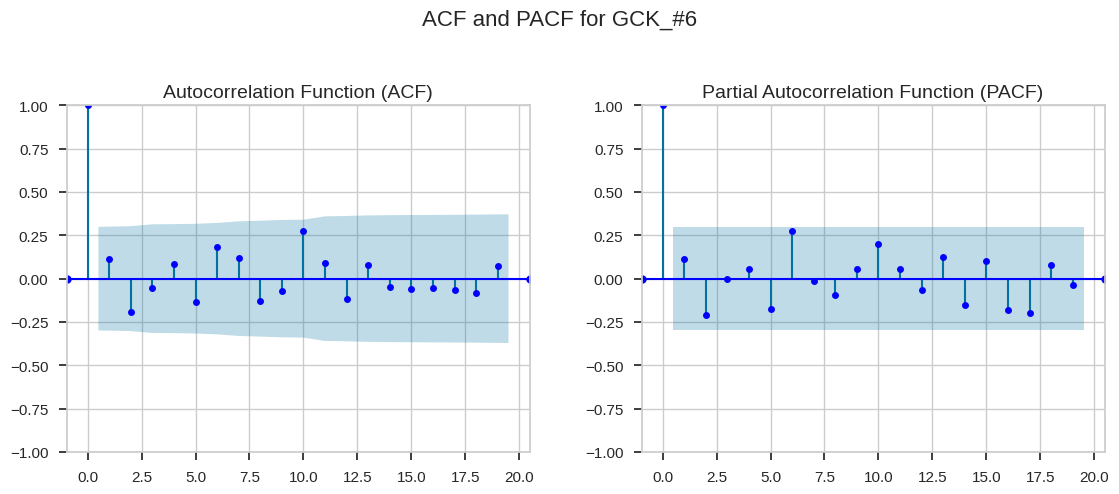

In [ ]:
acf_pacf(df_reset, 'GCK_#6')

##### 'GCK_#8'

In [ ]:
#sta_verif(df_reset, 'GCK_#8')

In [ ]:
#acf_pacf(df_reset, 'GCK_#8')

##### 'GCK_#9'

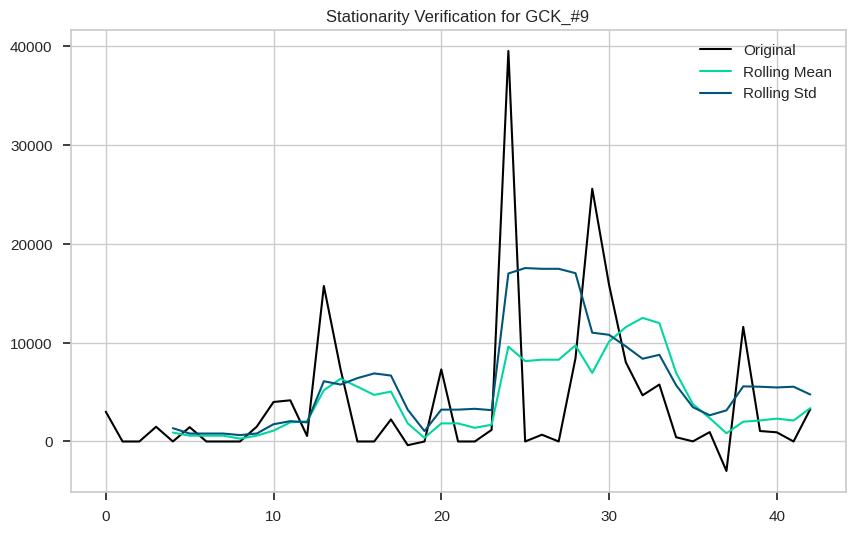

Results of Dickey Fuller Test:
Test Statistic                 -5.623904
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [ ]:
sta_verif(df_reset, 'GCK_#9')

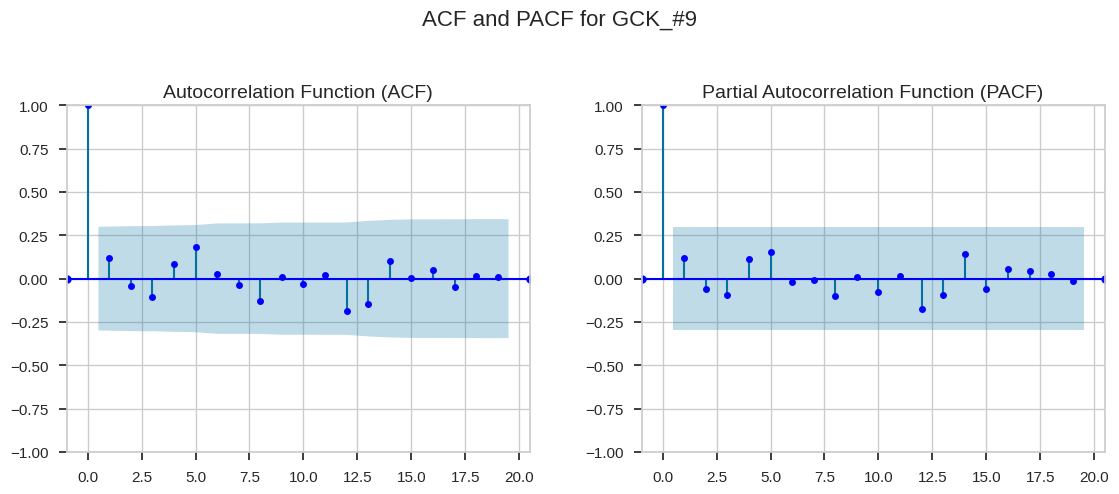

In [ ]:
acf_pacf(df_reset, 'GCK_#9')

##Feature Engineering


###Market Data Feature Engineering


####Market Data Lagged features

In [ ]:
lag_months_min = 10
lag_months_max = 18

# Adjust the function call to match the optimized function's parameters
ds_lagged = series_to_supervised(data=ds,
                                          start_lag=lag_months_min,
                                          end_lag=lag_months_max,
                                          forecast_horizon=0,
                                          drop_nan=False,  # Consider changing based on how you want to handle NaNs
                                          variable_names=ds.columns.tolist())

# After transformation, if you need to drop NaN values
ds_lagged.dropna(inplace=True)

# If ds.index is a DatetimeIndex and you want to align it with dsa_lagged
# Ensure alignment between indices, especially if dropping NaNs
# This code assumes ds.index has the same or compatible index as ds_lagged after transformation
if len(ds_lagged) <= len(ds.index):
   ds_lagged.index = ds.index[:len(ds_lagged)]

ds_lagged.head()


China-Production Index Machinery & Electricals(t-18)  \
ds                                                                 
2004-02-01                                          16.281313      
2004-03-01                                          19.353556      
2004-04-01                                          71.889472      
2004-05-01                                          53.404064      
2004-06-01                                          60.181031      

            France-Production Index Machinery & Electricals(t-18)  \
ds                                                                  
2004-02-01                                         111.261257       
2004-03-01                                         115.946706       
2004-04-01                                         133.117844       
2004-05-01                                         117.002619       
2004-06-01                                         113.533546       

            France-Shipments Index Machinery & Electricals(t-18)  \
ds                                                                 
2004-02-01                                          96.109763      
2004-03-01                                          97.893267      
2004-04-01                                         116.079837      
2004-05-01                                         101.551078      
2004-06-01                                          97.839145      

            Germany-Production Index Machinery & Electricals(t-18)  \
ds                                                                   
2004-02-01                                          89.239552        
2004-03-01                                          95.757750        
2004-04-01                                         110.770265        
2004-05-01                                          96.727931        
2004-06-01                                         100.452235        

            Japan-Production Index Machinery & Electricals(t-18)  \
ds                                                                 
2004-02-01                                         104.973594      
2004-03-01                                         112.084831      
2004-04-01                                         137.753319      
2004-05-01                                         105.314064      
2004-06-01                                         103.957334      

            Switzerland-Production Index Machinery & Electricals(t-18)  \
ds                                                                       
2004-02-01                                         101.643522            
2004-03-01                                          99.213888            
2004-04-01                                          94.458034            
2004-05-01                                          95.496227            
2004-06-01                                          96.517609            

            United States-Production Index Machinery & Electricals(t-18)  \
ds                                                                         
2004-02-01                                         110.987272              
2004-03-01                                         112.987553              
2004-04-01                                         115.252169              
2004-05-01                                         113.966019              
2004-06-01                                         112.900234              

            Europe-World: Price of Base Metals(t-18)  \
ds                                                     
2004-02-01                                 87.719623   
2004-03-01                                 88.188073   
2004-04-01                                 90.263773   
2004-05-01                                 92.213870   
2004-06-01                                 89.170327   

            Europe-World: Price of Energy(t-18)  \
ds                                                
2004-02-01                            87.285151   
2004-03-

####Market Data external knowledge features

In [ ]:
# Define the start date of the COVID-19 impact period
covid_start = '2020-03-01'

# Since our dataset might not extend beyond a certain point, optionally define an end date
# If our dataset goes into 2021 or later, adjust this end date accordingly
covid_end = '2021-12-31'  # Adjust based on our dataset's range and the analysis scope

# Create a binary column 'covid_impact' to indicate the impact period of the COVID-19 pandemic
ds['covid_impact'] = ((ds.index >= covid_start) & (ds.index <= covid_end)).astype(int)

ds.tail()


China-Production Index Machinery & Electricals  \
ds                                                           
2021-12-01                                      290.548981   
2022-01-01                                      241.819159   
2022-02-01                                      243.327239   
2022-03-01                                      291.610413   
2022-04-01                                      276.887612   

            France-Production Index Machinery & Electricals  \
ds                                                            
2021-12-01                                        95.165288   
2022-01-01                                        80.382613   
2022-02-01                                        85.011232   
2022-03-01                                       102.637193   
2022-04-01                                        86.547516   

            France-Shipments Index Machinery & Electricals  \
ds                                                           
2021-12-01                                      121.295986   
2022-01-01                                      104.838134   
2022-02-01                                      107.544890   
2022-03-01                                      124.431935   
2022-04-01                                      109.594042   

            Germany-Production Index Machinery & Electricals  \
ds                                                             
2021-12-01                                        116.245895   
2022-01-01                                         94.758157   
2022-02-01                                        100.937292   
2022-03-01                                        116.518524   
2022-04-01                                        102.779571   

            Japan-Production Index Machinery & Electricals  \
ds                                                           
2021-12-01                                      120.914594   
2022-01-01                                      107.584425   
2022-02-01                                      115.125052   
2022-03-01                                      142.283902   
2022-04-01                                      109.891651   

            Switzerland-Production Index Machinery & Electricals  \
ds                                                                 
2021-12-01                                         102.600754      
2022-01-01                                          99.154827      
2022-02-01                                          95.977375      
2022-03-01                                          92.430835      
2022-04-01                                          92.504638      

            United States-Production Index Machinery & Electricals  \
ds                                                                   
2021-12-01                                         103.300917        
2022-01-01                                         105.829674        
2022-02-01                                         107.990275        
2022-03-01                                         110.541002        
2022-04-01                                         108.951892        

            Europe-World: Price of Base Metals  Europe-World: Price of Energy  \
ds                                                                              
2021-12-01                           97.804116                      72.357323   
2022-01-01                           99.404798                      72.922817   
2022-02-01                          100.184161                      73.605712   
2022-03-01                          101.579982                      75.834156   
2022-04-01                          103.477563                      77.038799   

            Europe-World: Price of Natural gas index  \
ds                                                     
2021-12-01                                109.964865   
2022-01-01                                106.094135   
2022-02-01                                103.194073   


###Sales Data Feature Engineering


####Sales Data Lagged features

In [ ]:
max_lag = 8  # Maximum lag of 8 months

# Create lagged features for 'msc' without dropping NaN values
msc_lagged = series_to_supervised(data=msc,
                                  start_lag=1,
                                  end_lag=max_lag,
                                  forecast_horizon=1,
                                  drop_nan=False,  # Keep NaNs for flexibility
                                  variable_names=msc.columns.tolist())

# If 'series_to_supervised' doesn't preserve the index from 'msc', align it post-creation
# This line might be unnecessary if 'series_to_supervised' already handles the index correctly
msc_lagged.index = msc.index[:len(msc_lagged)]

# Display the first few rows to check the transformed DataFrame
msc_lagged.head(10)


GCK_#1(t-8)  GCK_#11(t-8)  GCK_#12(t-8)  GCK_#13(t-8)  \
DATE                                                                
2018-10-01          NaN           NaN           NaN           NaN   
2018-11-01          NaN           NaN           NaN           NaN   
2018-12-01          NaN           NaN           NaN           NaN   
2019-01-01          NaN           NaN           NaN           NaN   
2019-02-01          NaN           NaN           NaN           NaN   
2019-03-01          NaN           NaN           NaN           NaN   
2019-04-01          NaN           NaN           NaN           NaN   
2019-05-01          NaN           NaN           NaN           NaN   
2019-06-01          0.0      340091.0           0.0           0.0   
2019-07-01          0.0     1195336.0        1070.0       43677.0   

            GCK_#14(t-8)  GCK_#16(t-8)  GCK_#20(t-8)  GCK_#3(t-8)  \
DATE                                                                
2018-10-01           NaN           NaN           NaN          NaN   
2018-11-01           NaN           NaN           NaN          NaN   
2018-12-01           NaN           NaN           NaN          NaN   
2019-01-01           NaN           NaN           NaN          NaN   
2019-02-01           NaN           NaN           NaN          NaN   
2019-03-01           NaN           NaN           NaN          NaN   
2019-04-01           NaN           NaN           NaN          NaN   
2019-05-01           NaN           NaN           NaN          NaN   
2019-06-01        5770.0      205995.0         348.0      23680.0   
2019-07-01       17130.0      828478.0           0.0      -6580.0   

            GCK_#36(t-8)  GCK_#4(t-8)  ...  GCK_#14(t)  GCK_#16(t)  \
DATE                                   ...                           
2018-10-01           NaN          NaN  ...      5770.0    205995.0   
2018-11-01           NaN          NaN  ...     17130.0    828478.0   
2018-12-01           NaN          NaN  ...         0.0     38028.0   
2019-01-01           NaN          NaN  ...         0.0    134946.0   
2019-02-01           NaN          NaN  ...         0.0     50944.0   
2019-03-01           NaN          NaN  ...         0.0     10436.0   
2019-04-01           NaN          NaN  ...         0.0    174606.0   
2019-05-01           NaN          NaN  ...     17820.0    265209.0   
2019-06-01        1224.0          0.0  ...     59454.0    177801.0   
2019-07-01        6650.0          0.0  ...      2820.0    163198.0   

            GCK_#20(t)  GCK_#3(t)  GCK_#36(t)  GCK_#4(t)  GCK_#5(t)  \
DATE                                                                  
2018-10-01       348.0    23680.0      1224.0        0.0        0.0   
2018-11-01         0.0    -6580.0      6650.0        0.0        0.0   
2018-12-01       503.0        0.0      6593.0        0.0        0.0   
2019-01-01       120.0        0.0       182.0        0.0        0.0   
2019-02-01       259.0        0.0       435.0        0.0        0.0   
2019-03-01      3222.0        0.0         0.0        0.0        0.0   
2019-04-01       527.0     6204.0      2193.0        0.0        0.0   
2019-05-01       944.0        0.0       800.0        0.0    10684.0   
2019-06-01       471.0        0.0      5911.0        0.0        0.0   
2019-07-01         0.0        0.0     18837.0        0.0        0.0   

            GCK_#6(t)  GCK_#8(t)  GCK_#9(t)  
DATE                                         
2018-10-01        0.0        0.0     3016.0  
2018-11-01    29807.0     -500.0        0.0  
2018-12-01        0.0        0.0        0.0  
2019-01-01        0.0        0.0     1487.0  
2019-02-01   108440.0        0.0        0.0  
2019-03-01        0.0    -1000.0     1450.0  
2019-04-01     2407.0        0.0        0.0  
2019-05-01     2906.0        0.0        0.0  
2019-06-01     9824.0        0.0        0.0  
2019-07-01        0.0        0.0     1500.0  

[10 rows x 126 columns]

In [ ]:
# Example for a single lagged feature
#msc_lagged['GCK_#11(t-8)_present'] = msc_lagged['GCK_#11(t-8)'].notna().astype(int)

In [ ]:
type(b)

pandas.core.frame.DataFrame

In [ ]:
b.columns

Index(['China-Production Index Machinery & Electricals',
       'China-Shipments Index Machinery & Electricals',
       'France-Production Index Machinery & Electricals',
       'France-Shipments Index Machinery & Electricals',
       'Germany-Production Index Machinery & Electricals',
       'Germany-Shipments Index Machinery & Electricals',
       'Italy-Production Index Machinery & Electricals',
       'Italy-Shipments Index Machinery & Electricals',
       'Japan-Production Index Machinery & Electricals',
       'Japan-Shipments Index Machinery & Electricals',
       'Switzerland-Production Index Machinery & Electricals',
       'Switzerland-Shipments Index Machinery & Electricals',
       'United Kingdom-Production Index Machinery & Electricals',
       'United Kingdom-Shipments Index Machinery & Electricals',
       'United States-Production Index Machinery & Electricals',
       'United States-Shipments Index Machinery & Electricals',
       'Europe-Production Index Machinery & 

In [ ]:
sales.columns


Index(['DATE', 'Mapped_GCK', 'Sales_EUR'], dtype='object')

##Feature Selection

###Final Feature Selection (Dataset Preparations)

In [ ]:
products_dict = {}

#We decided to go with kendall tau correlation coefficient over Pearson or Spearman because low number of observations and relaiability

# Loop over each product in 'msc' DataFrame
for product in msc.columns:
    # Joining 'msc' with 'ds_lagged' (assumed market_data_lagged is ds after creating lagged features)
    dataframe_to_correlate = msc[[product]].join(ds, how="left")

    # Calculate the Kendall correlation between 'product' and all other columns
    correlations = dataframe_to_correlate.corr(method="kendall")[product].drop(product)

    # Select the top 20 columns with the highest correlation
    top_corr_columns = correlations.abs().sort_values(ascending=False).head(20).index.tolist()

    # Calculate correlation matrix for the top correlated columns to identify redundancy
    corr_matrix = dataframe_to_correlate[top_corr_columns].corr(method="kendall")

    # Identify columns to remove based on high correlation
    columns_to_remove = set()
    for col in top_corr_columns:
        highly_correlated = corr_matrix.index[corr_matrix[col] > 0.8].tolist()
        highly_correlated.remove(col)  # Exclude the column itself
        columns_to_remove.update(highly_correlated)

    # Filter out the highly correlated columns
    top_corr_columns = [col for col in top_corr_columns if col not in columns_to_remove][:5]

    # Join the original 'msc' data for the product with the top correlated columns from 'ds'
    products_dict[product] = msc[[product]].join(ds[top_corr_columns], how="left")



In [ ]:
# Prepare the final datasets for each product
products_dict_final = {}
for product in products_dict.keys():
    # Assuming 'msc_lagged' is your DataFrame with lagged sales data for 'msc'
    msc_lagged_product = msc_lagged.filter(regex=f"{product}\(")

    # Right join to keep all rows from msc_lagged_product and only add columns from products_dict
    final_df = msc_lagged_product.join(products_dict[product], how="right").drop(columns=[product], errors='ignore')

    products_dict_final[product] = final_df

Processing: GCK_#1
Mean CV Score for GCK_#1: -3453.8888577178486


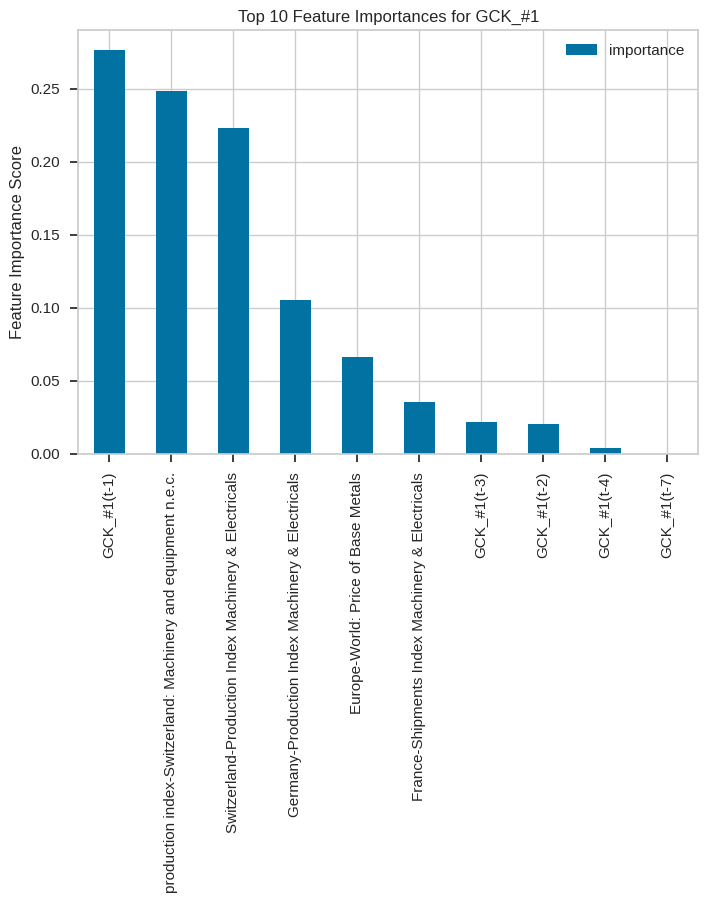

Processing: GCK_#11
Mean CV Score for GCK_#11: -740871.5616530277


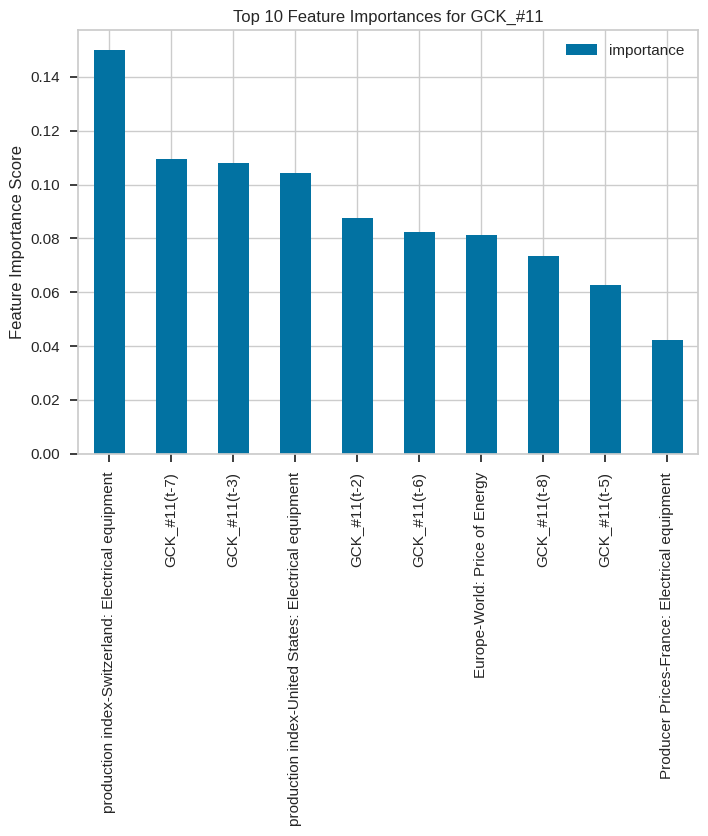

Processing: GCK_#12
Mean CV Score for GCK_#12: -69062.78500170182


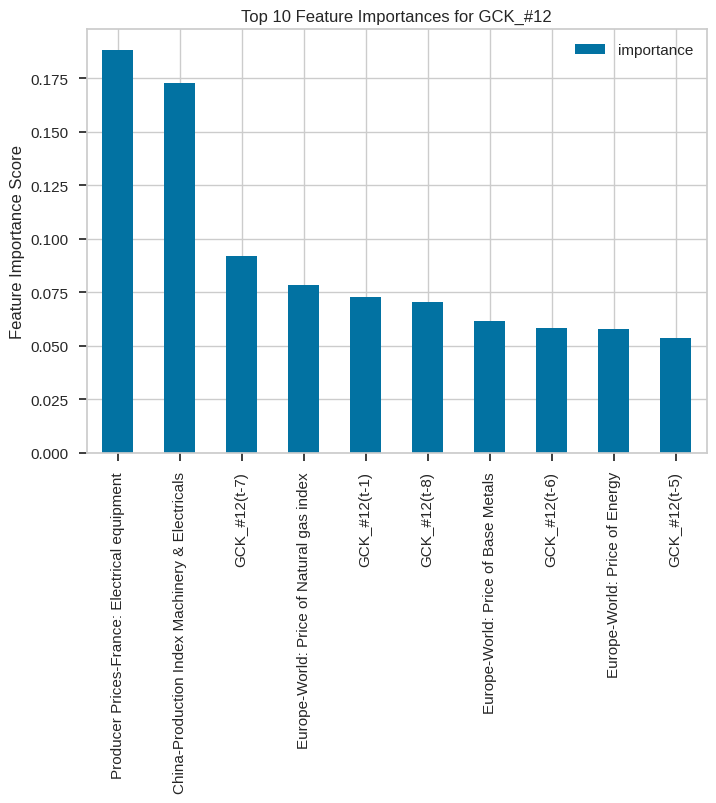

Processing: GCK_#13
Mean CV Score for GCK_#13: -8738.28214059414


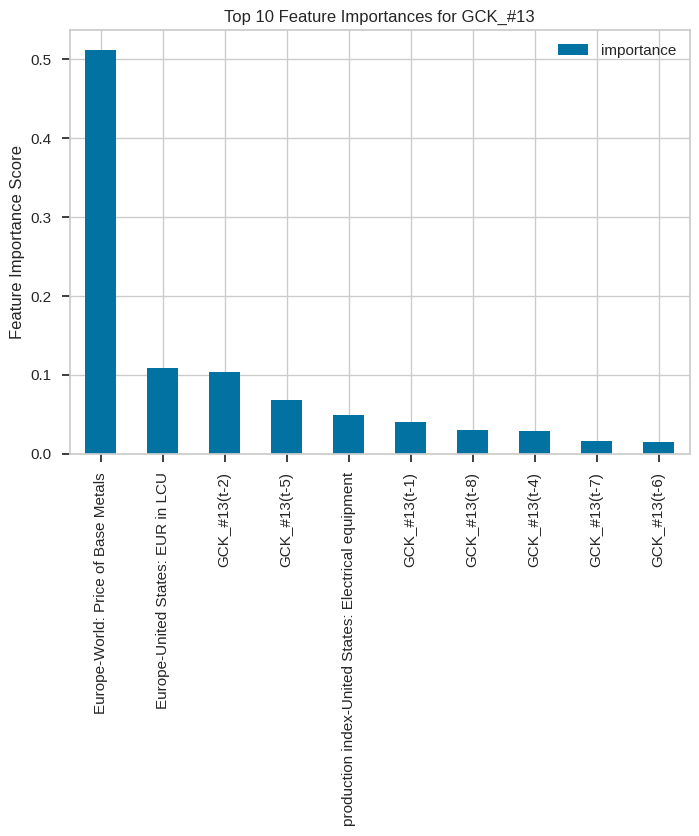

Processing: GCK_#14
Mean CV Score for GCK_#14: -7465.9036178209035


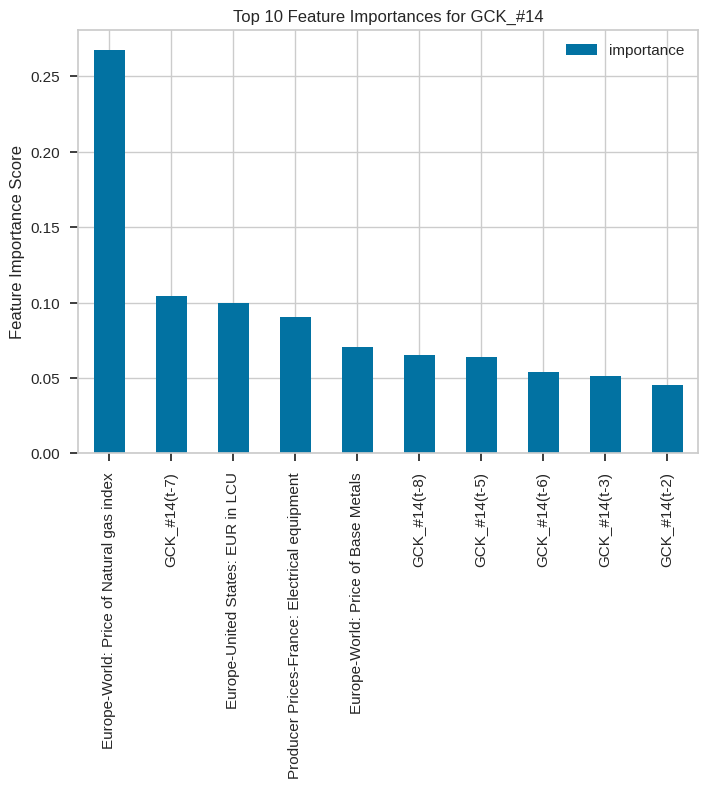

Processing: GCK_#16
Mean CV Score for GCK_#16: -127859.36564879931


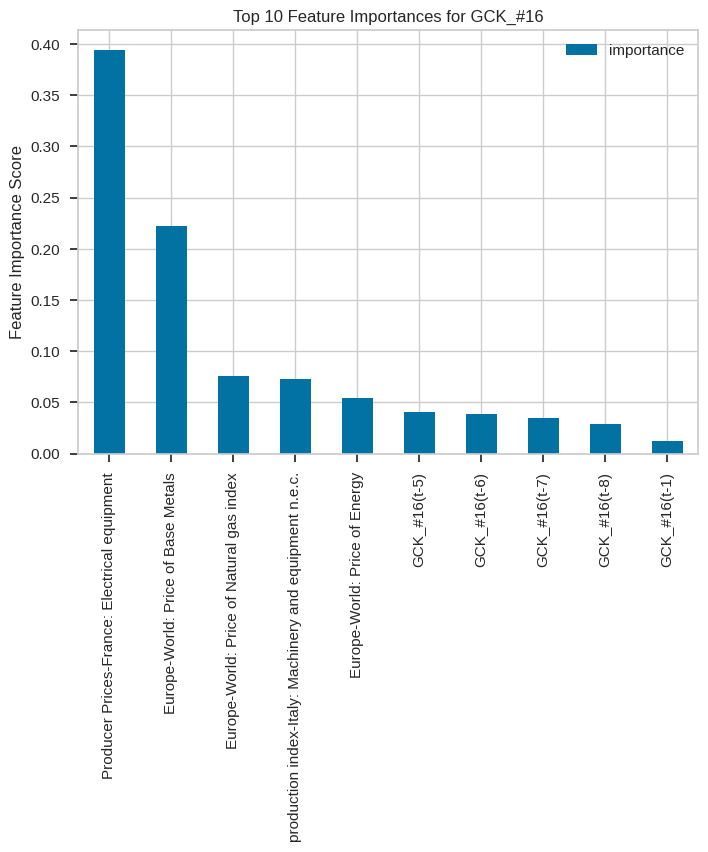

Processing: GCK_#20
Mean CV Score for GCK_#20: -1600.7966869887011


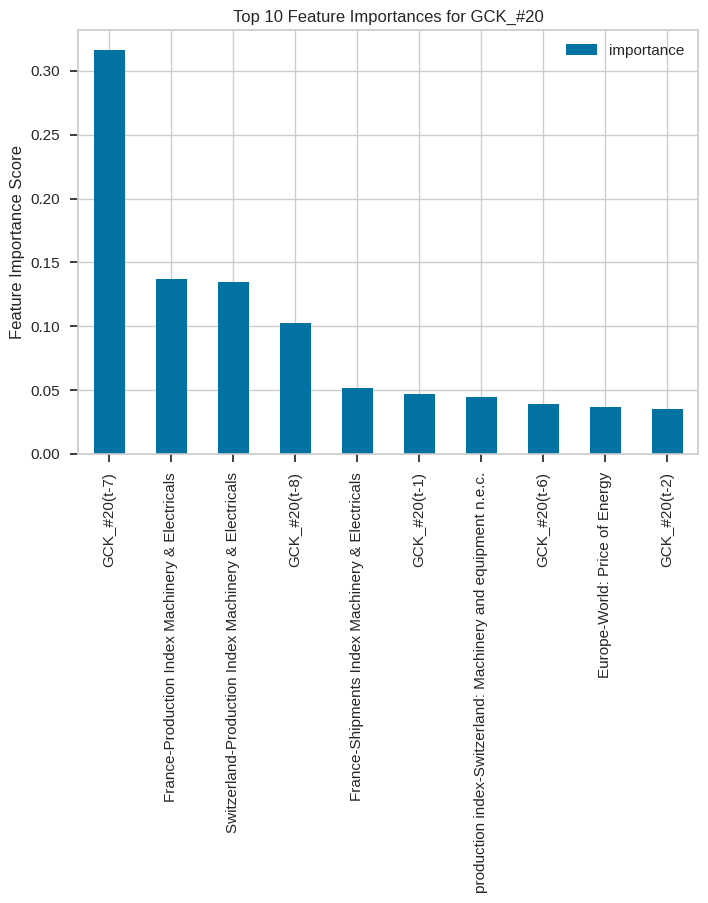

Processing: GCK_#3
Mean CV Score for GCK_#3: -789339.7665650278


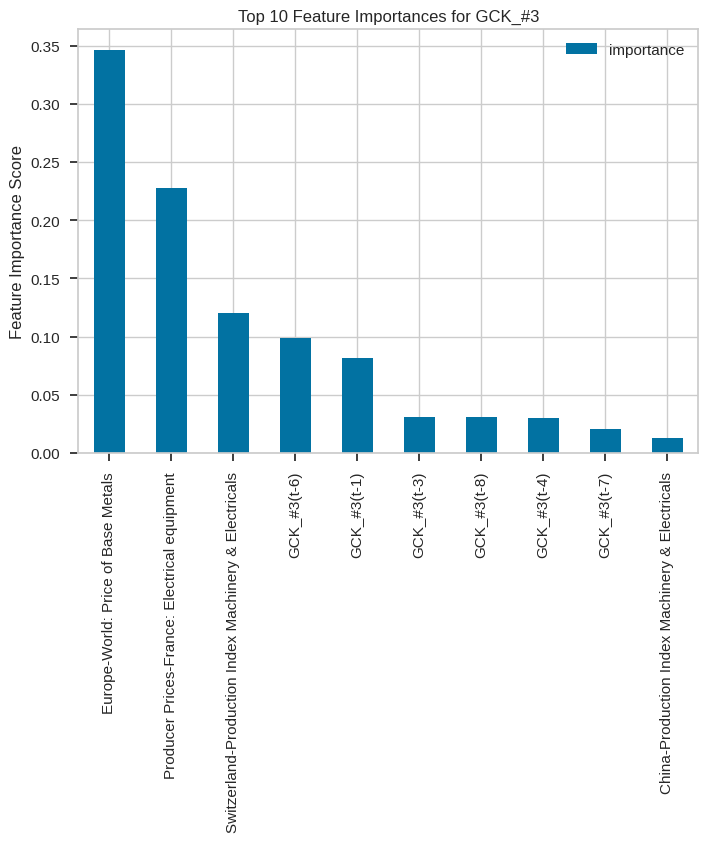

Processing: GCK_#36
Mean CV Score for GCK_#36: -10458.684665532075


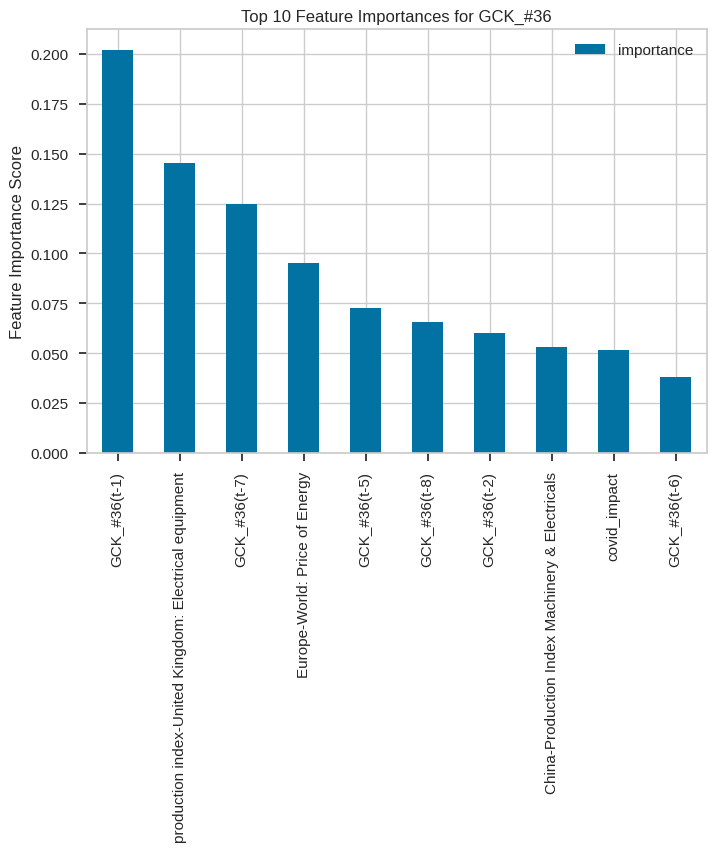

Processing: GCK_#4
Mean CV Score for GCK_#4: -195.76526014820345


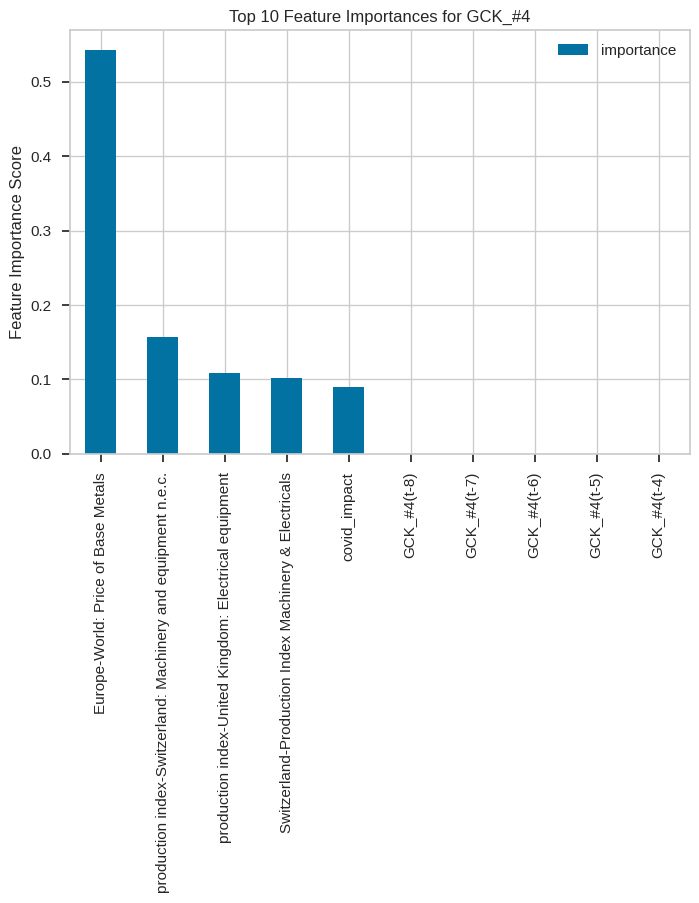

Processing: GCK_#5
Mean CV Score for GCK_#5: -558554.3849551112


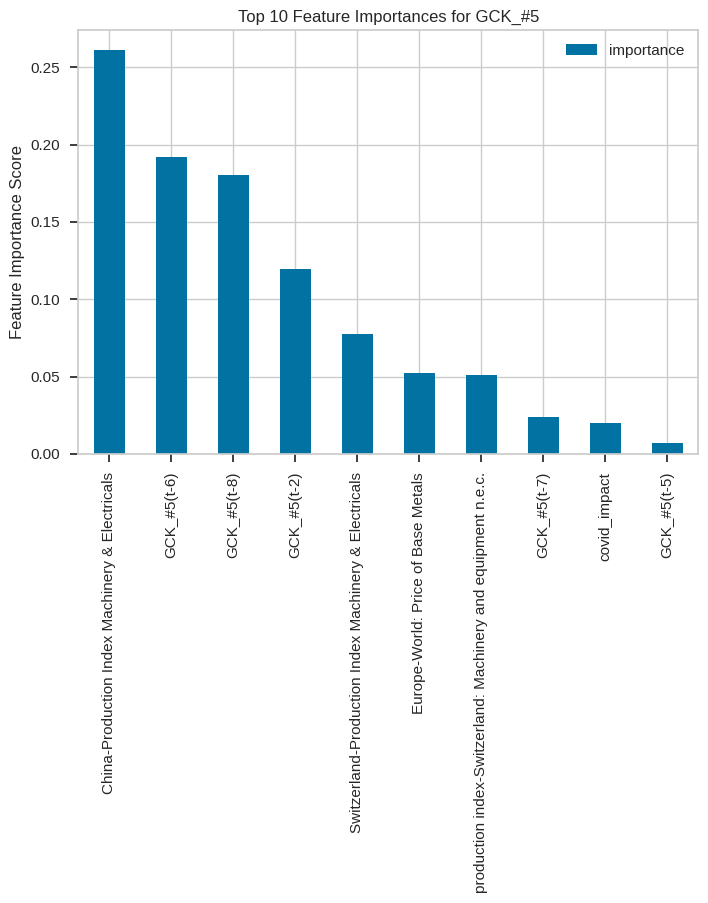

Processing: GCK_#6
Mean CV Score for GCK_#6: -63941.22859782972


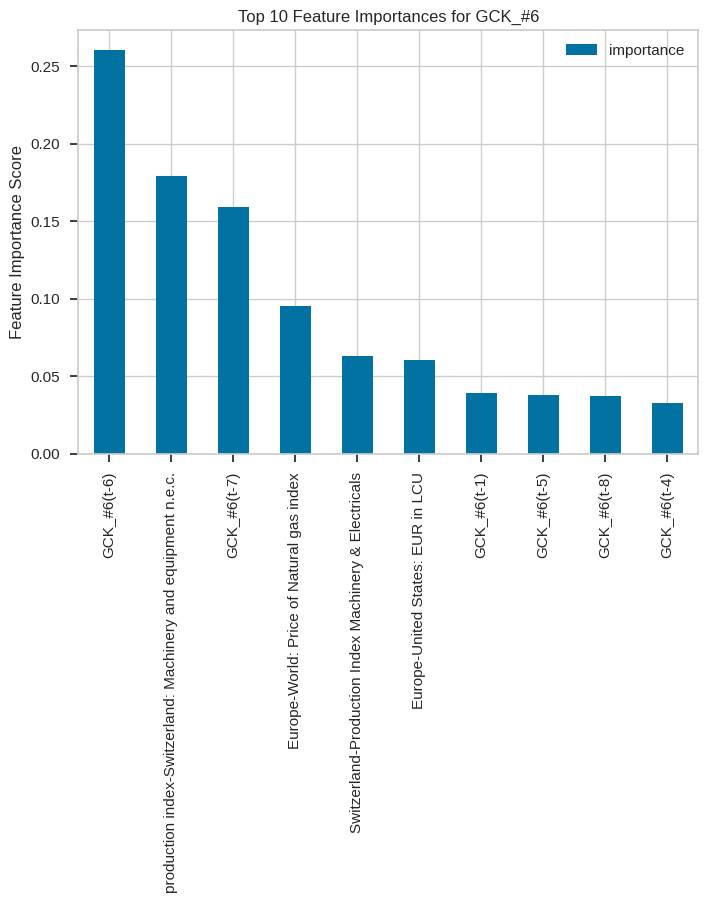

Processing: GCK_#8
Mean CV Score for GCK_#8: -2881.0634387892305


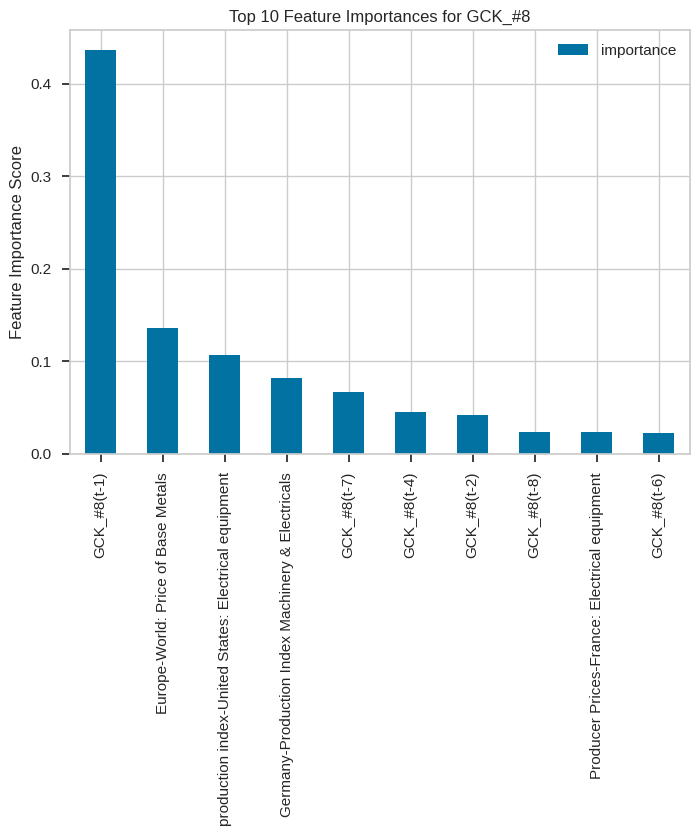

Processing: GCK_#9
Mean CV Score for GCK_#9: -5809.212476131953


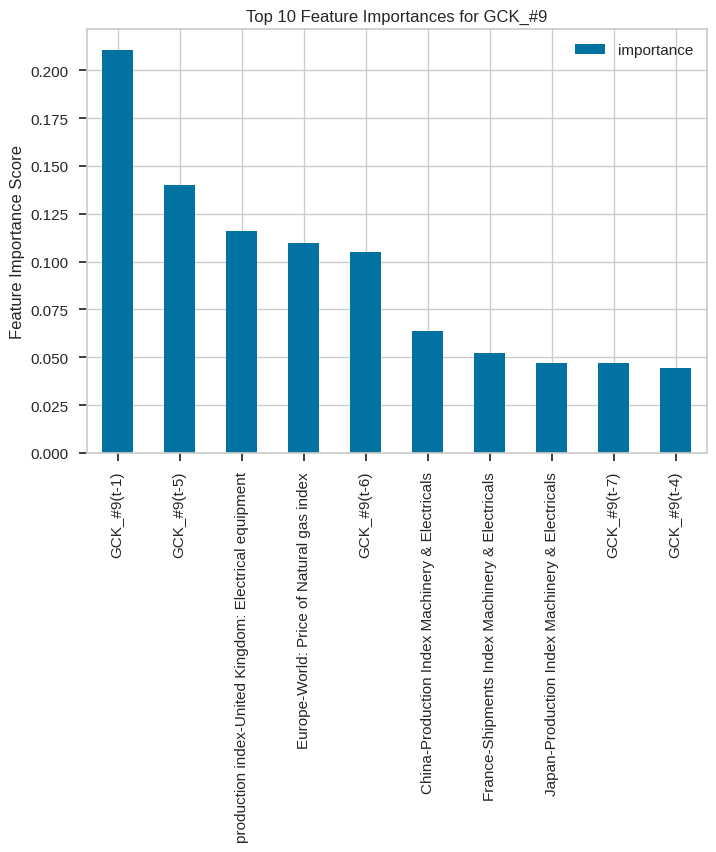

Results for GCK_#1:
Mean CV Score: -3453.8888577178486
Top 5 Features:
['GCK_#1(t-1)', 'production index-Switzerland: Machinery and equipment n.e.c.', 'Switzerland-Production Index Machinery & Electricals', 'Germany-Production Index Machinery & Electricals', 'Europe-World: Price of Base Metals']


In [ ]:
# Placeholder dictionary to store enhanced results
products_dict_enhanced = {}

for product, df in products_dict_final.items():
    print(f"Processing: {product}")

    # Preparing features (X) and target (y)
    # Assume 'msc' is your original DataFrame and it contains the target variable for each product
    y = msc[product].dropna()  # Target
    X = df.loc[y.index].drop((product+'(t)'),axis=1)  # Aligning feature set with available target data

    # Splitting the data into training and testing sets for initial evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Initialize the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    mean_cv_score = np.mean(cv_scores)

    print(f"Mean CV Score for {product}: {mean_cv_score}")

    # Train the model on the full dataset to assess feature importance
    model.fit(X_train, y_train)

    # Extracting feature importance and sorting them
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

    # Storing the processed data and feature importances in the enhanced dictionary
    products_dict_enhanced[product] = {
        'cv_score': mean_cv_score,
        'feature_importances': feature_importances,
        'top_features': feature_importances.head().index.tolist()  # Top 5 features
    }

    # Plotting feature importances for visualization
    feature_importances.head(10).plot(kind='bar', title=f'Top 10 Feature Importances for {product}')
    plt.ylabel('Feature Importance Score')
    plt.show()

# Example: Review enhanced results for a specific product
product_name = list(products_dict_final.keys())[0]  # Replace with actual product name as needed
print(f"Results for {product_name}:")
print(f"Mean CV Score: {products_dict_enhanced[product_name]['cv_score']}")
print("Top 5 Features:")
print(products_dict_enhanced[product_name]['top_features'])


In [ ]:
products_dict_final[product].head()

GCK_#9(t-8)  GCK_#9(t-7)  GCK_#9(t-6)  GCK_#9(t-5)  GCK_#9(t-4)  \
DATE                                                                          
2018-10-01          NaN          NaN          NaN          NaN          NaN   
2018-11-01          NaN          NaN          NaN          NaN          NaN   
2018-12-01          NaN          NaN          NaN          NaN          NaN   
2019-01-01          NaN          NaN          NaN          NaN          NaN   
2019-02-01          NaN          NaN          NaN          NaN       3016.0   

            GCK_#9(t-3)  GCK_#9(t-2)  GCK_#9(t-1)  GCK_#9(t)  \
DATE                                                           
2018-10-01          NaN          NaN          NaN     3016.0   
2018-11-01          NaN          NaN       3016.0        0.0   
2018-12-01          NaN       3016.0          0.0        0.0   
2019-01-01       3016.0          0.0          0.0     1487.0   
2019-02-01          0.0          0.0       1487.0        0.0   

            France-Shipments Index Machinery & Electricals  \
DATE                                                         
2018-10-01                                      116.319055   
2018-11-01                                      108.502814   
2018-12-01                                      117.720301   
2019-01-01                                      102.223526   
2019-02-01                                      103.872159   

            China-Production Index Machinery & Electricals  \
DATE                                                         
2018-10-01                                      218.928839   
2018-11-01                                      226.534488   
2018-12-01                                      239.137016   
2019-01-01                                      186.722180   
2019-02-01                                      190.160436   

            Europe-World: Price of Natural gas index  \
DATE                                                   
2018-10-01                                 90.181269   
2018-11-01                                 89.997934   
2018-12-01                                 93.810204   
2019-01-01                                 89.561974   
2019-02-01                                 84.169544   

            Japan-Production Index Machinery & Electricals  \
DATE                                                         
2018-10-01                                      110.317956   
2018-11-01                                      112.350486   
2018-12-01                                      117.773258   
2019-01-01                                      104.604442   
2019-02-01                                      112.088498   

            production index-United Kingdom: Electrical equipment  
DATE                                                               
2018-10-01                                         118.577714      
2018-11-01                                         121.537545      
2018-12-01                                         105.536526      
2019-01-01                                         104.020731      
2019-02-01                                         108.198656

In [ ]:
products_dict_final[product]

GCK_#9(t-8)  GCK_#9(t-7)  GCK_#9(t-6)  GCK_#9(t-5)  GCK_#9(t-4)  \
DATE                                                                          
2018-10-01          NaN          NaN          NaN          NaN          NaN   
2018-11-01          NaN          NaN          NaN          NaN          NaN   
2018-12-01          NaN          NaN          NaN          NaN          NaN   
2019-01-01          NaN          NaN          NaN          NaN          NaN   
2019-02-01          NaN          NaN          NaN          NaN       3016.0   
2019-03-01          NaN          NaN          NaN       3016.0          0.0   
2019-04-01          NaN          NaN       3016.0          0.0          0.0   
2019-05-01          NaN       3016.0          0.0          0.0       1487.0   
2019-06-01       3016.0          0.0          0.0       1487.0          0.0   
2019-07-01          0.0          0.0       1487.0          0.0       1450.0   
2019-08-01          0.0       1487.0          0.0       1450.0          0.0   
2019-09-01       1487.0          0.0       1450.0          0.0          0.0   
2019-10-01          0.0       1450.0          0.0          0.0          0.0   
2019-11-01       1450.0          0.0          0.0          0.0       1500.0   
2019-12-01          0.0          0.0          0.0       1500.0       4000.0   
2020-01-01          0.0          0.0       1500.0       4000.0       4169.0   
2020-02-01          0.0       1500.0       4000.0       4169.0        555.0   
2020-03-01       1500.0       4000.0       4169.0        555.0      15744.0   
2020-04-01       4000.0       4169.0        555.0      15744.0       7286.0   
2020-05-01       4169.0        555.0      15744.0       7286.0          0.0   
2020-06-01        555.0      15744.0       7286.0          0.0          0.0   
2020-07-01      15744.0       7286.0          0.0          0.0       2233.0   
2020-08-01       7286.0          0.0          0.0       2233.0       -375.0   
2020-09-01          0.0          0.0       2233.0       -375.0          0.0   
2020-10-01          0.0       2233.0       -375.0          0.0       7295.0   
2020-11-01       2233.0       -375.0          0.0       7295.0          0.0   
2020-12-01       -375.0          0.0       7295.0          0.0          0.0   
2021-01-01          0.0       7295.0          0.0          0.0       1175.0   
2021-02-01       7295.0          0.0          0.0       1175.0      39546.0   
2021-03-01          0.0          0.0       1175.0      39546.0          0.0   
2021-04-01          0.0       1175.0      39546.0          0.0        684.0   
2021-05-01       1175.0      39546.0          0.0        684.0          0.0   
2021-06-01      39546.0          0.0        684.0          0.0       8420.0   
2021-07-01          0.0        684.0          0.0       8420.0      25592.0   
2021-08-01        684.0          0.0       8420.0      25592.0      15875.0   
2021-09-01          0.0       8420.0      25592.0      15875.0       8026.0   
2021-10-01       8420.0      25592.0      15875.0       8026.0       4675.0   
2021-11-01      25592.0      15875.0       8026.0       4675.0       5766.0   
2021-12-01      15875.0       8026.0       4675.0       5766.0        432.0   
2022-01-01       8026.0       4675.0       5766.0        432.0         12.0   
2022-02-01       4675.0       5766.0        432.0         12.0        950.0   
2022-03-01       5766.0        432.0         12.0        950.0      -2983.0   
2022-04-01        432.0         12.0        950.0      -2983.0      11605.0   

            GCK_#9(t-3)  GCK_#9(t-2)  GCK_#9(t-1)  GCK_#9(t)  \
DATE                                                           
2018-10-01          NaN          NaN          NaN     3016.0   
2018-11-01          NaN          NaN       3016.0        0.0   
2018-12-01          NaN       3016.0          0.0        0.0   
2019-01-01       3016.0          0.0          0.0     1487.0   
2019-02-01          0.0          0.0       1487.0        0.0   
2019-03-

## Modeling


In [ ]:
#Create final datasets for modeling; contains top 5 features for each product
df_fin= {}
for product in products_dict_final.keys():
 df_fin[product]=products_dict_final[product][products_dict_enhanced[product]['top_features']]
 df_fin[product][product+'(t)']=products_dict_final[product][product+'(t)']
df_fin['GCK_#1']

GCK_#1(t-1)  \
DATE                      
2018-10-01          NaN   
2018-11-01          0.0   
2018-12-01          0.0   
2019-01-01          0.0   
2019-02-01          0.0   
2019-03-01          0.0   
2019-04-01          0.0   
2019-05-01          0.0   
2019-06-01          0.0   
2019-07-01          0.0   
2019-08-01          0.0   
2019-09-01          0.0   
2019-10-01          0.0   
2019-11-01          0.0   
2019-12-01       -769.0   
2020-01-01     -17800.0   
2020-02-01          0.0   
2020-03-01          0.0   
2020-04-01          0.0   
2020-05-01          0.0   
2020-06-01          0.0   
2020-07-01          0.0   
2020-08-01          0.0   
2020-09-01          0.0   
2020-10-01          0.0   
2020-11-01          0.0   
2020-12-01          0.0   
2021-01-01       -455.0   
2021-02-01        455.0   
2021-03-01          0.0   
2021-04-01          0.0   
2021-05-01          0.0   
2021-06-01          0.0   
2021-07-01          0.0   
2021-08-01          0.0   
2021-09-01          0.0   
2021-10-01          0.0   
2021-11-01          0.0   
2021-12-01          0.0   
2022-01-01          0.0   
2022-02-01          0.0   
2022-03-01          0.0   
2022-04-01          0.0   

            production index-Switzerland: Machinery and equipment n.e.c.  \
DATE                                                                       
2018-10-01                                          96.533457              
2018-11-01                                         101.418274              
2018-12-01                                         106.388274              
2019-01-01                                         100.343579              
2019-02-01                                          94.038123              
2019-03-01                                          86.491707              
2019-04-01                                          89.083608              
2019-05-01                                          92.244744              
2019-06-01                                          95.113072              
2019-07-01                                          93.676732              
2019-08-01                                          92.294052              
2019-09-01                                          90.722494              
2019-10-01                                          95.707309              
2019-11-01                                         100.918502              
2019-12-01                                         106.338849              
2020-01-01                                         100.374898              
2020-02-01                                          93.773998              
2020-03-01                                          88.463675              
2020-04-01                                          89.483272              
2020-05-01                                          91.071809              
2020-06-01                                          92.902793              
2020-07-01                                          92.497756              
2020-08-01                                          92.063650              
2020-09-01                                          91.823706              
2020-10-01                                          96.268834              
2020-11-01                                         100.516645              
2020-12-01                                         104.555450              
2021-01-01                                          98.306608              
2021-02-01                                          92.550381              
2021-03-01                                          87.158901              
2021-04-01                                          88.681743              
2021-05-01                                          90.794917              
2021-06-01                                          92.987624              
2021-07-01                                          92.254713              
2021-08-01                                          91.50685

In [ ]:
abc=products_dict_final.copy()

In [ ]:
products_dict_final=df_fin.copy()

In [ ]:
#Split into train and validation

#In the validation the last 10 months will be kept, because the goal is to predict sales for the next 10 months
validation_size = 10

#Train dictionary that will hold X and y dataframes of each product
products_dict_train={}
#Validation dictionary that will hold X and y dataframes of each product
products_dict_val={}

for product in products_dict_final.keys():

    product_data = products_dict_final[product].copy()

    #Add train dataframes for each product to the dictionaries
    products_dict_train[product]={}
    products_dict_train[product]['X']=product_data.copy()[:-validation_size].drop(product+"(t)",axis=1)
    products_dict_train[product]['y']=product_data.copy()[:-validation_size][[product+"(t)"]]

    #Add validation dataframes for each product to the dictionaries
    products_dict_val[product]={}
    products_dict_val[product]['X']=product_data.copy()[-validation_size:].drop(product+"(t)",axis=1)
    products_dict_val[product]['y']=product_data.copy()[-validation_size:][[product+"(t)"]]

In [ ]:
# Extract all X and y dataframes of each product using map() and lambda function
X_train_list = list(map(lambda d: d['X'], products_dict_train.values()))
y_train_list = list(map(lambda d: d['y'], products_dict_train.values()))

X_val_list = list(map(lambda d: d['X'], products_dict_val.values()))
y_val_list = list(map(lambda d: d['y'], products_dict_val.values()))

In [ ]:
df_fin.keys()

dict_keys(['GCK_#1', 'GCK_#11', 'GCK_#12', 'GCK_#13', 'GCK_#14', 'GCK_#16', 'GCK_#20', 'GCK_#3', 'GCK_#36', 'GCK_#4', 'GCK_#5', 'GCK_#6', 'GCK_#8', 'GCK_#9'])

In [ ]:

products_models={
    'GCK_#1': ['mean','median','xgboost'],
    'GCK_#3': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#4': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#5': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#6': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#8': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#9': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#11': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#12': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#13': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#14': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#16': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#20': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#36': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
}


products_models={
    'GCK_#1': ['mean','median','xgboost'],
    'GCK_#3': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#4': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#5': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#6': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#8': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#9': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#11': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#12': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#13': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#14': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#16': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#20': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
    'GCK_#36': ['prophet', 'prophet_w_reg', 'arima', 'arima_w_reg', 'xgboost', 'ensemble'],
}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


if 'prophet' in models:
        # Ensure the date column is named 'ds' and the target column is named 'y'
        # This assumes 'y_train' and 'y_val' have the date as their index and the target variable as the first column
        prophet_train_data = y_train.reset_index().rename(columns={'index': 'ds', y_train.columns[0]: 'y'})
        prophet_val_data = y_val.reset_index().rename(columns={'index': 'ds', y_val.columns[0]: 'y'})

        # Initialize the Prophet model
        prophet = Prophet()
        
        # Fit the model with the training data
        prophet.fit(prophet_train_data)
        
        # Create future dataframe for prediction
        future = prophet.make_future_dataframe(periods=len(prophet_val_data), include_history=False)
        
        # Make predictions
        forecast = prophet.predict(future)
        
        # Calculate RMSE between actual and predicted values
        rmse = np.sqrt(mean_squared_error(prophet_val_data['y'], forecast['yhat']))
        forecasts['prophet'] = forecast['yhat'].values
        rmse_list.append(('prophet', rmse))
        
        # Print the RMSE for the Prophet model
        print(f"Product {product} Prophet model RMSE: {rmse}")

In [ ]:
# For each product, the models referred in products_models is tested.
# And the one with the least rmse on the validation dataset is printed.
estimators=[]

#list with all rmses and models names

for product,models in products_models.items():
    # Split the data into training and validation sets
    X_train = products_dict_train[product]['X']
    y_train = products_dict_train[product]['y']
    X_val = products_dict_val[product]['X']
    y_val = products_dict_val[product]['y']

    # Create an empty dictionary to store the forecasts for each model
    forecasts={}
    rmse_list=[]

    # Apply statistical models (if specified in `models`)

    #if 'prophet' in models:

    if 'mean' in models:
        # Use the mean of the training data as a forecast
        forecasts['mean']= np.full(len(y_val),np.mean(y_train))
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['mean']))
        rmse_list.append(('mean',rmse))

    if 'median' in models:
        # Use the median of the training data as a forecast
        forecasts['median']= np.full(len(y_val),np.median(y_train))
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['median']))
        rmse_list.append(('median',rmse))

    if 'arima' in models:
        # Use Arima to make a forecast

        # fitting Arima with training datas
        arima = auto_arima(y_train,start_p=1,start_q=1, trace=False,stationary=True,
                           steperror_action='ignore', suppress_warnings=True)
        # make prediction for the validation
        forecasts['arima'] = arima.predict(n_periods=10)

        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['arima']))
        rmse_list.append(('arima',rmse))



    # Apply Machine Learning models (if specified in `models`)

    if 'xgboost' in models:
        tscv = TimeSeriesSplit(n_splits=5)
        xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

        # Cross-Validation
        cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
        average_rmse = np.sqrt(-np.mean(cv_scores))
        print(f"{product}: Average RMSE from CV: {average_rmse}")

        # Fit model on the entire training set and refine based on feature importance
        xgb_model.fit(X_train, y_train)
        feature_importances = xgb_model.feature_importances_
        top_features = X_train.columns[np.argsort(feature_importances)[-5:]]  # Top 5 features
        X_train_refined = X_train[top_features]
        X_val_refined = X_val[top_features]
        xgb_model.fit(X_train_refined, y_train)
        refined_predictions = xgb_model.predict(X_val_refined)
        refined_rmse = np.sqrt(mean_squared_error(y_val, refined_predictions))
        print(f"{product}: Refined RMSE: {refined_rmse}")

        # Add predictions to forecasts
        forecasts['xgboost_refined'] = refined_predictions
        rmse_list.append(('xgboost_refined', refined_rmse))

    # Find the best model
    if rmse_list:  # Check if rmse_list is not empty
        best_model_name, lowest_rmse = min(rmse_list, key=lambda x: x[1])
        print(f"Product {product} best model: {best_model_name} | RMSE: {lowest_rmse}")
        products_dict_val[product]['pred_y'] = pd.DataFrame(forecasts[best_model_name], index=y_val.index)
        estimators.append((product, best_model_name))
    else:
        print(f"No valid models were evaluated for {product}.")

    # Using the average of all models as forecasting method.
    if 'ensemble' in models:
        # List to store the RMSE for each combination of forecasts
        rmse_list_ensemble = []

        # Generate all possible combinations of the forecasts with more than 2 elements
        for i in range(2, len(forecasts.keys()) + 1):
            for combination in itertools.combinations(forecasts.keys(), i):
                ensemble_name= "ensemble["+';'.join(combination)+"]"

                # Calculate the ensemble forecast for the current combination
                ensemble_forecast = sum(forecasts[forecast] for forecast in combination) / len(combination)

                # Calculate the RMSE for the ensemble forecast
                rmse_ensemble = np.sqrt(metrics.mean_squared_error(y_val, ensemble_forecast))
                # Add the RMSE to the list
                rmse_list_ensemble.append((combination,ensemble_name, rmse_ensemble))


        # Find the combination with the lowest RMSE
        best_combination,best_ensemble_name, rmse = min(rmse_list_ensemble, key=lambda x: x[2])
        # Calculate the final ensemble forecast using the best combination
        forecasts[best_ensemble_name] = sum(forecasts[forecast] for forecast in best_combination) / len(best_combination)


        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts[best_ensemble_name]))
        rmse_list.append((best_ensemble_name,rmse))



    # Find the model with the lowest RMSE
    best_model_name, lowest_rmse = min(rmse_list, key=lambda x: x[1])

    print("Product",product,"best model:")
    print(best_model_name,"|RMSE:",lowest_rmse)

    products_dict_val[product]['pred_y']=pd.DataFrame(forecasts[best_model_name],index=y_val.index)
    estimators.append((product,best_model_name))

GCK_#1: Average RMSE from CV: 3837.1268448383967
GCK_#1: Refined RMSE: 201.0875917676999
Product GCK_#1 best model: median | RMSE: 0.0
Product GCK_#1 best model:
median |RMSE: 0.0
GCK_#3: Average RMSE from CV: 61044.1919952461
GCK_#3: Refined RMSE: 1761140.4261812726
Product GCK_#3 best model: xgboost_refined | RMSE: 1761140.4261812726
Product GCK_#3 best model:
xgboost_refined |RMSE: 1761140.4261812726
GCK_#4: Average RMSE from CV: 240.0
GCK_#4: Refined RMSE: 533.575279334861
Product GCK_#4 best model: arima | RMSE: 0.0
Product GCK_#4 best model:
arima |RMSE: 0.0
GCK_#5: Average RMSE from CV: 784220.1793124414
GCK_#5: Refined RMSE: 1746768.347296254
Product GCK_#5 best model: arima | RMSE: 123864.43850032179
Product GCK_#5 best model:
arima |RMSE: 123864.43850032179
GCK_#6: Average RMSE from CV: 56895.432492437874
GCK_#6: Refined RMSE: 120457.91118258926
Product GCK_#6 best model: arima | RMSE: 98534.97595960282
Product GCK_#6 best model:
arima |RMSE: 98534.97595960282
GCK_#8: Average

In [ ]:
estimators

[('GCK_#1', 'median'),
 ('GCK_#1', 'median'),
 ('GCK_#3', 'xgboost_refined'),
 ('GCK_#3', 'xgboost_refined'),
 ('GCK_#4', 'arima'),
 ('GCK_#4', 'arima'),
 ('GCK_#5', 'arima'),
 ('GCK_#5', 'arima'),
 ('GCK_#6', 'arima'),
 ('GCK_#6', 'arima'),
 ('GCK_#8', 'xgboost_refined'),
 ('GCK_#8', 'xgboost_refined'),
 ('GCK_#9', 'arima'),
 ('GCK_#9', 'arima'),
 ('GCK_#11', 'arima'),
 ('GCK_#11', 'arima'),
 ('GCK_#12', 'arima'),
 ('GCK_#12', 'ensemble[arima;xgboost_refined]'),
 ('GCK_#13', 'arima'),
 ('GCK_#13', 'arima'),
 ('GCK_#14', 'xgboost_refined'),
 ('GCK_#14', 'xgboost_refined'),
 ('GCK_#16', 'xgboost_refined'),
 ('GCK_#16', 'ensemble[arima;xgboost_refined]'),
 ('GCK_#20', 'arima'),
 ('GCK_#20', 'arima'),
 ('GCK_#36', 'arima'),
 ('GCK_#36', 'arima')]

##Forecasting

In [ ]:
try:
    # Attempt to load from the first CSV file path
    pred = pd.read_csv('/content/drive/My Drive/Case2_Test Set Template.csv', delimiter=';',decimal=',')
    print("Test Set Template loaded from '/content/drive/My Drive/Case2_Test Set Template.csv'")
except FileNotFoundError:
    try:
        # If the first attempt fails, try the second CSV file path
        pred = pd.read_csv('/content/Case2_Test Set Template.csv', delimiter=';')
        print("Test Set Template loaded from '/content/Case2_Test Set Template.csv'")
    except FileNotFoundError:
        try:
            # If the second attempt fails, try the third CSV file path
            pred = pd.read_csv('Case2_Test Set Template.csv', delimiter=';')
            print("Test Set Template loaded from 'C:\\Users\\gonca\\Downloads\\Case2_Test Set Template.csv'")
        except FileNotFoundError:
            print("Failed to load Test Set Template: file not found.")

Test Set Template loaded from '/content/Case2_Test Set Template.csv'


In [ ]:
pred

Month Year Mapped_GCK  Sales_EUR
0       Mai 22         #3        NaN
1       Jun 22         #3        NaN
2       Jul 22         #3        NaN
3       Aug 22         #3        NaN
4       Sep 22         #3        NaN
..         ...        ...        ...
135     Okt 22         #1        NaN
136     Nov 22         #1        NaN
137     Dez 22         #1        NaN
138     Jan 23         #1        NaN
139     Feb 23         #1        NaN

[140 rows x 3 columns]

In [ ]:
pred[pred['Mapped_GCK']=='#3']

Month Year Mapped_GCK  Sales_EUR
0     Mai 22         #3        NaN
1     Jun 22         #3        NaN
2     Jul 22         #3        NaN
3     Aug 22         #3        NaN
4     Sep 22         #3        NaN
5     Okt 22         #3        NaN
6     Nov 22         #3        NaN
7     Dez 22         #3        NaN
8     Jan 23         #3        NaN
9     Feb 23         #3        NaN

In [ ]:
m

In [ ]:
final={}

for product,models in estimators:
    # Split the data into training and validation sets
    X_train = products_dict_train[product]['X']
    y_train = msc[product]
    X_val = products_dict_val[product]['X']
    y_val = products_dict_val[product]['y']

    # Align X_train and y_train to ensure they have the same length
    X_train, y_train = X_train.align(y_train, join='inner', axis=0)

    # Create an empty dictionary to store the forecasts for each model
    forecasts={}
    rmse_list=[]


    # Apply statistical models (if specified in `models`)
    if 'mean' in models:
        # Use the mean of the training data as a forecast
        forecasts['mean']= np.full(len(y_val),np.mean(y_train))
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['mean']))
        rmse_list.append(('mean',rmse))

    if 'median' in models:
        # Use the median of the training data as a forecast
        forecasts['median']= np.full(len(y_val),np.median(y_train))
        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['median']))
        rmse_list.append(('median',rmse))

    if 'prophet' in models:
        # Use Facebook Prophet to make a forecast

        # mapping 'date' indexes as columns 'ds'.
        prophet_train_data=y_train.reset_index().rename(columns={'date':'ds',product+"(t)":"y"})
        prophet_val_data=y_val.reset_index().rename(columns={'date':'ds',product+"(t)":"y"})

        #prophet object is created with holidays feature being used.
        prophet=Prophet(holidays=holidays_prophet)
        # fitting prophet with training data and regressors
        prophet.fit(prophet_train_data)
        #predicting validation data
        forecasts['prophet'] = prophet.predict(prophet_val_data)['yhat'].values

        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['prophet']))
        rmse_list.append(('prophet',rmse))

    if 'prophet_w_reg' in models:
        # Use Facebook Prophet with exogenous regressors to make a forecast

        # Defining external variables. The lags of the product sales are not included.
        regressors_prophet = [regressor for regressor in X_train.columns if "GCK" not in regressor]

        # joining x and y features of train/validation, with columns date as 'ds' and product as 'y'
        prophet_train_data = y_train.merge(X_train[regressors_prophet], how='left', on="date").reset_index().rename(
            columns={'date': 'ds', product + "(t)": "y"})
        prophet_val_data = y_val.merge(X_val[regressors_prophet], how='left', on="date").reset_index().rename(
            columns={'date': 'ds', product + "(t)": "y"})

        #prophet object is created with holidays feature being used.
        prophet_w_reg=Prophet(holidays=holidays_prophet)
        # Adding external variables as regressors. The lags of the product sales are not included.
        for regressor in regressors_prophet:
            if "GCK" not in regressor:
                prophet_w_reg.add_regressor(regressor)

        # fitting prophet with training data and regressors
        prophet_w_reg.fit(prophet_train_data)
        #predicting validation data
        forecasts['prophet_w_reg'] = prophet_w_reg.predict(prophet_val_data)['yhat'].values

        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['prophet_w_reg']))
        rmse_list.append(('prophet_w_reg',rmse))

    if 'arima' in models:
        # Use Arima to make a forecast

        # fitting Arima with training datas
        arima = auto_arima(y_train,start_p=1,start_q=1, trace=False,stationary=True,
                           steperror_action='ignore', suppress_warnings=True)
        # make prediction for the validation
        forecasts['arima'] = arima.predict(n_periods=10)

        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['arima']))
        rmse_list.append(('arima',rmse))

    if 'arima_w_reg' in models:
        # Use Arima with exogenous regressors to make a forecast

        # Defining external variables. The lags of the product sales are not included.
        regressors_arima = [regressor for regressor in X_train.columns if "GCK" not in regressor]

        # fitting Arima with training data and regressors
        arima_w_reg = auto_arima(y_train, X_train[regressors_arima],start_p=1,start_q=1,stationary=True, trace=False, steperror_action='ignore', suppress_warnings=True)
        # make prediction for the validation
        forecasts['arima_w_reg'] = arima_w_reg.predict(n_periods=10, X=X_val[regressors_arima])

        rmse= np.sqrt(metrics.mean_squared_error(y_val, forecasts['arima_w_reg']))
        rmse_list.append(('arima_w_reg',rmse))

    # Apply Machine Learning models (if specified in `models`)

    if 'xgboost' in models:
        tscv = TimeSeriesSplit(n_splits=5)
        xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

        # Cross-Validation
        cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
        average_rmse = np.sqrt(-np.mean(cv_scores))
        print(f"{product}: Average RMSE from CV: {average_rmse}")

        # Fit model on the entire training set and refine based on feature importance
        xgb_model.fit(X_train, y_train)
        feature_importances = xgb_model.feature_importances_
        top_features = X_train.columns[np.argsort(feature_importances)[-5:]]  # Top 5 features
        X_train_refined = X_train[top_features]
        X_val_refined = X_val[top_features]
        xgb_model.fit(X_train_refined, y_train)
        refined_predictions = xgb_model.predict(X_val_refined)
        refined_rmse = np.sqrt(mean_squared_error(y_val, refined_predictions))
        print(f"{product}: Refined RMSE: {refined_rmse}")

        # Add predictions to forecasts
        forecasts['xgboost_refined'] = refined_predictions
        rmse_list.append(('xgboost_refined', refined_rmse))

    if rmse_list:
        best_model_name, lowest_rmse = min(rmse_list, key=lambda x: x[1])
        print(f"Product {product} best model: {best_model_name} | RMSE: {lowest_rmse}")

        # Storing the best model's predictions in products_dict_val for potential later use
        products_dict_val[product]['pred_y'] = pd.DataFrame(forecasts[best_model_name], index=y_val.index)

        # Save the forecasts of the best model for each product to the final dict
        final[product] = forecasts[best_model_name]

    else:
        print(f"No valid models were evaluated for {product}.")

Product GCK_#1 best model: median | RMSE: 0.0
Product GCK_#1 best model: median | RMSE: 0.0
GCK_#3: Average RMSE from CV: 61044.1919952461
GCK_#3: Refined RMSE: 1761140.4261812726
Product GCK_#3 best model: xgboost_refined | RMSE: 1761140.4261812726
GCK_#3: Average RMSE from CV: 61044.1919952461
GCK_#3: Refined RMSE: 1761140.4261812726
Product GCK_#3 best model: xgboost_refined | RMSE: 1761140.4261812726
Product GCK_#4 best model: arima | RMSE: 0.0
Product GCK_#4 best model: arima | RMSE: 0.0
Product GCK_#5 best model: arima | RMSE: 123864.43850032179
Product GCK_#5 best model: arima | RMSE: 123864.43850032179
Product GCK_#6 best model: arima | RMSE: 98534.97595960282
Product GCK_#6 best model: arima | RMSE: 98534.97595960282
GCK_#8: Average RMSE from CV: 3417.634610153357
GCK_#8: Refined RMSE: 583.5904174964787
Product GCK_#8 best model: xgboost_refined | RMSE: 583.5904174964787
GCK_#8: Average RMSE from CV: 3417.634610153357
GCK_#8: Refined RMSE: 583.5904174964787
Product GCK_#8 best

In [ ]:
pred[pred['Mapped_GCK']==product[4:]]

Month Year Mapped_GCK  Sales_EUR
120     Mai 22        #36        NaN
121     Jun 22        #36        NaN
122     Jul 22        #36        NaN
123     Aug 22        #36        NaN
124     Sep 22        #36        NaN
125     Okt 22        #36        NaN
126     Nov 22        #36        NaN
127     Dez 22        #36        NaN
128     Jan 23        #36        NaN
129     Feb 23        #36        NaN

In [ ]:
final

{'GCK_#1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'GCK_#3': array([   893.3826,  -3690.9536,  -2626.2349, 105768.9   , 105730.445 ,
         -3456.5398,   3283.9792,  -1281.6063, 107115.555 , 108223.57  ],
       dtype=float32),
 'GCK_#4': 2021-07-01    0.0
 2021-08-01    0.0
 2021-09-01    0.0
 2021-10-01    0.0
 2021-11-01    0.0
 2021-12-01    0.0
 2022-01-01    0.0
 2022-02-01    0.0
 2022-03-01    0.0
 2022-04-01    0.0
 Freq: MS, dtype: float64,
 'GCK_#5': 2021-07-01    0.0
 2021-08-01    0.0
 2021-09-01    0.0
 2021-10-01    0.0
 2021-11-01    0.0
 2021-12-01    0.0
 2022-01-01    0.0
 2022-02-01    0.0
 2022-03-01    0.0
 2022-04-01    0.0
 Freq: MS, dtype: float64,
 'GCK_#6': 2021-07-01    19312.636364
 2021-08-01    19312.636364
 2021-09-01    19312.636364
 2021-10-01    19312.636364
 2021-11-01    19312.636364
 2021-12-01    19312.636364
 2022-01-01    19312.636364
 2022-02-01    19312.636364
 2022-03-01    19312.636364
 2022-04-01    19312.636364
 Freq: MS, dtype

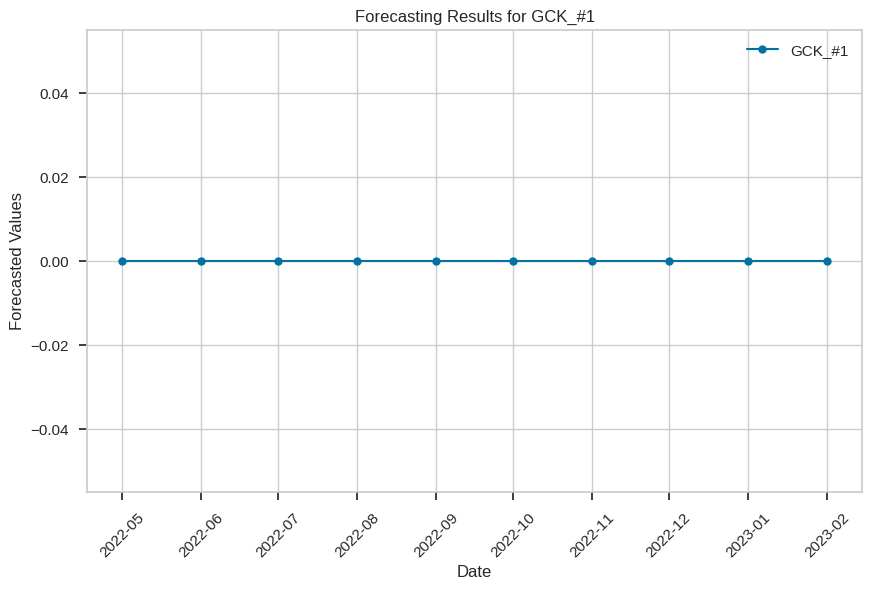

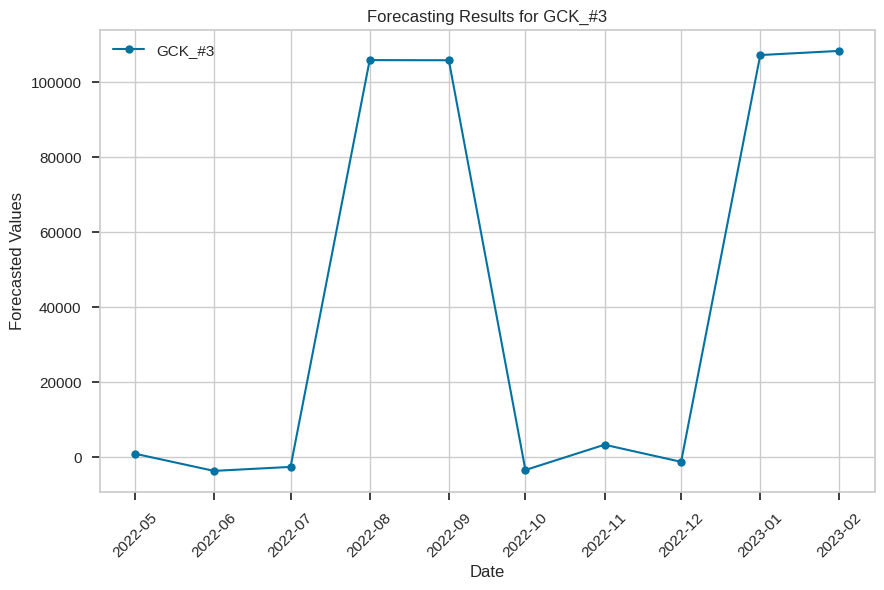

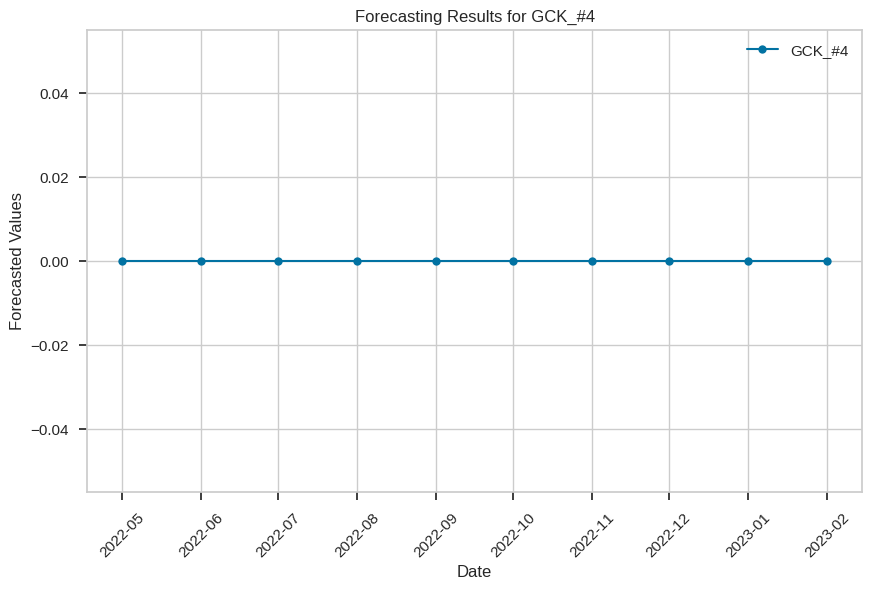

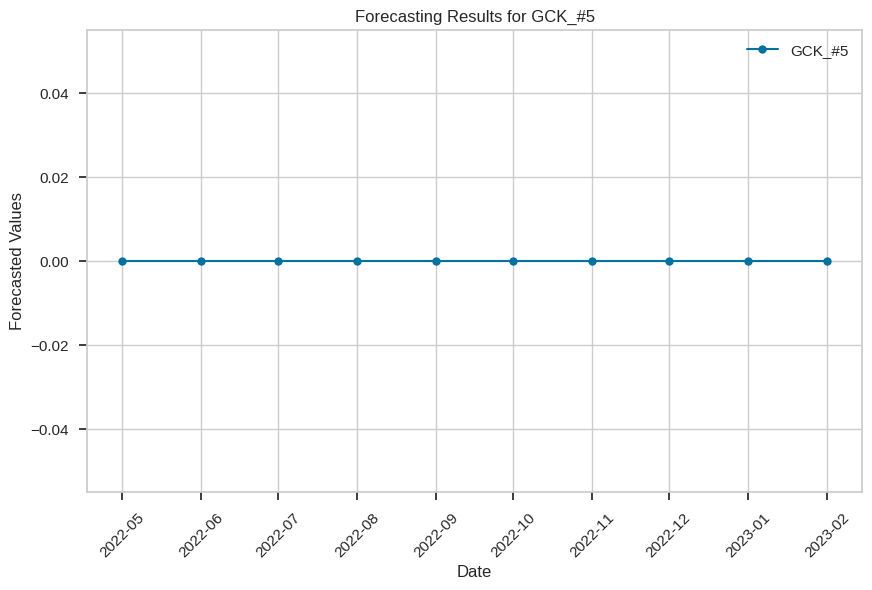

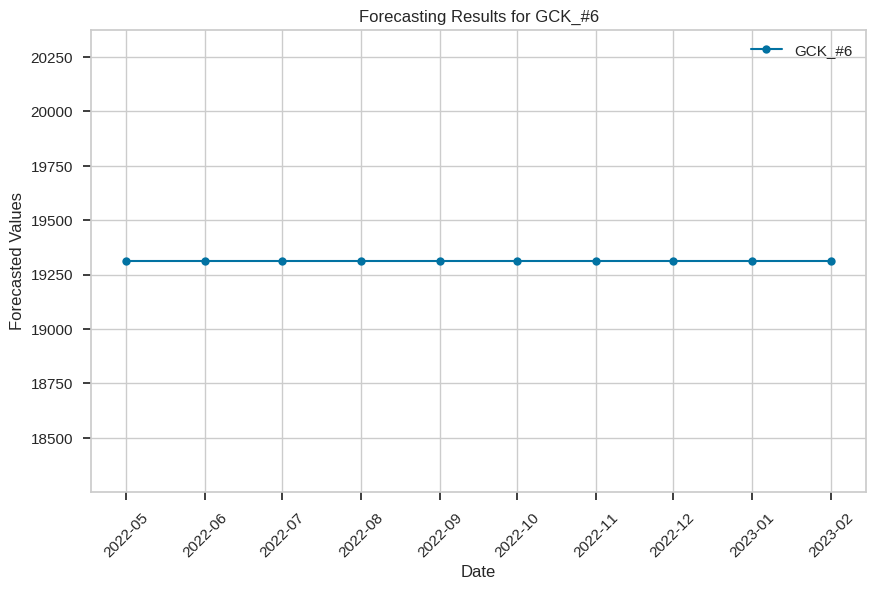

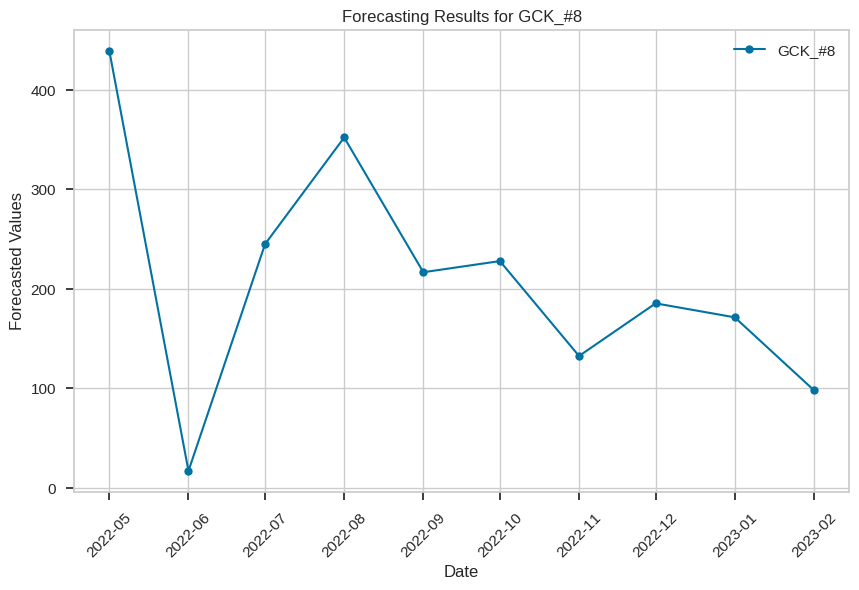

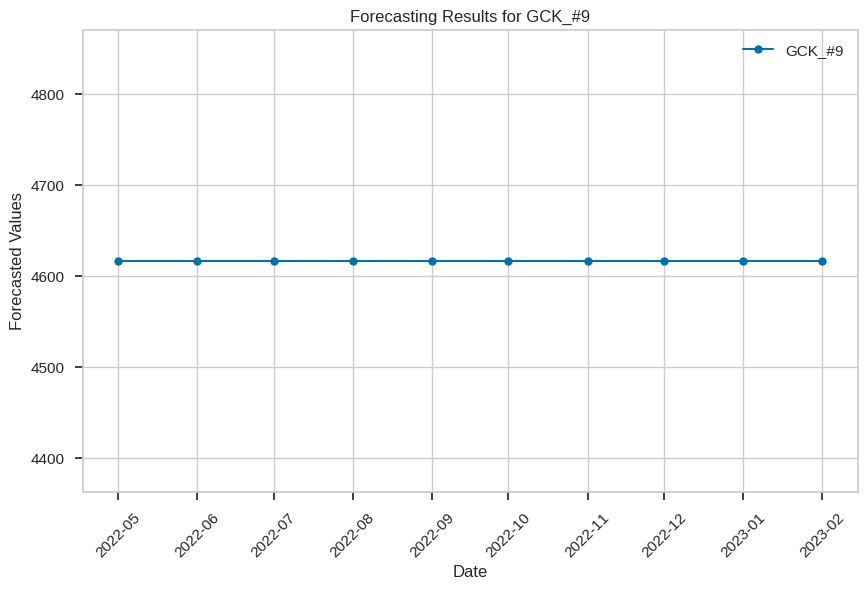

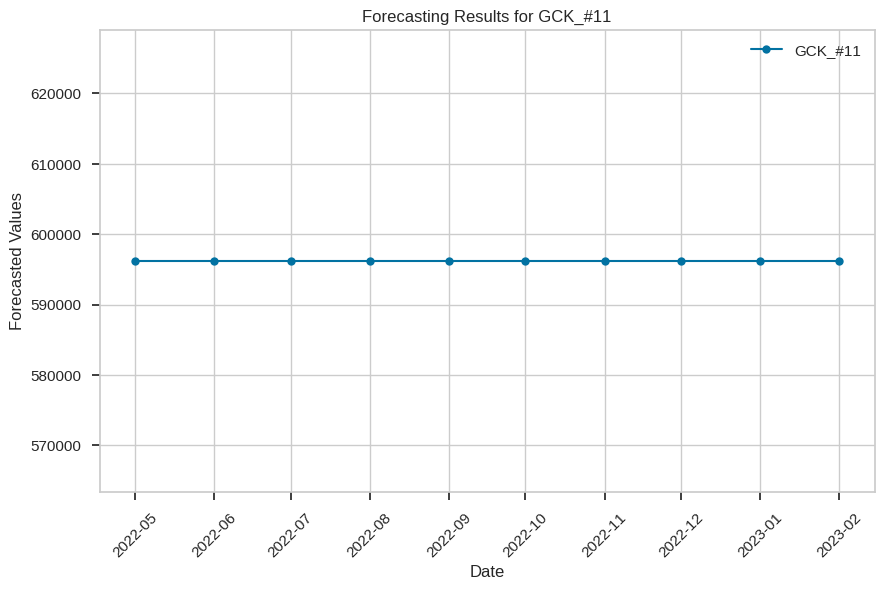

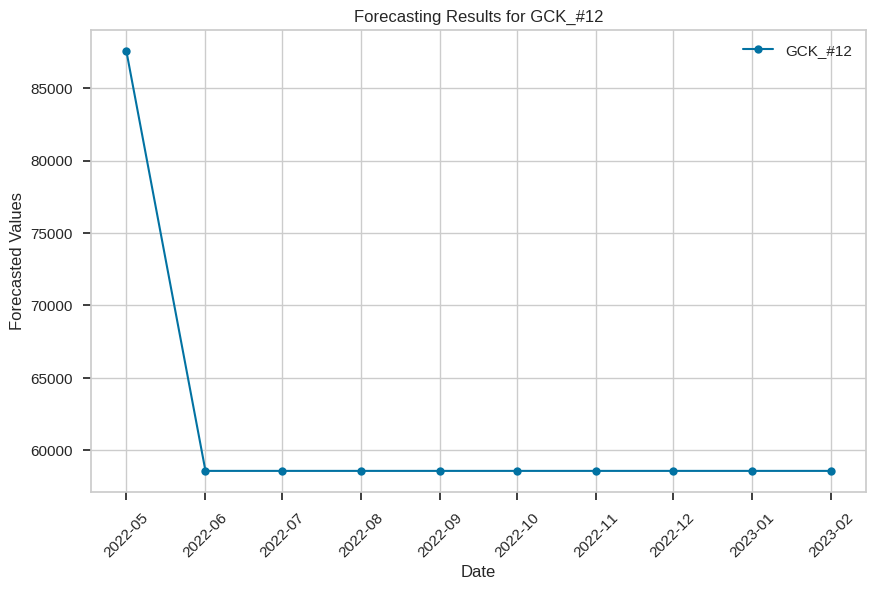

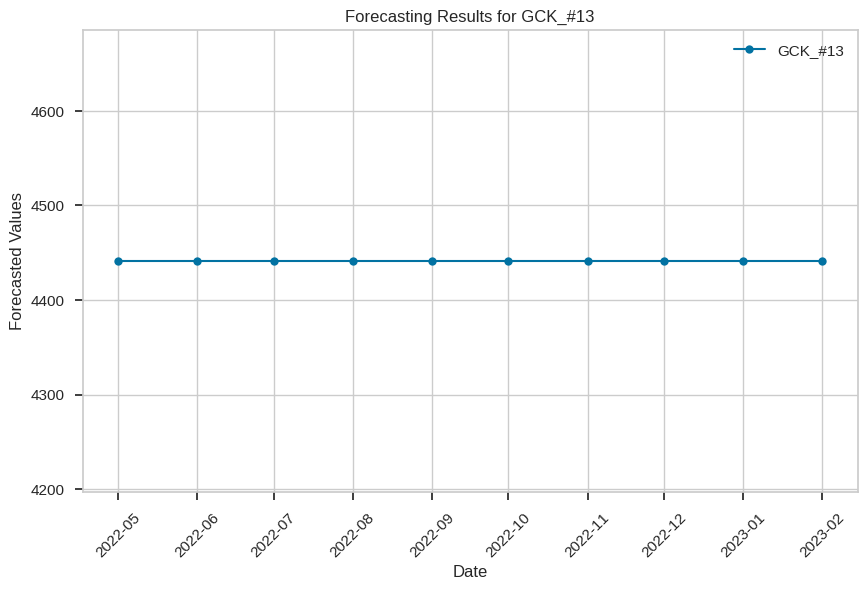

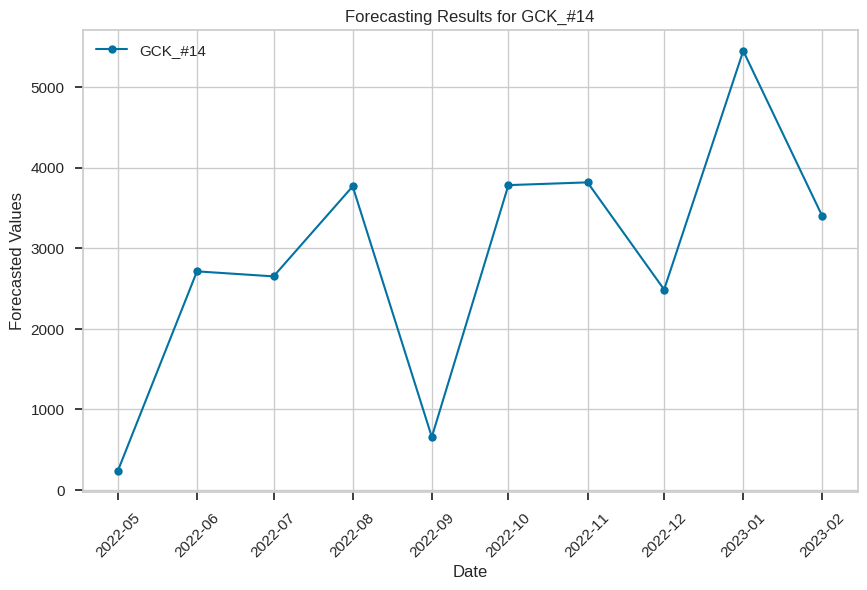

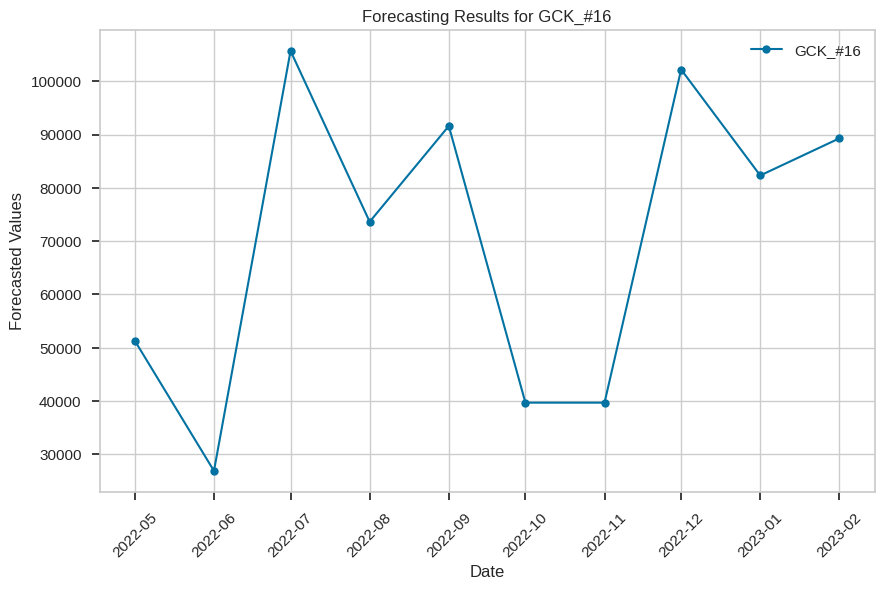

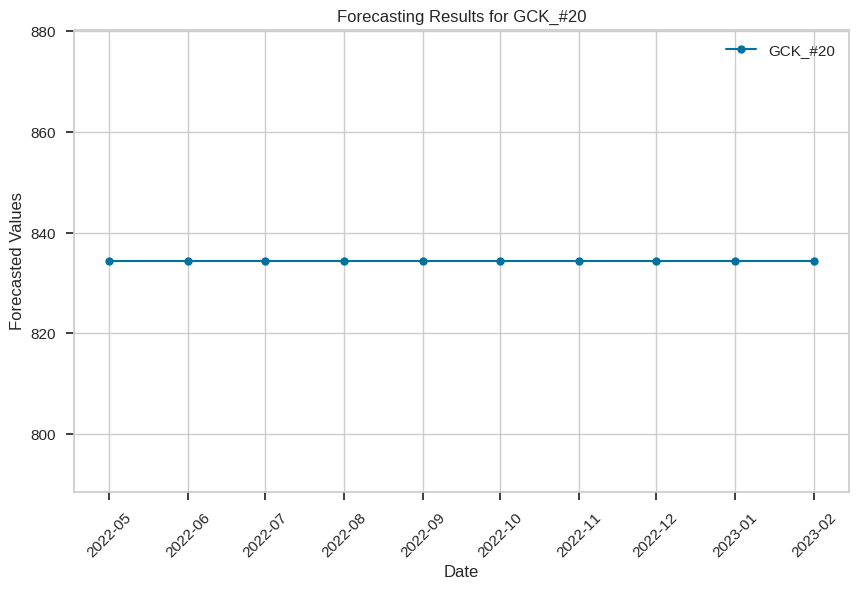

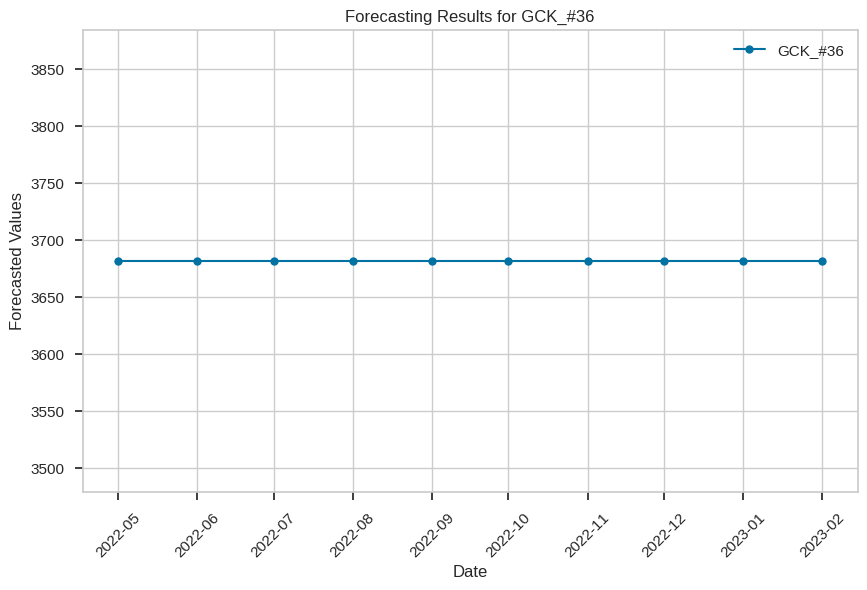

In [ ]:
# Assuming 'final' is your dictionary with forecasting results
start_date = "2022-05-01"  # Adjust as needed
forecast_length = len(next(iter(final.values())))

# Creating a date range for plotting
dates = pd.date_range(start=start_date, periods=forecast_length, freq='MS')

# Plotting
for gck, values in final.items():
    plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary

    if isinstance(values, pd.Series):
        values = values.values  # Convert Series to numpy array if necessary

    plt.plot(dates, values, marker='o', linestyle='-', label=gck)

    plt.title(f'Forecasting Results for {gck}')
    plt.xlabel('Date')
    plt.ylabel('Forecasted Values')
    plt.xticks(rotation=45)
    plt.legend()

    plt.show()


In [ ]:
a=pred.copy()

In [ ]:
mapping = {
    '#1': 'GCK_#1',
    '#3': 'GCK_#3',
    '#4': 'GCK_#4',
    '#5': 'GCK_#5',
    '#6': 'GCK_#6',
    '#8': 'GCK_#8',
    '#9': 'GCK_#9',
    '#11': 'GCK_#11',
    '#12': 'GCK_#12',
    '#13': 'GCK_#13',
    '#14': 'GCK_#14',
    '#16': 'GCK_#16',
    '#20': 'GCK_#20',
    '#36': 'GCK_#36'
}

# Iterate over DataFrame and fill NaN values using the mapping and data_dict
for index, row in pred.iterrows():
    mapped_gck = row['Mapped_GCK']
    if mapped_gck in mapping:
        key= mapping[mapped_gck]
        values = final[key]
        # Calculate the correct index to use based on row index
        array_index = index % len(values)
        # Fill the 'Sales_EUR' column with the corresponding value
        a.at[index, 'Sales_EUR'] = values[array_index]

print(a)

    Month Year Mapped_GCK      Sales_EUR
0       Mai 22         #3     893.382629
1       Jun 22         #3   -3690.953613
2       Jul 22         #3   -2626.234863
3       Aug 22         #3  105768.898438
4       Sep 22         #3  105730.445312
..         ...        ...            ...
135     Okt 22         #1       0.000000
136     Nov 22         #1       0.000000
137     Dez 22         #1       0.000000
138     Jan 23         #1       0.000000
139     Feb 23         #1       0.000000

[140 rows x 3 columns]


In [ ]:
#a.to_excel("Test Set Template GroupD.xlsx")

In [ ]:
final

{'GCK_#1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'GCK_#3': array([   893.3826,  -3690.9536,  -2626.2349, 105768.9   , 105730.445 ,
         -3456.5398,   3283.9792,  -1281.6063, 107115.555 , 108223.57  ],
       dtype=float32),
 'GCK_#4': 2021-07-01    0.0
 2021-08-01    0.0
 2021-09-01    0.0
 2021-10-01    0.0
 2021-11-01    0.0
 2021-12-01    0.0
 2022-01-01    0.0
 2022-02-01    0.0
 2022-03-01    0.0
 2022-04-01    0.0
 Freq: MS, dtype: float64,
 'GCK_#5': 2021-07-01    0.0
 2021-08-01    0.0
 2021-09-01    0.0
 2021-10-01    0.0
 2021-11-01    0.0
 2021-12-01    0.0
 2022-01-01    0.0
 2022-02-01    0.0
 2022-03-01    0.0
 2022-04-01    0.0
 Freq: MS, dtype: float64,
 'GCK_#6': 2021-07-01    19312.636364
 2021-08-01    19312.636364
 2021-09-01    19312.636364
 2021-10-01    19312.636364
 2021-11-01    19312.636364
 2021-12-01    19312.636364
 2022-01-01    19312.636364
 2022-02-01    19312.636364
 2022-03-01    19312.636364
 2022-04-01    19312.636364
 Freq: MS, dtype

In [ ]:
products_dict_val
final
df_fin


Starting plotting...
Processing GCK_#1...
Plotting historical data for GCK_#1
Plotting validation data for GCK_#1


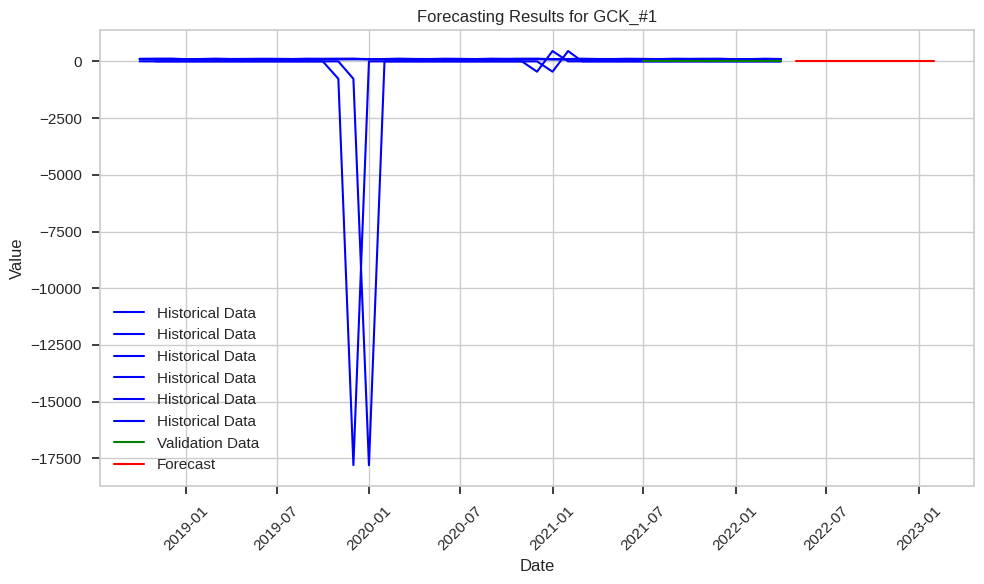

Processing GCK_#3...
Plotting historical data for GCK_#3
Plotting validation data for GCK_#3


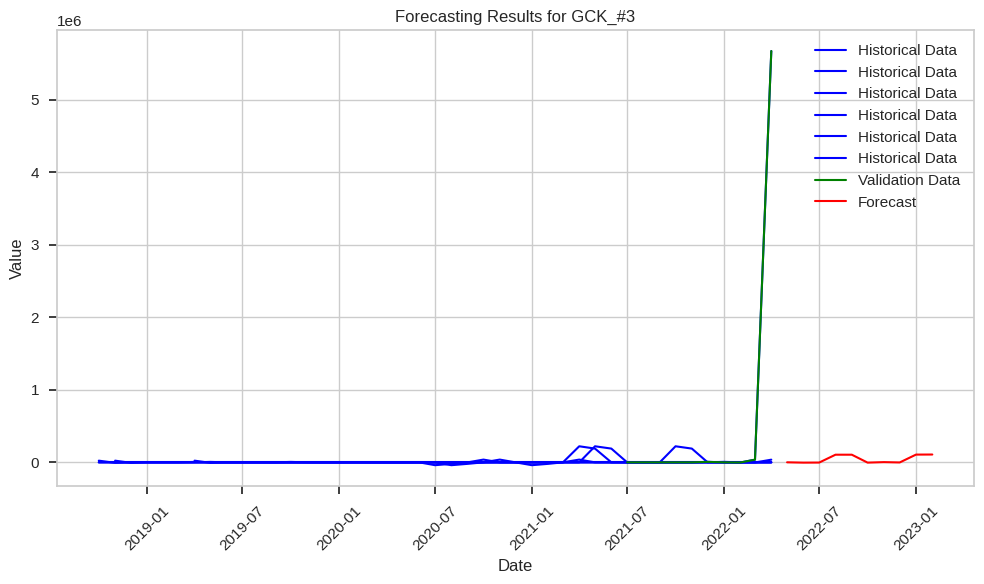

Processing GCK_#4...
Plotting historical data for GCK_#4
Plotting validation data for GCK_#4


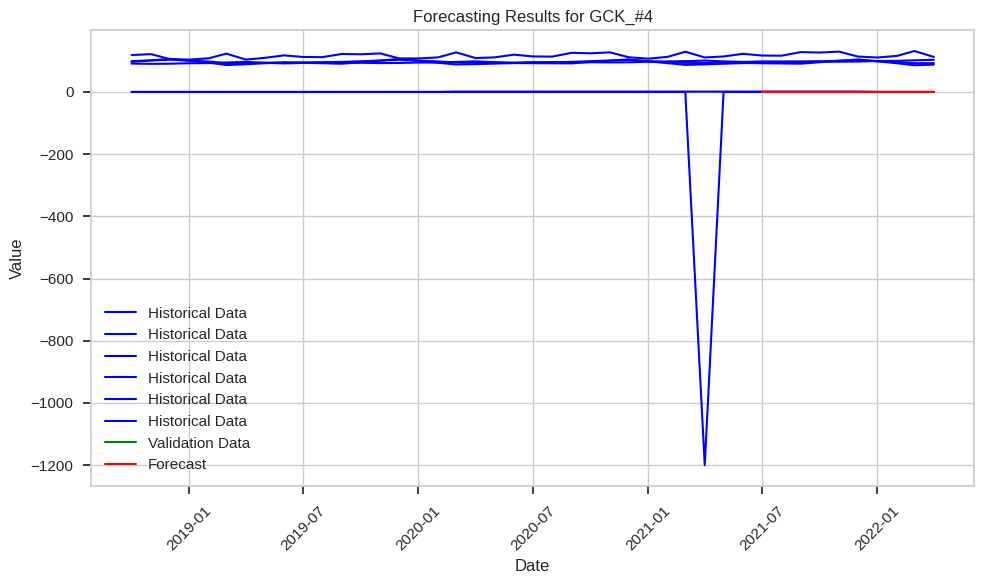

Processing GCK_#5...
Plotting historical data for GCK_#5
Plotting validation data for GCK_#5


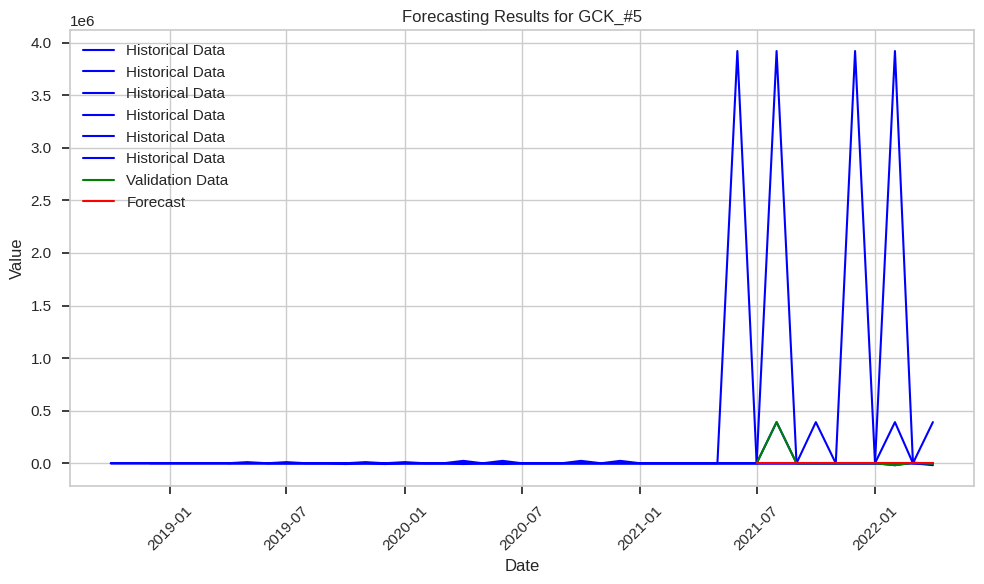

Processing GCK_#6...
Plotting historical data for GCK_#6
Plotting validation data for GCK_#6


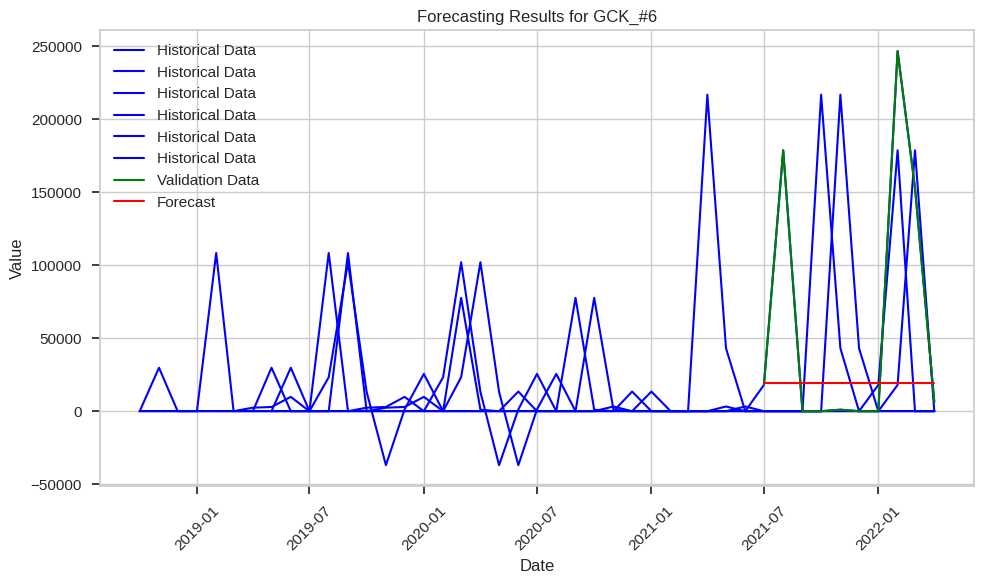

Processing GCK_#8...
Plotting historical data for GCK_#8
Plotting validation data for GCK_#8


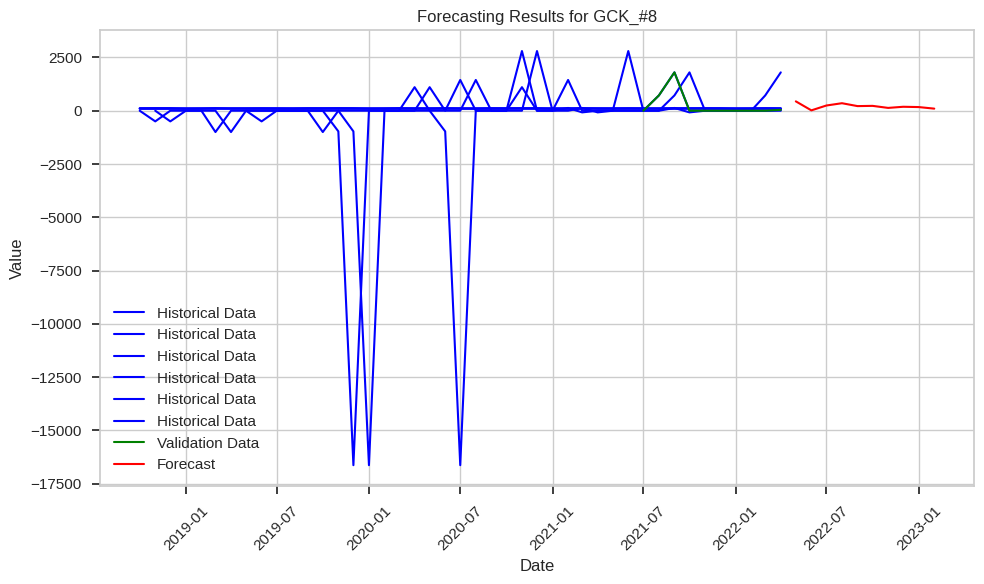

Processing GCK_#9...
Plotting historical data for GCK_#9
Plotting validation data for GCK_#9


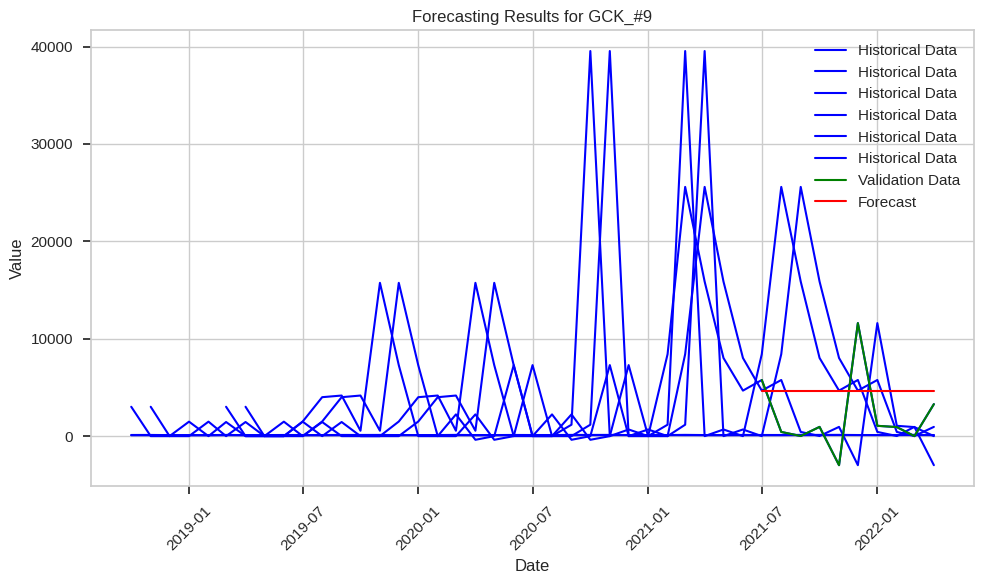

Processing GCK_#11...
Plotting historical data for GCK_#11
Plotting validation data for GCK_#11


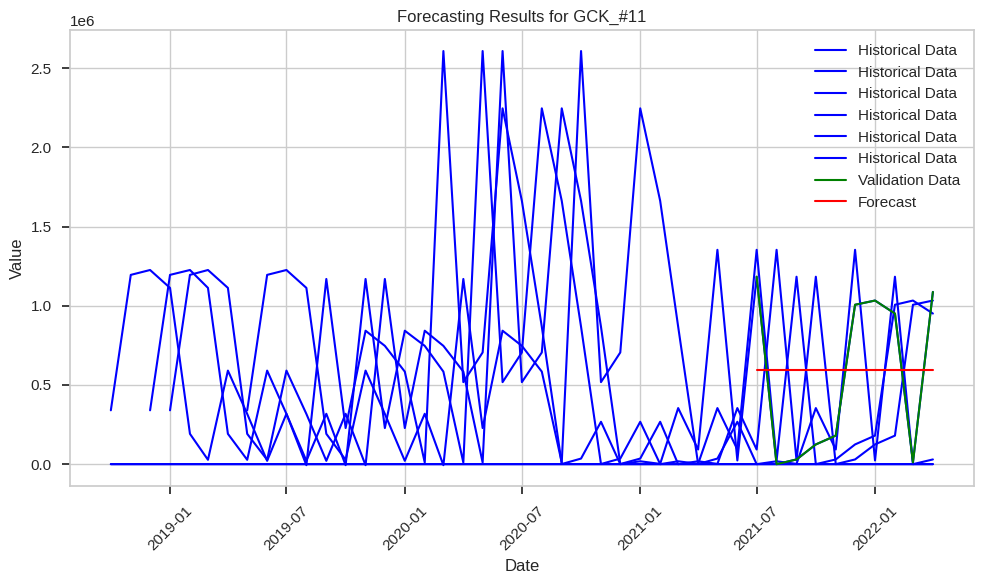

Processing GCK_#12...
Plotting historical data for GCK_#12
Plotting validation data for GCK_#12


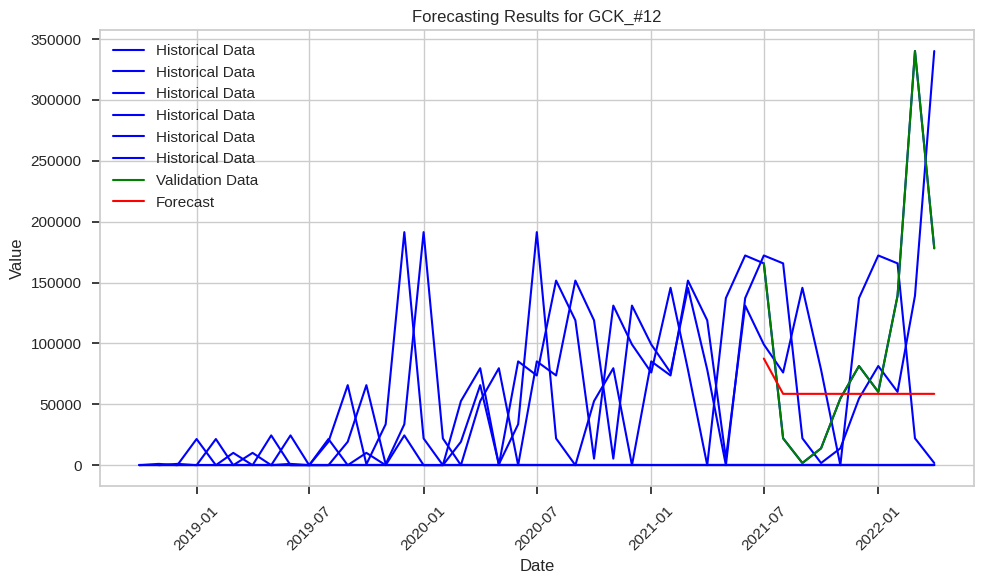

Processing GCK_#13...
Plotting historical data for GCK_#13
Plotting validation data for GCK_#13


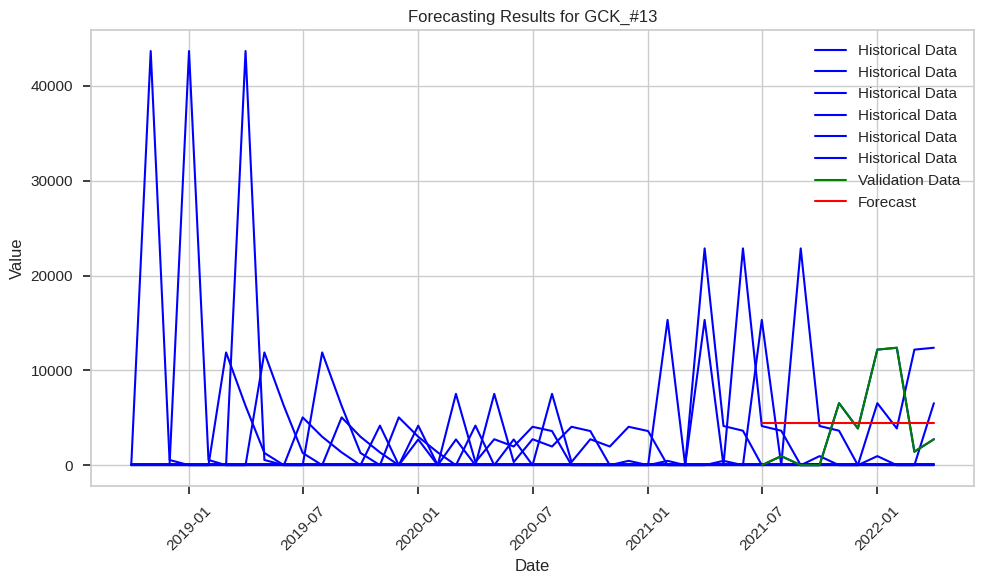

Processing GCK_#14...
Plotting historical data for GCK_#14
Plotting validation data for GCK_#14


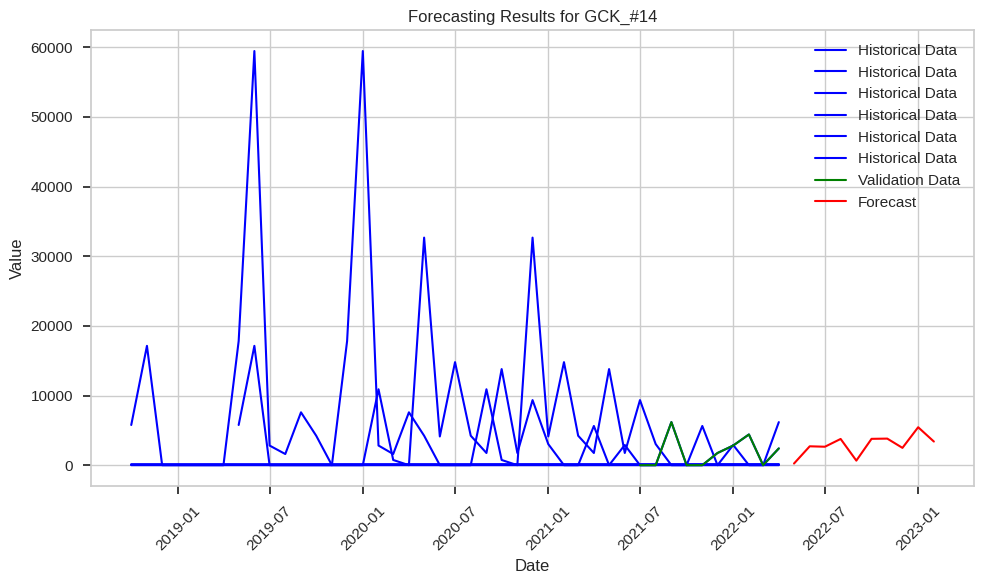

Processing GCK_#16...
Plotting historical data for GCK_#16
Plotting validation data for GCK_#16


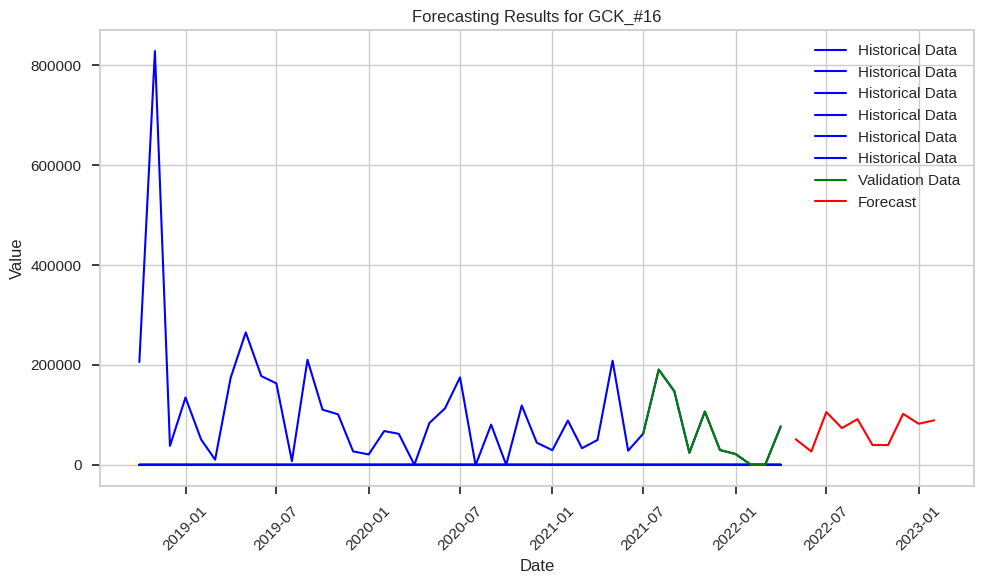

Processing GCK_#20...
Plotting historical data for GCK_#20
Plotting validation data for GCK_#20


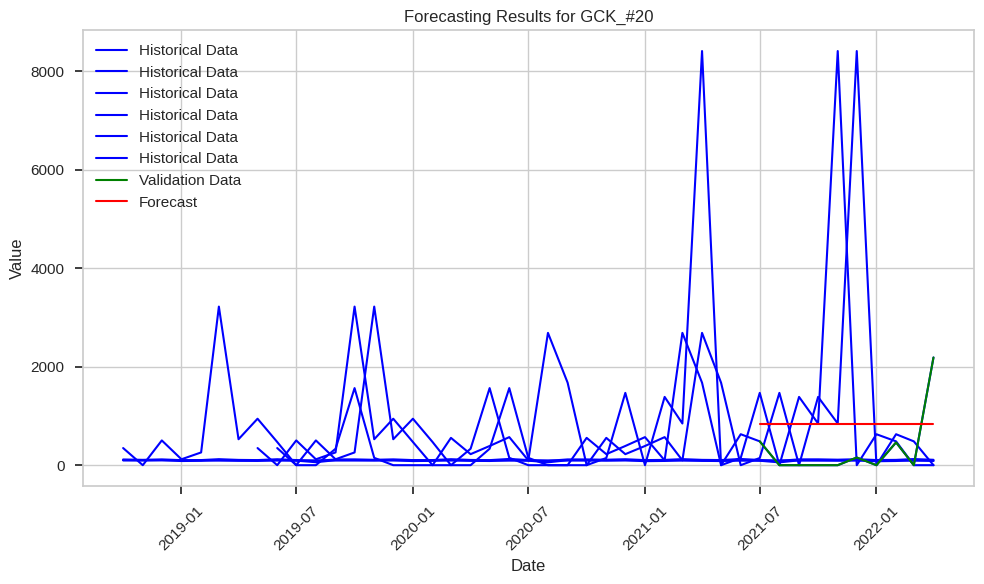

Processing GCK_#36...
Plotting historical data for GCK_#36
Plotting validation data for GCK_#36


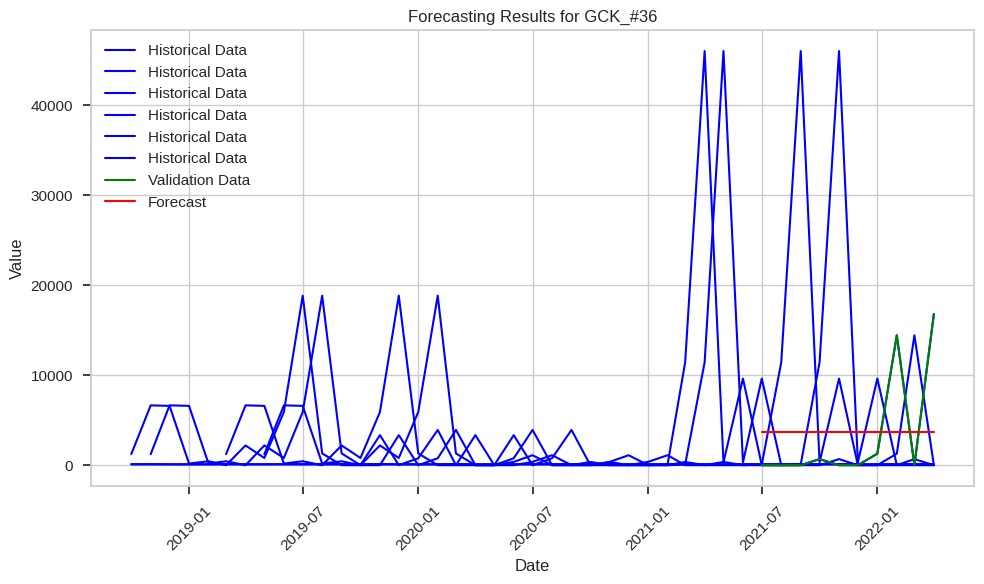

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

start_date = "2022-05-01"  # Starting date for the forecast plot

# Ensure final, df_fin, and products_dict_val are dictionaries
assert isinstance(final, dict), "final must be a dictionary"
assert isinstance(df_fin, dict), "df_fin must be a dictionary"
assert isinstance(products_dict_val, dict), "products_dict_val must be a dictionary"

print("Starting plotting...")

# Loop through each key (gck) in the final forecast dictionary
for gck in final.keys():
    print(f"Processing {gck}...")  # Debugging: Identify which gck is being processed

    plt.figure(figsize=(10, 6))

    # Plot historical data if available
    if gck in df_fin:
        historical_data = df_fin[gck]
        print(f"Plotting historical data for {gck}")  # Debugging: Confirm historical data is plotted
        plt.plot(historical_data.index, historical_data, label='Historical Data', color='blue')
    else:
        print(f"No historical data found for {gck}")

    # Plot validation data if available
    if gck in products_dict_val and 'y' in products_dict_val[gck]:
        validation_data = products_dict_val[gck]['y']
        print(f"Plotting validation data for {gck}")  # Debugging: Confirm validation data is plotted
        plt.plot(validation_data.index, validation_data, label='Validation Data', color='green')

    # Forecast values handling
    forecast_values = final[gck]
    if not isinstance(forecast_values, pd.Series):
        forecast_dates = pd.date_range(start=start_date, periods=len(forecast_values), freq='MS')
        forecast_values = pd.Series(forecast_values, index=forecast_dates)

    plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')

    plt.title(f'Forecasting Results for {gck}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Data Spliting

In [ ]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)
X.head()

In [ ]:
# Remove columns that should not be used
#cols = ['Europe-Shipments Index Machinery & Electricals', 'Europe-World: Price of Base Metals', 'Europe-World: Price of Energy']
cols = ['Europe-World: Price of Energy']
X.drop(columns=cols, inplace=True)

In [ ]:
#y = X['Europe-World: Price of Copper']
y = X['Europe-World: Price of Base Metals']

In [ ]:
# Split into train and test
# Split into train and test without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [ ]:
# Remove the Target from the training
#X_train = X_train.drop(['Europe-World: Price of Copper'],axis=1)
#X_test = X_test.drop(['Europe-World: Price of Copper'],axis=1)

X_train = X_train.drop(['Europe-World: Price of Base Metals'],axis=1)
X_test = X_test.drop(['Europe-World: Price of Base Metals'],axis=1)

In [ ]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
#sns.countplot(x="Europe-World: Price of Copper", data=pd.DataFrame(data={'Europe-World: Price of Copper':y_train}), ax=ax)
sns.countplot(x='Europe-World: Price of Base Metals', data=pd.DataFrame(data={'Europe-World: Price of Base Metals':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

In [ ]:
#y = X['Europe-World: Price of Copper']
y = X['Europe-World: Price of Base Metals']

In [ ]:
#from sklearn.model_selection import train_test_split

# Split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Now you can proceed with your modeling or analysis using X_train, X_test, y_train, and y_test


In [ ]:
# Remove the Target from the training
#X_train = X_train.drop(['Europe-World: Price of Copper'],axis=1)
#X_test = X_test.drop(['Europe-World: Price of Copper'],axis=1)

In [ ]:
# Display target balance in the training dataset
#print(collections.Counter(y_train))
#fig, ax = plt.subplots(figsize=(6,4))
#sns.countplot(x="Europe-World: Price of Copper", data=pd.DataFrame(data={'Europe-World: Price of Copper':y_train}), ax=ax)
#print(y_train.value_counts(normalize=True))

### XGB Regression

In [ ]:
import pandas as pd
import xgboost as xgb

# Assuming y_train and X_train are already defined
y_train = pd.Series(y_train)

# Debugging steps to ensure y_train is what we expect
print("Unique values in y_train:", y_train.unique())
print("NaN values in y_train:", y_train.isna().sum())

# Create the XGBRegressor object
reg_model = xgb.XGBRegressor(n_estimators=300,
                             subsample=0.9,
                             colsample_bytree=0.9,
                             max_depth=3,
                             eval_metric='rmse',  # Commonly used regression metric
                             seed=123)

# Train the model with X_train and y_train
reg_model.fit(X_train, y_train)

In [ ]:
X_test.head(10)

In [ ]:
# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
print(*(y_pred[:10]), sep='\n')

In [ ]:
with open(test_location, 'r') as file:
    csv_reader_test = csv.reader(file, delimiter=';')
    header_test = next(csv_reader_test)
    rows_test = [row for row in csv_reader_test]

test_set = pd.DataFrame(rows_test, columns=header_test)

### XGB Classifier

In [ ]:
import pandas as pd

# Assuming y_train is your Series of continuous values

# Example of categorizing into 3 classes based on percentiles
bin_edges = y_train.quantile([0, 0.33, 0.66, 1]).values
y_train_categorical = pd.cut(y_train, bins=bin_edges, labels=False, include_lowest=True)

# Check the new distribution of your categorical y_train
print(y_train_categorical.value_counts())

# Ensure it's suitable for your classification task


In [ ]:
import xgboost as xgb

# Create and train the XGBClassifier model with the new categorical y_train
classModel = xgb.XGBClassifier(n_estimators=300,
                               subsample=0.9,
                               colsample_bytree=0.9,
                               max_depth=3,
                               eval_metric='logloss',
                               seed=123,
                               use_label_encoder=False)  # use_label_encoder=False to avoid a warning

try:
    classModel.fit(X_train, y_train_categorical)
    print("Model trained successfully.")
except Exception as e:
    print("An error occurred during model training:", e)


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'classModel' is your trained XGBClassifier model

# Plotting feature importance
xgb.plot_importance(classModel)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Visualize the first tree
xgb.plot_tree(classModel, num_trees=0)
plt.title('Decision Tree 0')
plt.show()

In [ ]:
# predict y for X_train and X_test

y_pred_train = classModel.predict(X_train2)
y_pred_test = classModel.predict(X_test)

In [ ]:
import pandas as pd
from sklearn import metrics

def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest, average='binary'):
    """
    Generate a DataFrame with training and testing performance metrics.

    :param metricsObj: Module or object providing calculation functions (e.g., sklearn.metrics)
    :param yTrain: Actual labels for the training set
    :param yPredTrain: Predicted labels for the training set
    :param yTest: Actual labels for the test set
    :param yPredTest: Predicted labels for the test set
    :param average: String, [None, 'binary' (default), 'micro', 'macro', 'samples', 'weighted']
                    This parameter is required for multiclass/multilabel targets.
                    If 'binary', only report results for the class specified by pos_label.
                    If None, the scores for each class are returned.

    :return: DataFrame with performance metrics
    """
    measures_list = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE', 'AUC']
    train_results = [
        metricsObj.accuracy_score(yTrain, yPredTrain),
        metricsObj.precision_score(yTrain, yPredTrain, average=average),
        metricsObj.recall_score(yTrain, yPredTrain, average=average),
        metricsObj.f1_score(yTrain, yPredTrain, average=average),
        metricsObj.roc_auc_score(yTrain, yPredTrain, multi_class='ovo' if average != 'binary' else 'raise', average=average)
    ]
    test_results = [
        metricsObj.accuracy_score(yTest, yPredTest),
        metricsObj.precision_score(yTest, yPredTest, average=average),
        metricsObj.recall_score(yTest, yPredTest, average=average),
        metricsObj.f1_score(yTest, yPredTest, average=average),
        metricsObj.roc_auc_score(yTest, yPredTest, multi_class='ovo' if average != 'binary' else 'raise', average=average)
    ]

    resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test': test_results})

    return resultsDF


In [ ]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)


In [ ]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)


In [ ]:
import pandas as pd
import xgboost
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  # Import for visualization

# Ensure y_train is a Pandas Series or DataFrame
y_train = pd.Series(y_train)

# Verify unique values in y_train
print(y_train.unique())

# Check for NaN values in y_train
print(y_train.isna().sum())

# --- Handle Missing Values (if necessary) ---
if y_train.isna().sum() > 0:
    # Choose a suitable imputation method (e.g., fill with mean):
    y_train = y_train.fillna(y_train.mean())

# --- Verify Index Type (if necessary) ---
print(y_train.index)
if not pd.api.types.is_numeric_dtype(y_train.index):
    y_train = y_train.reset_index(drop=True)

# --- Handle Class Weights (if necessary) ---
# Check if scale_pos_weight exists and remove it conditionally:
if 'scale_pos_weight' in classModel.get_params():
    del classModel.get_params()['scale_pos_weight']
else:
    print("scale_pos_weight parameter not found in model")

# Consider alternative weighting using class_weight parameter:
class_weight = None  # Initialize to None

# If necessary, calculate class weights based on y_train distribution:
if (0.0 not in y_train.unique()) or (you_want_custom_weighting):
    # Replace with your weight calculation logic (e.g., using value_counts())
    class_weight = {0: weight_for_class_0, 1: weight_for_class_1}

# --- Create and Train the Model ---
try:
    classModel = xgboost.XGBClassifier(n_estimators=300,
                                      subsample=0.9,
                                      colsample_bytree=0.9,
                                      max_depth=3,
                                      eval_metric='error',
                                      seed=123,
                                      class_weight=class_weight)  # Use class_weight if needed
    classModel.fit(X_train, y_train)
except KeyError as e:
    print("KeyError encountered:", e)
    # Additional debugging steps if needed

# --- Generate Predictions on Test Set ---
try:
    y_pred_test = classModel.predict(X_test)
except NameError as e:
    print("Error: X_test is not defined. Ensure you have prepared your test data.")

# --- Create Confusion Matrix and Visualization (if successful) ---
if 'y_pred_test' in locals():  # Check if prediction was successful
    cf = confusion_matrix(y_test, y_pred_test)
    labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    categories = ['0', '1']

    plt.figure(figsize=(8, 6))
    plt.imshow(cf, cmap='Blues')
    plt.colorbar()
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.yticks(range(len(categories)), categories)
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

try:
  # Assuming cf is defined from the confusion matrix calculation

  labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
  categories = ['0', '1']

  plt.figure(figsize=(8, 6))
  plt.imshow(cf, cmap='Blues')
  plt.colorbar()
  plt.xticks(range(len(labels)), labels, rotation=45)
  plt.yticks(range(len(categories)), categories)
  plt.title('Confusion Matrix')
  plt.show()

except NameError:
  print("Error: 'cf' variable not found. Ensure the confusion matrix is calculated before visualization.")


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have true labels and predicted probabilities
try:
  true_labels = np.array([...])  # Replace with your true labels (0 or 1)
  predicted_probabilities = np.array([...])  # Replace with predicted probabilities (0 to 1)

  # Calculate ROC curve
  fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

  # Calculate AUC
  roc_auc = auc(fpr, tpr)

  # Create ROC curve visualization
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label='ROC Curve (AUC=%0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve')
  plt.legend()
  plt.grid(True)
  plt.show()

except (ValueError, NameError) as e:
  print("Error:", e)
  print("Ensure you have defined 'true_labels' and 'predicted_probabilities' with appropriate data.")


In [ ]:
# Import necessary libraries
from sklearn.utils import _param_validation as param_validation
from imblearn.utils._validation import _deprecate_positional_args

from imblearn.over_sampling import _random_over_sampler
from imblearn.over_sampling.base import BaseOverSampler

import collections
import pandas as pd  # Import pandas for data manipulation
import seaborn as sns  # Import seaborn for plotting (optional)
import matplotlib.pyplot as plt  # Import matplotlib for plotting (optional)

# Assuming X_train is your feature data (numerical or pre-encoded)
# and y_train is your categorical target variable (strings)

# Encode the target variable y_train (necessary for SMOTE)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Apply SMOTE to generate new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)  # Adjust sampling_strategy if needed
X_train2, y_train2 = sm.fit_resample(X_train, y_train_encoded)

# Display target balance in the training dataset after oversampling
print(collections.Counter(y_train2))

# Plot the distribution of the target variable after oversampling (optional)
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x="Japan.1", data=pd.DataFrame(data={'Japan.1': y_train2}), ax=ax)  # Replace "Exited" with the actual column name in y_train
plt.show()


In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = ["Europe-Shipments Index Machinery & Electricals", "Europe-World: Price of Copper", ("Europe-Shipments Index Machinery & Electricals", "Europe-World: Price of Copper")]
print("Computing partial dependence plots...")
fig, ax = plt.subplots(ncols=3, figsize=(9, 4))
display = PartialDependenceDisplay.from_estimator(
    classModel,
    X_train,
    features,
    kind="average",
    n_jobs=2,
    grid_resolution=10,
    ax=ax,
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

In [ ]:
# Creating Shap
explainer = shap.TreeExplainer(classModel)
shap_values = explainer.shap_values(X_train, y=y)

##Sales data

In [ ]:
#df = pd.read_csv('/content/drive/My Drive/Case2_Sales data.csv', delimiter=';')
df = pd.read_csv('/content/Case2_Sales data.csv', delimiter=';')


In [ ]:
df.describe()

In [ ]:
df.head(10)

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df['Sales_EUR'].describe()

In [ ]:
 #df1= pd.read_csv('/content/drive/My Drive/Case2_Test Set Template.csv', delimiter=';')
 df1= pd.read_csv('/content/Case2_Test Set Template.csv', delimiter=';')

In [ ]:
df['Sales_EUR'].tail()

In [ ]:
df['Sales_EUR'].describe()

In [ ]:
df1.head()

In [ ]:
df1['Sales_EUR'].describe()

In [ ]:
df1['Month Year'].describe()

In [ ]:
# ds = ds.dropna()  # Drop rows with any missing values


# New Section

In [ ]:
# ds['Sales_EUR'] = ds['Sales_EUR'].fillna(ds['Sales_EUR'].mean())


In [ ]:
# ds['Mapped_GCK'] = ds['Mapped_GCK'].fillna(ds['Mapped_GCK'].mean())


In [ ]:
df1.describe()

In [ ]:
def monthlyORyears_sales(data,time=['Month','Year']):
    data = data.copy()
    if time == "Month":
        # Drop the day indicator from the date column:
        data.date = data.date.apply(lambda x: str(x)[:-3])
    else:
        data.date = data.date.apply(lambda x: str(x)[:4])

   # Sum sales per month:
    data = data.groupby('DATE')['Sales_EUR'].sum().reset_index()
    data.date = pd.to_datetime(data.date)

    return data

In [ ]:
import pandas as pd


def calculate_monthly_sales(dataframe, frequency="monthly"):
  """
  This function calculates monthly or yearly sales from a DataFrame.

  Args:
      dataframe (pandas.DataFrame): The input DataFrame containing sales data.
      frequency (str, optional): The desired aggregation frequency,
          either "monthly" (default) or "yearly".

  Returns:
      pandas.DataFrame: A DataFrame with sales aggregated by month or year.
  """

  # Check if 'date' column exists for aggregation
  if 'date' not in dataframe.columns:
    print("Date column not found. Aggregation not possible.")
    return None

  # Perform aggregation based on frequency
  if frequency == "monthly":
    monthly_df = dataframe.resample('M', on='date')['Sales'].sum()  # Replace 'Sales' with your desired sales column
  elif frequency == "yearly":
    monthly_df = dataframe.resample('Y', on='date')['Sales'].sum()  # Replace 'Sales' with your desired sales column
  else:
    print(f"Invalid frequency '{frequency}'. Please use 'monthly' or 'yearly'.")
    return None

  return monthly_df


# Get monthly sales
monthly_sales = calculate_monthly_sales(ds.copy(), frequency="monthly")  # Make a copy to avoid modifying original ds

# Save to CSV if monthly sales were obtained
if monthly_sales is not None:
  monthly_sales.to_csv('Case2_Test Set Template.csv', index=True)  # Save with index for month information
else:
  print("Monthly sales could not be calculated. No CSV generated.")

In [ ]:
df1.tail()

In [ ]:
import matplotlib.pyplot as plt

ds['Sales_EUR'].plot()


In [ ]:
import matplotlib.pyplot as plt

# Check the column names in the DataFrame 'ds'
print(ds.columns)

# Plot a column that exists in your DataFrame
# For example, if 'Sales_EUR' is not found, you can plot another column like 'count'
ds['count'].plot()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Check the column names in the DataFrame 'ds'
print(df.columns)

# Plot a column that exists in your DataFrame
# For example, if 'Sales_EUR' is not found, you can plot another column like 'count'
df['Sales_EUR'].plot()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Check the column names in the DataFrame 'ds'
print(df.columns)

# Plot a column that exists in your DataFrame
# For example, let's plot the first column listed in the output of ds.columns
df[df.columns[0]].plot()

# Show the plot
plt.show()


In [ ]:
Index(['Unnamed: 0', 'China', 'China.1', 'France', 'France.1', 'Germany',
       'Germany.1', 'Italy', 'Italy.1', 'Japan', 'Japan.1', 'Switzerland',
       'Switzerland.1', 'United Kingdom', 'United Kingdom.1', 'United States',
       'United States.1', 'Europe', 'Europe.1', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Producer Prices', 'Producer Prices.1',
       'Producer Prices.2', 'Producer Prices.3', 'Producer Prices.4',
       'Producer Prices.5', 'production index', 'production index.1',
       'production index.2', 'production index.3', 'production index.4',
       'production index.5', 'production index.6', 'production index.7',
       'production index.8', 'production index.9', 'production index.10',
       'production index.11', 'production index.12', 'production index.13',
       'production index.14', 'production index.15', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-40-930679f07717> in <cell line: 8>()
      6 # Plot a column that exists in your DataFrame
      7 # For example, let's plot the first column listed in the output of ds.columns
----> 8 ds[ds.columns[0]].plot()
      9
     10 # Show the plot

3 frames


In [ ]:
import matplotlib.pyplot as plt

# Check the column names in the DataFrame 'ds'
print(df.columns)

# Convert the values in the 'Unnamed: 0' column to numeric
df['Unnamed: 0'] = pd.to_numeric(df['Unnamed: 0'], errors='coerce')

# Plot the 'Unnamed: 0' column
df['Unnamed: 0'].plot()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your dataset as y_df and m_df

# Define the layout for subplots
layout = (1, 2)

# Create subplots
fig = plt.figure(figsize=(15, 6))
raw = plt.subplot2grid(layout, (0, 0))
law = plt.subplot2grid(layout, (0, 1))

# Plot sales for years
years = ds['Sales_EUR'].plot(kind="bar", color='mediumblue', label="Sales", ax=raw)
years.set_xlabel("Years")
years.set_title("Distribution of Sales Per Year")

# Plot sales for months
months = ds['Sales_EUR'].plot(marker='o', color='darkorange', label="Sales", ax=law)
months.set_xlabel("Months")
months.set_title("Distribution of Sales Per Month")

# Remove spines
sns.despine()

# Adjust layout
plt.tight_layout()

# Add legends
years.legend()
months.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the layout for subplots
layout = (1, 2)

# Create subplots
fig = plt.figure(figsize=(12, 5))
raw = plt.subplot2grid(layout, (0, 0))
law = plt.subplot2grid(layout, (0, 1))

# Sample data for years and months sales
years_sales = [100, 200, 300, 400, 500]  # Sample sales data for years
months_sales = [50, 60, 70, 80, 90]       # Sample sales data for months

# Plot sales for years
years = raw.bar(range(len(years_sales)), years_sales, color='mediumblue', label="Sales")
# Set x-axis labels and title for the first subplot
raw.set_xticks(range(len(years_sales)))
raw.set_xticklabels(['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])
raw.set_xlabel("Years")
raw.set_title("Distribution of Sales Per Year")

# Plot sales for months
months = law.plot(months_sales, marker='o', color='darkorange', label="Sales", linestyle='-')
# Set x-axis labels and title for the second subplot
law.set_xlabel("Months")
law.set_title("Distribution of Sales Per Month")

# Remove spines
sns.despine()

# Adjust layout
plt.tight_layout()

# Add legends
raw.legend([years], ["Sales"])
law.legend()

# Show the plot
plt.show()


In [ ]:
def sales_time(data):
    """Time interval of dataset:"""

    data.date = pd.to_datetime(data.date)
    n_of_days = data.date.max() - data.date.min()
    n_of_years = int(n_of_days.days / 365)

    print(f"Days: {n_of_days.days}\nYears: {n_of_years}\nMonth: {12 * n_of_years}")

In [ ]:
def sales_time(data, date_column_name):
    """Time interval of dataset:"""

    data[date_column_name] = pd.to_datetime(data[date_column_name])
    n_of_days = data[date_column_name].max() - data[date_column_name].min()
    n_of_years = int(n_of_days.days / 365)

    print(f"Days: {n_of_days.days}\nYears: {n_of_years}\nMonth: {12 * n_of_years}")


In [ ]:

def sales_per_store(data):
    sales_by_store = data.groupby('top')['freq'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(sales_by_store.store, sales_by_store.sales, color='darkred')

    ax.set(xlabel = "Store Id", ylabel = "Sum of Sales", title = "Total Sales Per Store")

    return sales_by_store

In [ ]:
df1.reset_index(inplace=True)


In [ ]:

print(df1.columns)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
features = ["Age", "NumOfProducts", ("Age", "NumOfProducts")]
print("Computing partial dependence plots...")
fig, ax = plt.subplots(ncols=3, figsize=(9, 4))
display = PartialDependenceDisplay.from_estimator(
    classModel,
    X_train,
    features,
    kind="average",
    n_jobs=2,
    grid_resolution=10,
    ax=ax,
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)